### Exploración y Segmentación de Clientes
#### Super Bank


1.   Integrante 1:Dennis Muñoz
2.   Integrante 2: Elías Madrid



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import anderson
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
!pip install kneed

In [ ]:
!head -n 5 SuperBanck.csv

CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
C10001,,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0.0,2.0,,201.802084,,0.0,12.0
C10002,3202.467416,,0.0,,0.0,6442.945483,0.0,0.0,0.0,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,,12.0
C10003,2495.148862,1.0,,773.17,0.0,,1.0,1.0,0.0,0.0,0.0,12.0,7500.0,622.066742,627.284787,0.0,12.0
C10004,,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.0,0.083333,1.0,1.0,7500.0,0.0,,0.0,12.0


a. Carga el conjunto de datos proporcionado.


In [ ]:
df = pd.read_csv("SuperBanck.csv")

## 1. Análisis Exploratorio de Datos




b. Realiza una evaluación preliminar de los datos. Identifica el número de características, sus tipos de datos y verifica la existencia de valores faltantes.


In [ ]:
df.shape

(8950, 18)

In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8055 non-null   float64
 2   BALANCE_FREQUENCY                 8055 non-null   float64
 3   PURCHASES                         8055 non-null   float64
 4   ONEOFF_PURCHASES                  8055 non-null   float64
 5   INSTALLMENTS_PURCHASES            8055 non-null   float64
 6   CASH_ADVANCE                      8055 non-null   float64
 7   PURCHASES_FREQUENCY               8055 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8055 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8055 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8055 non-null   float64
 11  CASH_ADVANCE_TRX                  8055 non-null   float64
 12  PURCHA

In [ ]:
df.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188         NaN           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333        NaN              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12           NaN             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            6.0        1000.0   
8947                0.000000               0.0            5.0        1000.0   
8948                     NaN               2.0            NaN           NaN   
8949                0.333333               2.0           23.0        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462               NaN              0.50     6.0  
8946  275.861322               NaN              0.00     6.0  
8947   81.270775               NaN              0.25     NaN  
8948   52.549959               NaN              0.25     6.0  
8949   63.165404               NaN              0.00     6.0

## 1.1 Tratamiento de Datos Faltantes

In [ ]:
print('\nCantidad de valores faltantes por columnas:')
print(df.isnull().sum())


Cantidad de valores faltantes por columnas:
CUST_ID                                0
BALANCE                              895
BALANCE_FREQUENCY                    895
PURCHASES                            895
ONEOFF_PURCHASES                     895
INSTALLMENTS_PURCHASES               895
CASH_ADVANCE                         895
PURCHASES_FREQUENCY                  895
ONEOFF_PURCHASES_FREQUENCY           895
PURCHASES_INSTALLMENTS_FREQUENCY     895
CASH_ADVANCE_FREQUENCY               895
CASH_ADVANCE_TRX                     895
PURCHASES_TRX                        895
CREDIT_LIMIT                         896
PAYMENTS                             895
MINIMUM_PAYMENTS                    1168
PRC_FULL_PAYMENT                     895
TENURE                               895
dtype: int64


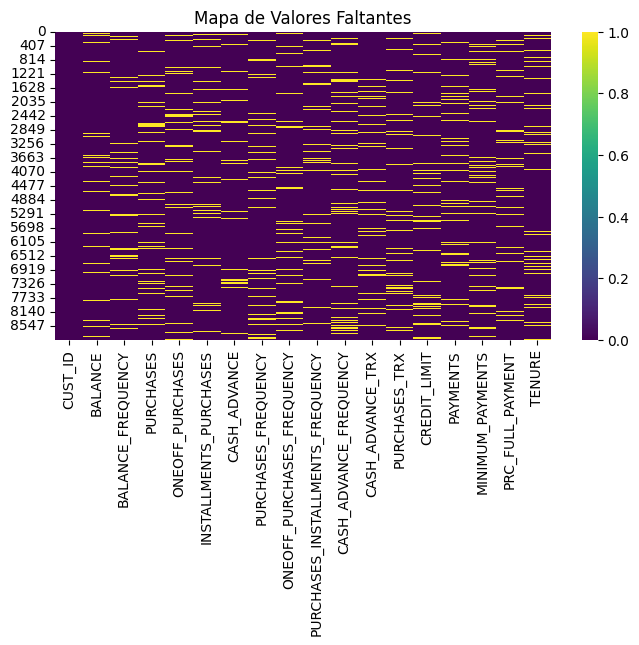

In [ ]:
# visual
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=True, cmap="viridis")
plt.title("Mapa de Valores Faltantes")
plt.show()

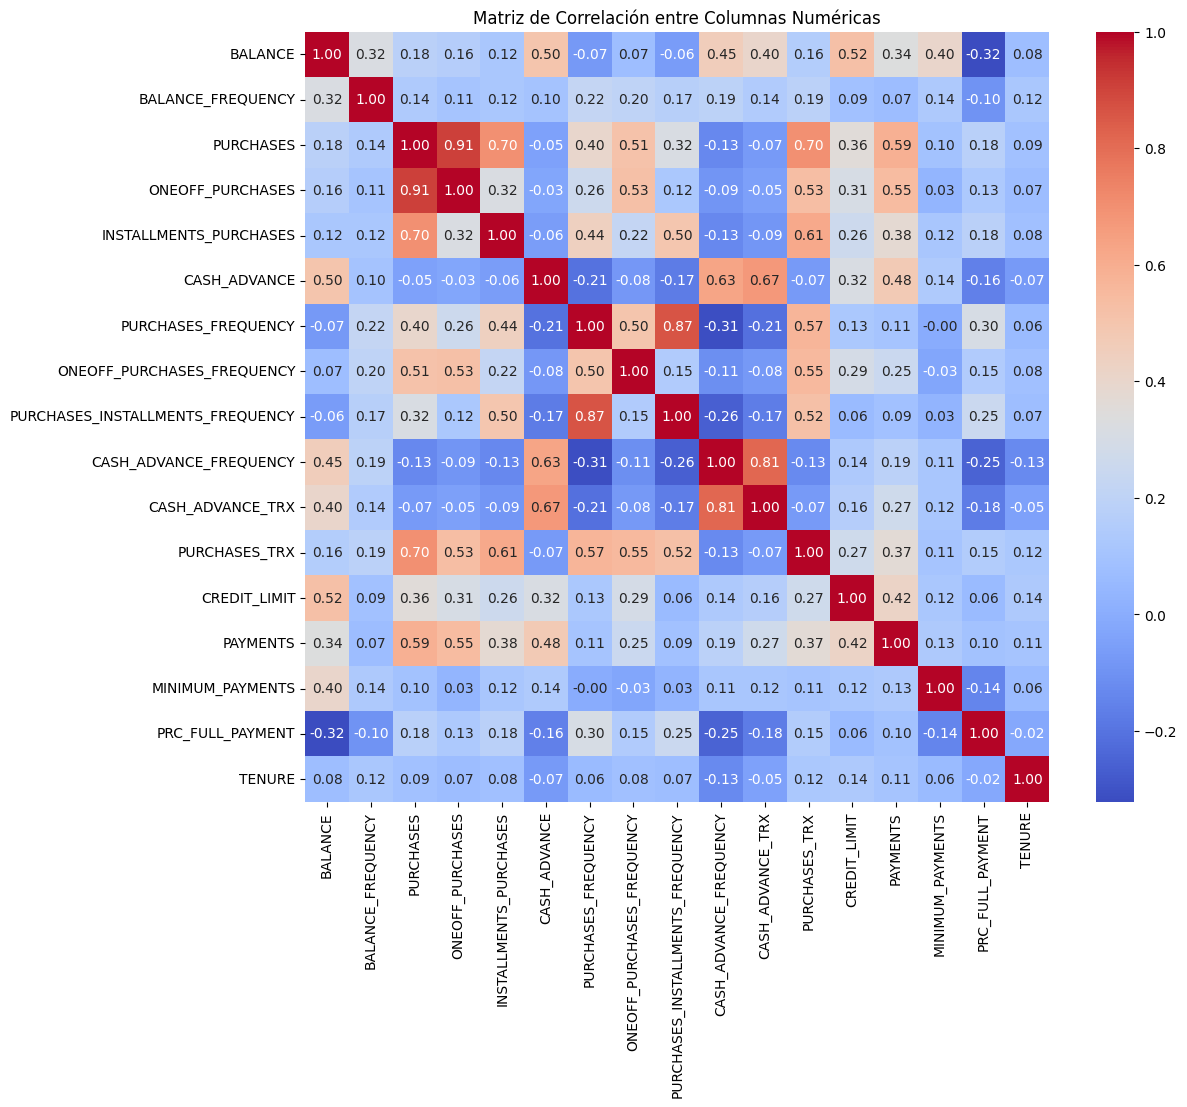

In [ ]:
# Correlación entre columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Columnas Numéricas')
plt.show()

In [ ]:
threshold = 0.87  # umbral 87%
# eliminar columnas que tengan como mucho el 87% de valores no nulos
df_dropped_columns = df.dropna(axis=1, thresh=int(len(df) * threshold))
print(f"Hay {len(df_dropped_columns.columns)} columnas restantes: {df_dropped_columns.columns}")

# ToDo: elimina las filas que tengan como mucho un 75% de valores no nulos
threshold = 0.75
df_dropped_rows = df_dropped_columns.dropna(axis=0, thresh=int(len(df_dropped_columns.columns) * threshold))
print(f"Hay {len(df_dropped_rows)} filas restantes")

Hay 17 columnas restantes: Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')
Hay 8924 filas restantes


Consideramos pertinente eliminar la columna "MIN_PAYMENTS" ya que es la columna que tiene más valores nulos con 1168. Ademas, no es útil mantenerla que su correlaccion con las demas variables es muy baja. Por otra parte, se eliminaron un total de 26 filas que equivalen al 0.29% de la data con un threshold del 75%.

In [ ]:
df_dropped= df_dropped_rows.reset_index(drop=True)
df_dropped

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001          NaN           0.818182      95.40              0.00   
1     C10002  3202.467416                NaN       0.00               NaN   
2     C10003  2495.148862           1.000000        NaN            773.17   
3     C10004          NaN           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00               NaN   
...      ...          ...                ...        ...               ...   
8919  C19186    28.493517           1.000000     291.12              0.00   
8920  C19187    19.183215           1.000000     300.00              0.00   
8921  C19188          NaN           0.833333     144.40              0.00   
8922  C19189    13.457564           0.833333        NaN              0.00   
8923  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00           NaN             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8919                  291.12           NaN             1.000000   
8920                  300.00      0.000000             1.000000   
8921                  144.40      0.000000             0.833333   
8922                    0.00     36.558778             0.000000   
8923                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8919                    0.000000                          0.833333   
8920                    0.000000                          0.833333   
8921                    0.000000                          0.666667   
8922                    0.000000                          0.000000   
8923                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0           NaN   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8919                0.000000               0.0            6.0        1000.0   
8920                0.000000               0.0            6.0        1000.0   
8921                0.000000               0.0            5.0        1000.0   
8922                     NaN               2.0            NaN           NaN   
8923                0.333333               2.0           23.0        1200.0   

         PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084              0.00    12.0  
1     4103.032597               NaN    12.0  
2      622.066742              0.00    12.0  
3        0.000000              0.00    12.0  
4      678.334763              0.00    12.0  
...           ...               ...     ...  
8919   325.594462              0.50     6.0  
8920   275.861322              0.00     6.0  
8921    81.270775              0.25     NaN  
8922    52.549959        

###**Método Skewness**

**Documentation of Pandas – Skewness Method**

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html
- Explica cómo calcular la asimetría de una distribución utilizando pandas.DataFrame.skew() y su interpretación.

In [ ]:

# Imputar columnas numéricas con la media o mediana según el caso
for col in df_dropped.select_dtypes(include=['float64']).columns:
    if df_dropped[col].isnull().mean() > 0:  # Si hay valores nulos
        if abs(df_dropped[col].skew()) < 1:  # Baja asimetría, usar media
            df_dropped[col] = df_dropped[col].fillna(df_dropped[col].mean())
        else:  # Alta asimetría, usar mediana
            df_dropped[col] = df_dropped[col].fillna(df_dropped[col].median())

# Revisar si quedan valores nulos
print("Valores nulos después de la imputación:")
print(df_dropped.isnull().sum())

Valores nulos después de la imputación:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


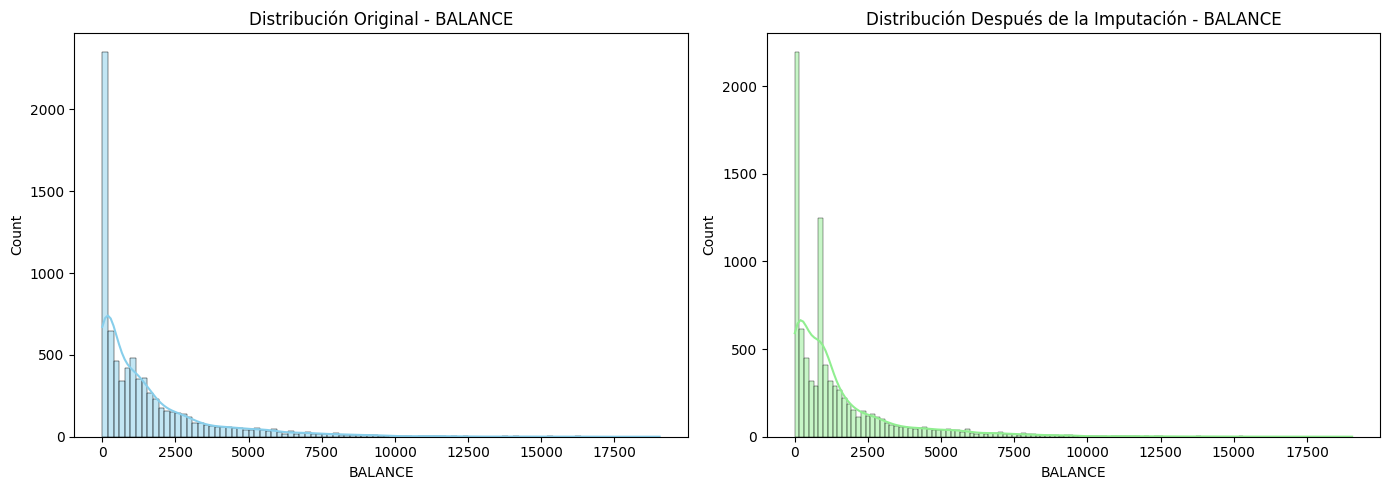

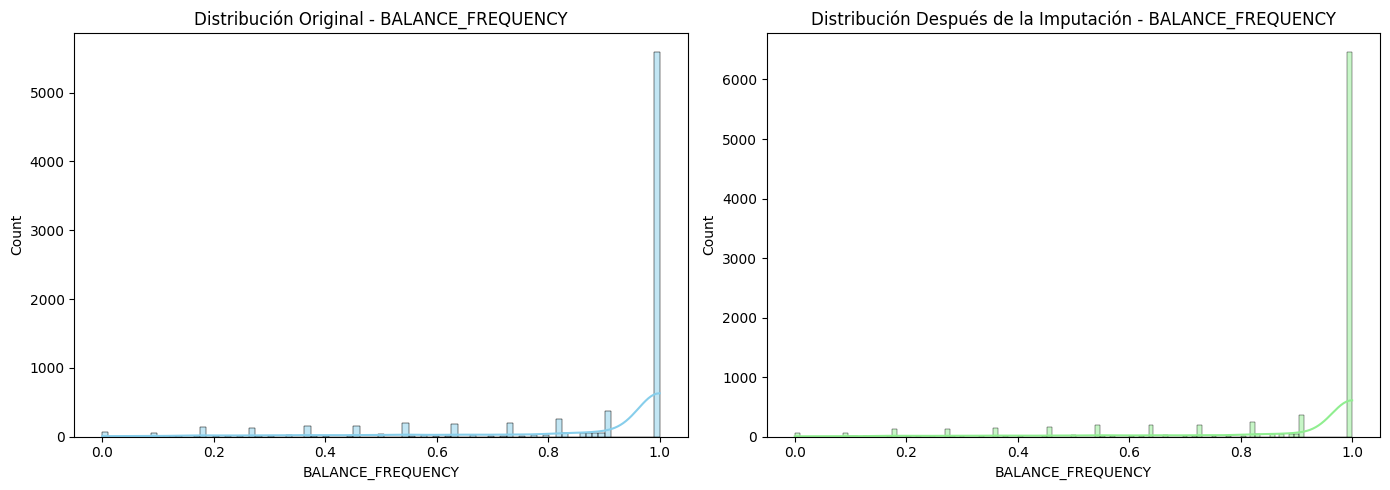

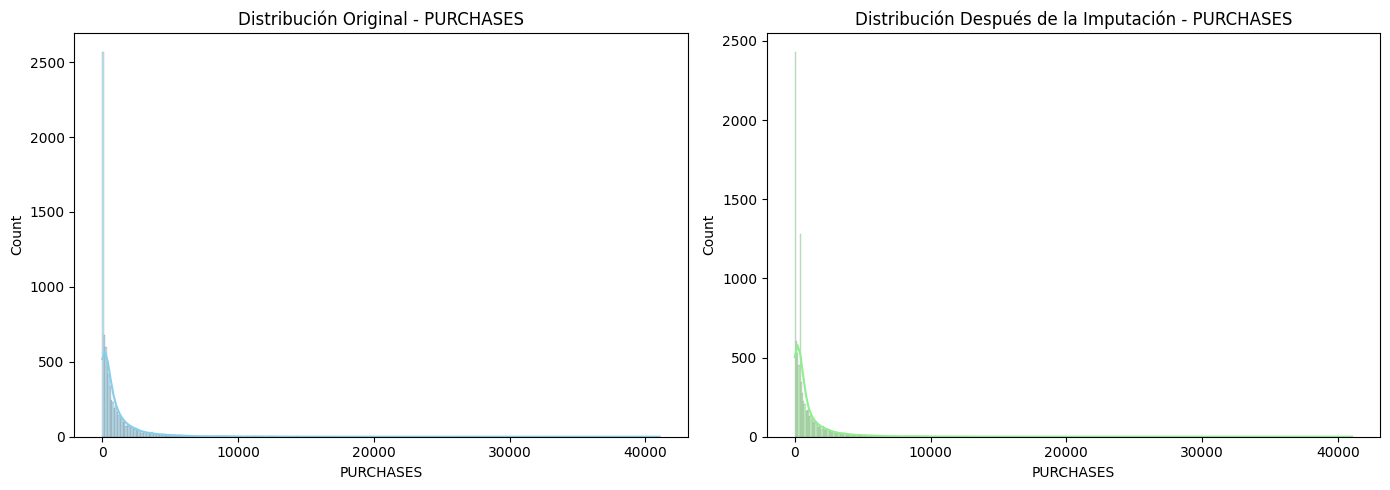

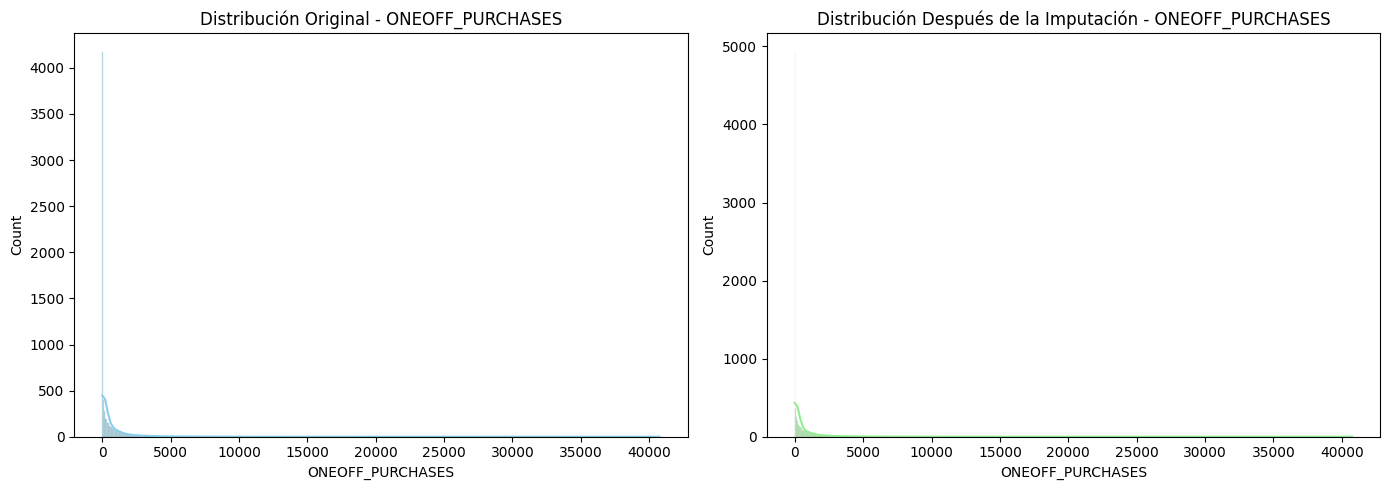

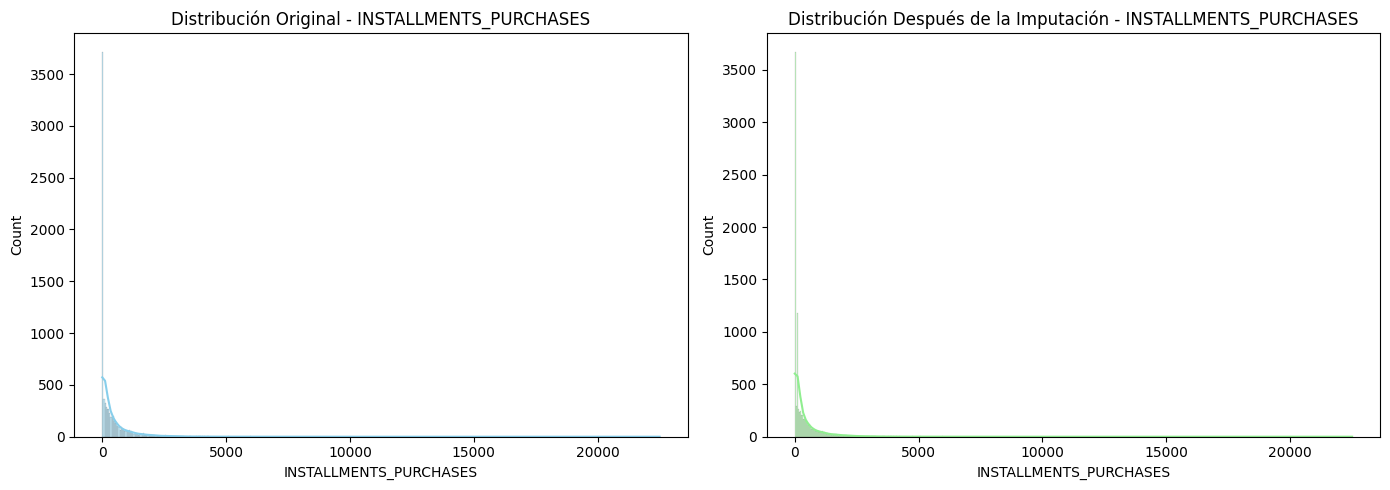

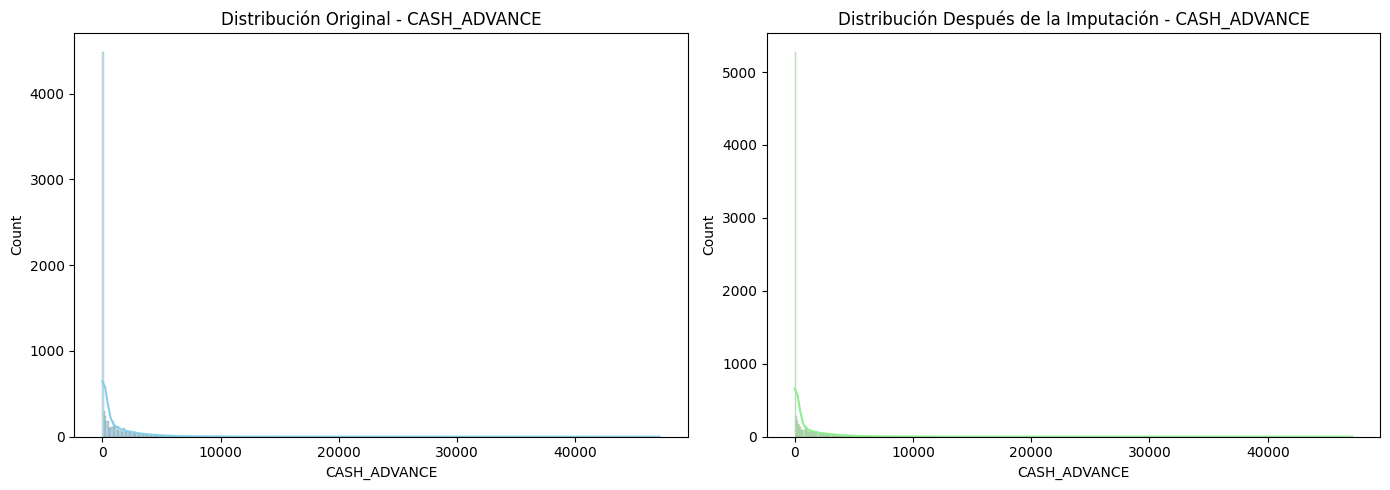

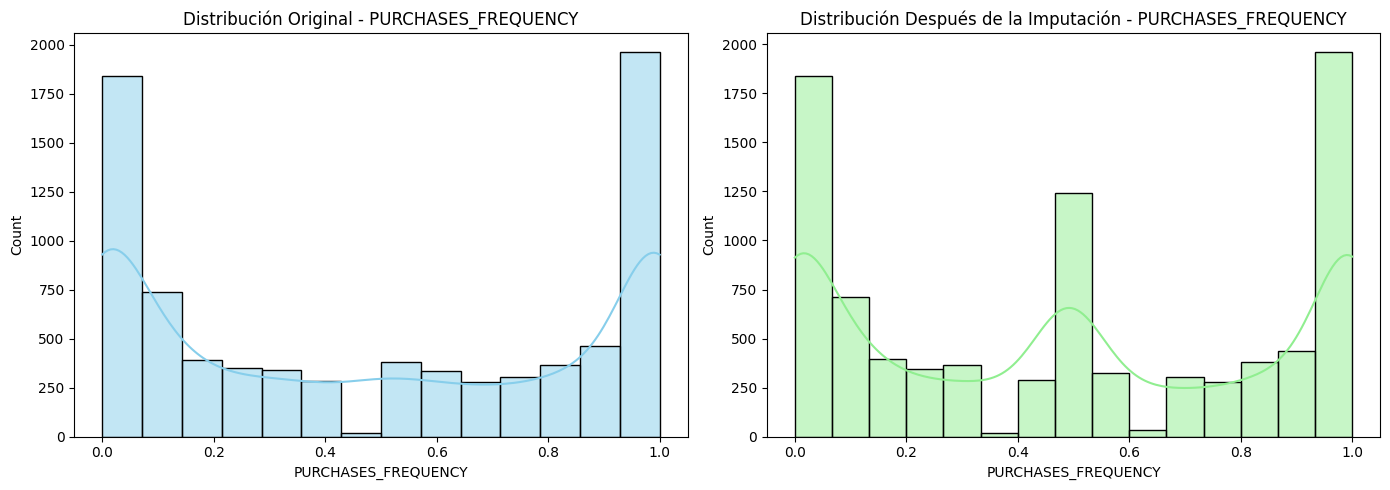

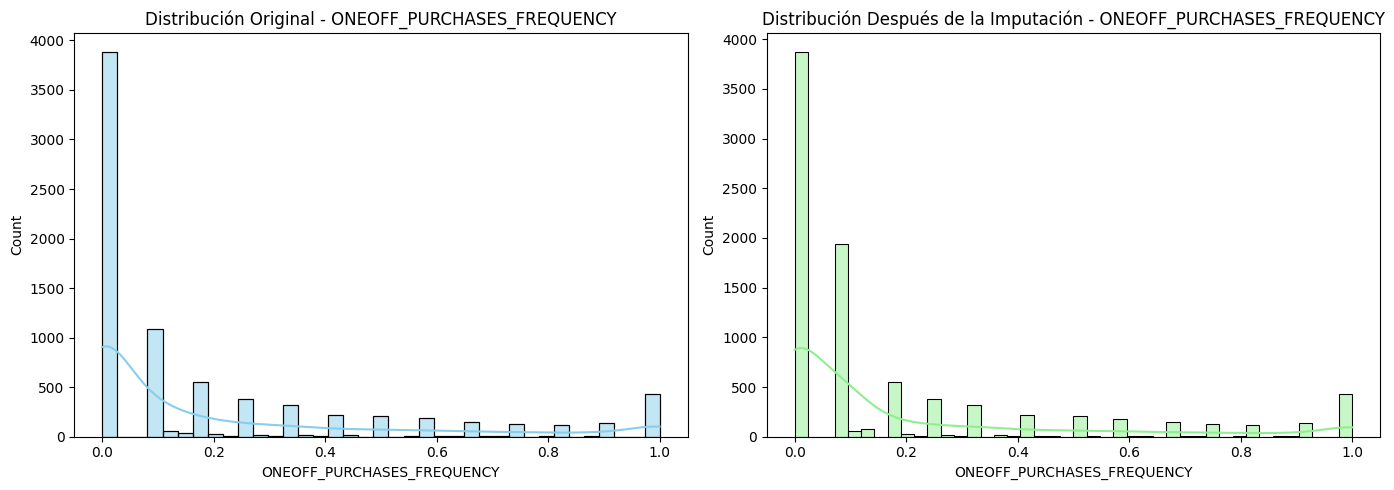

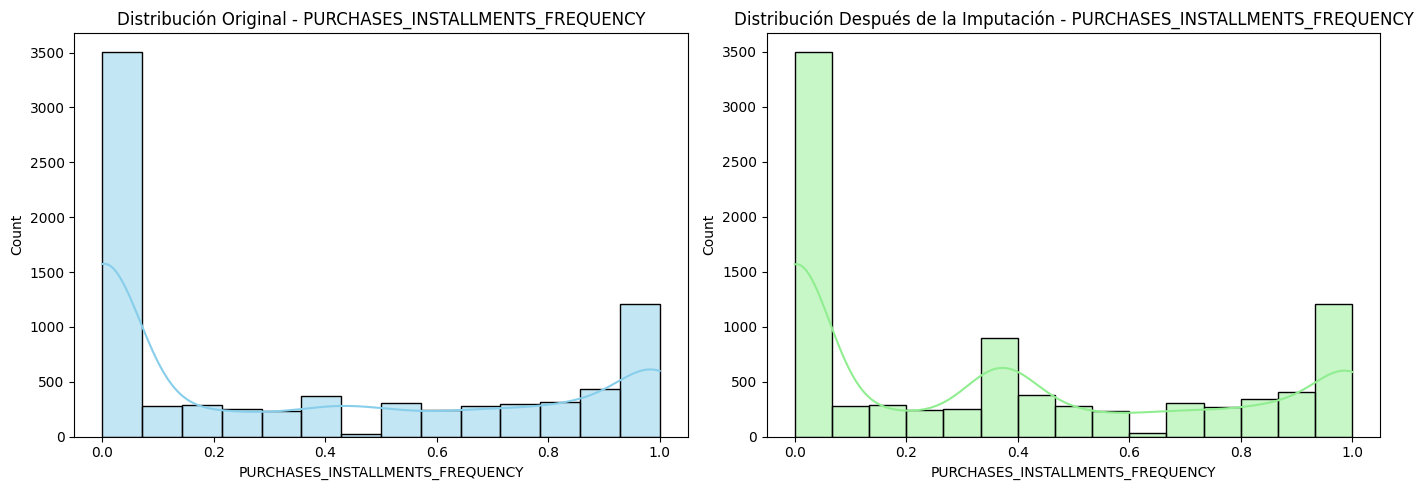

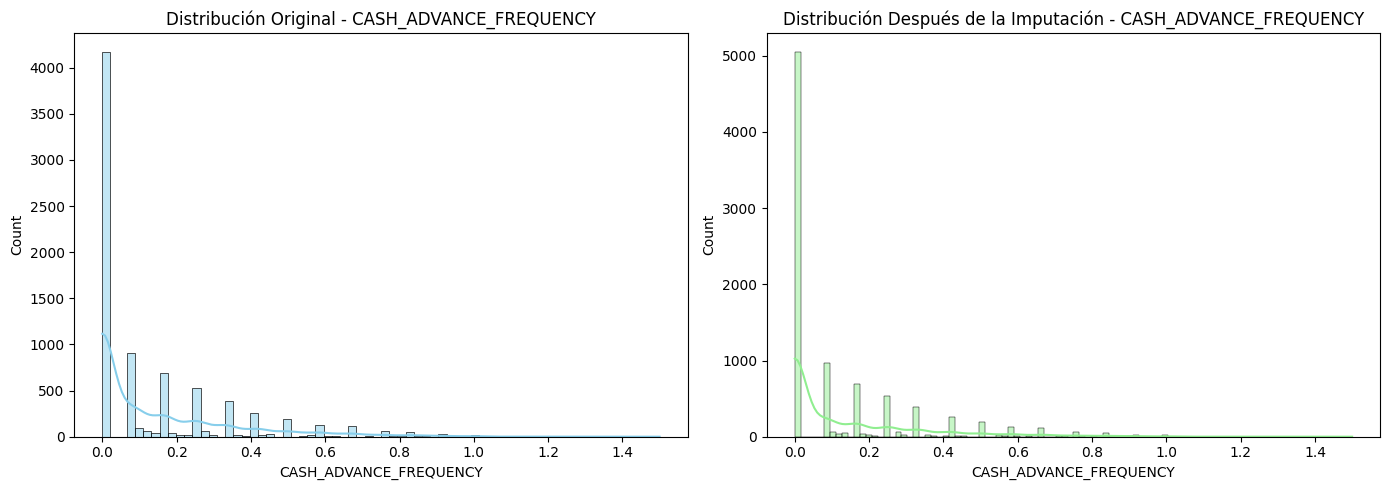

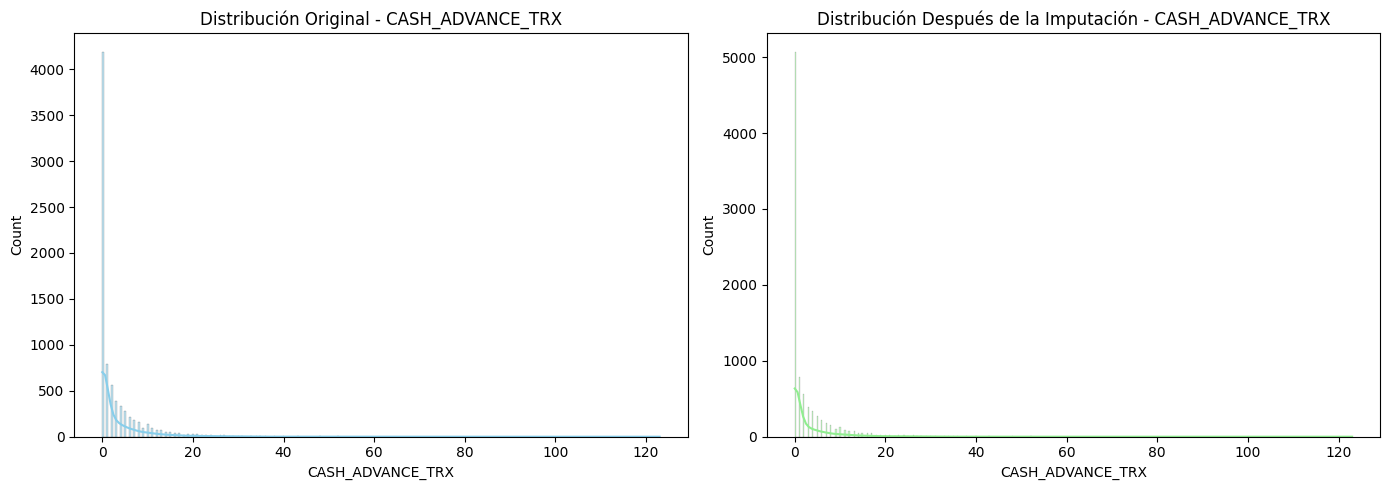

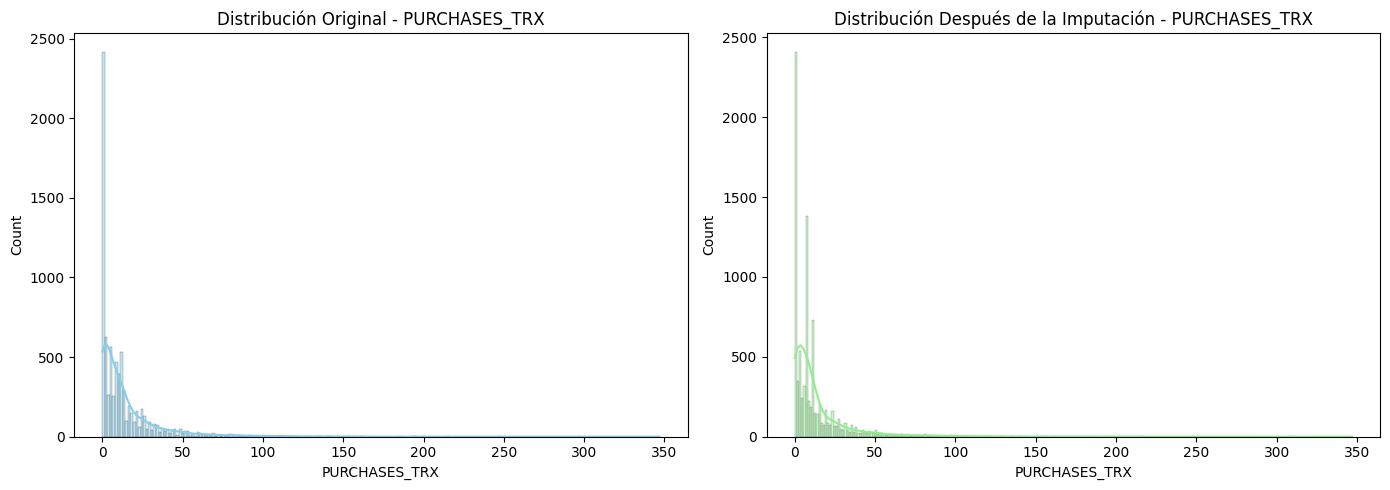

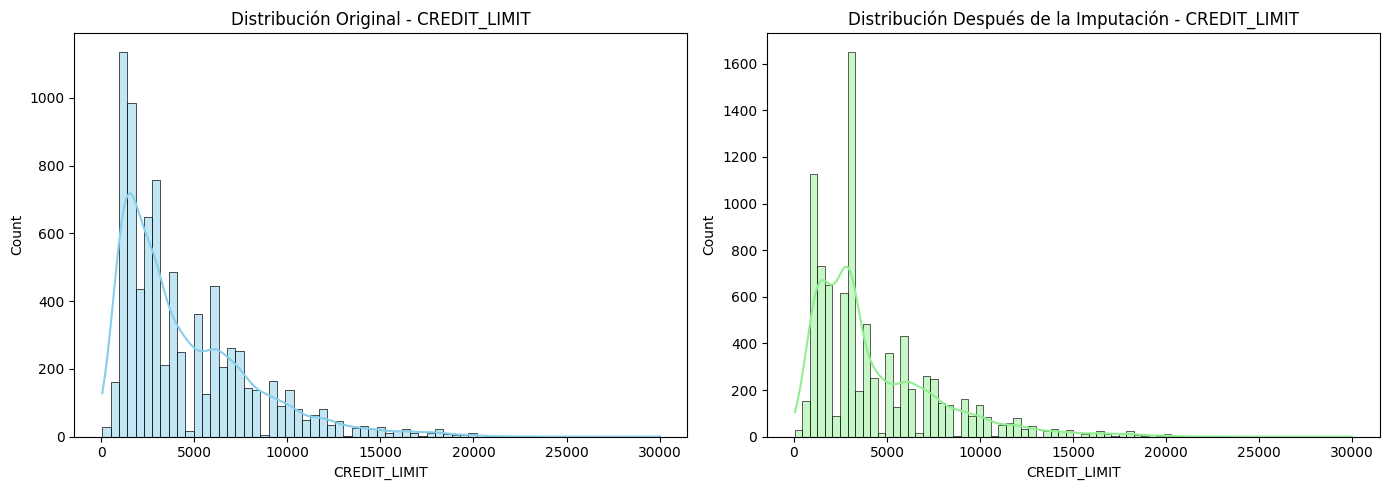

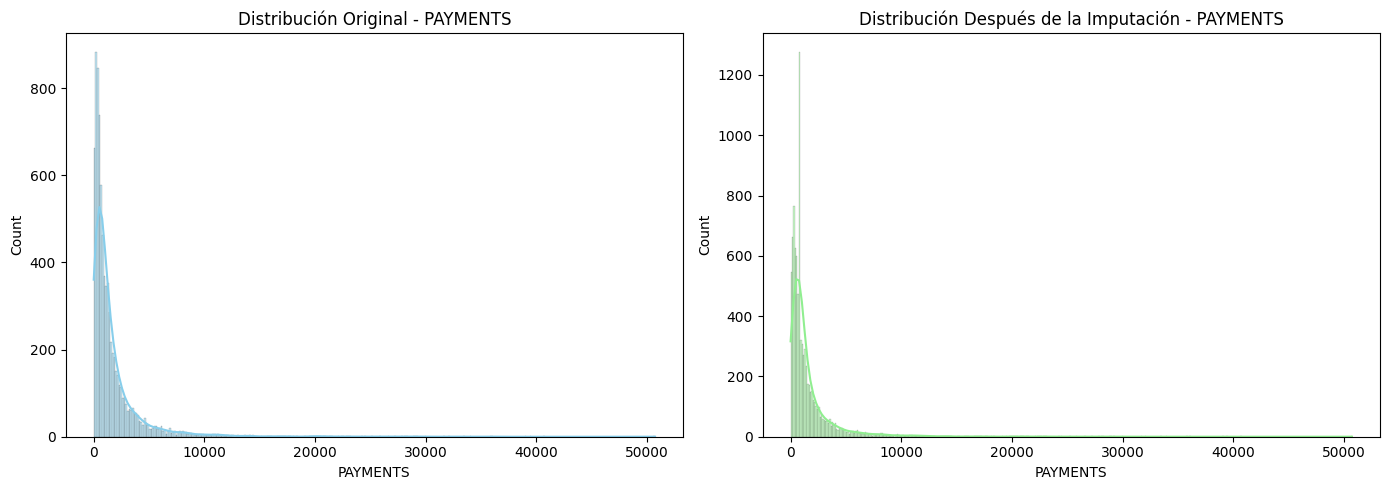

La columna MINIMUM_PAYMENTS ha sido eliminada


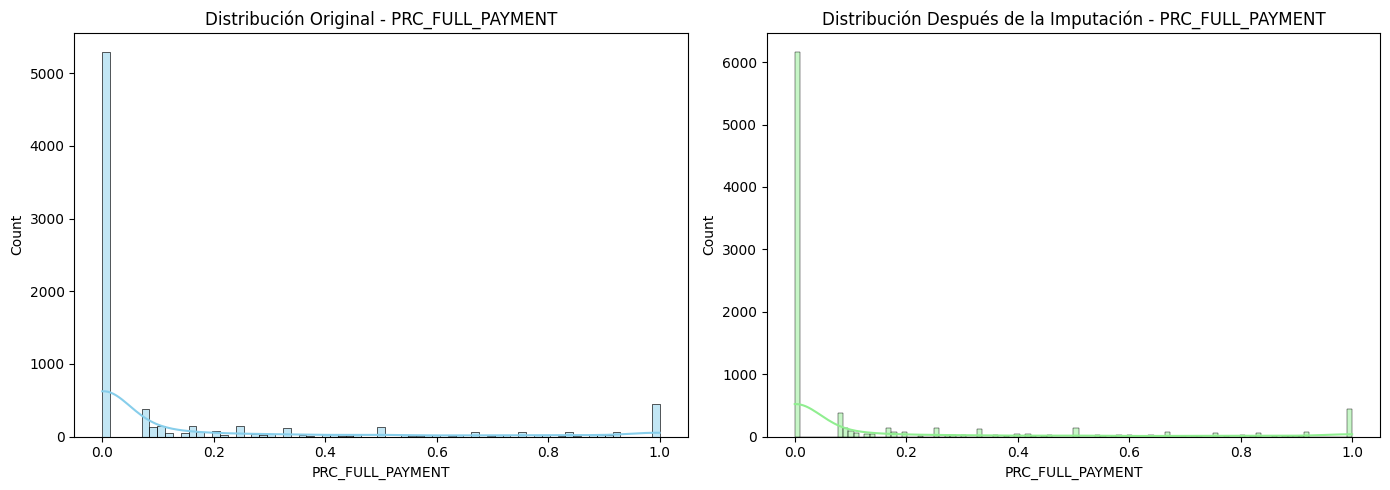

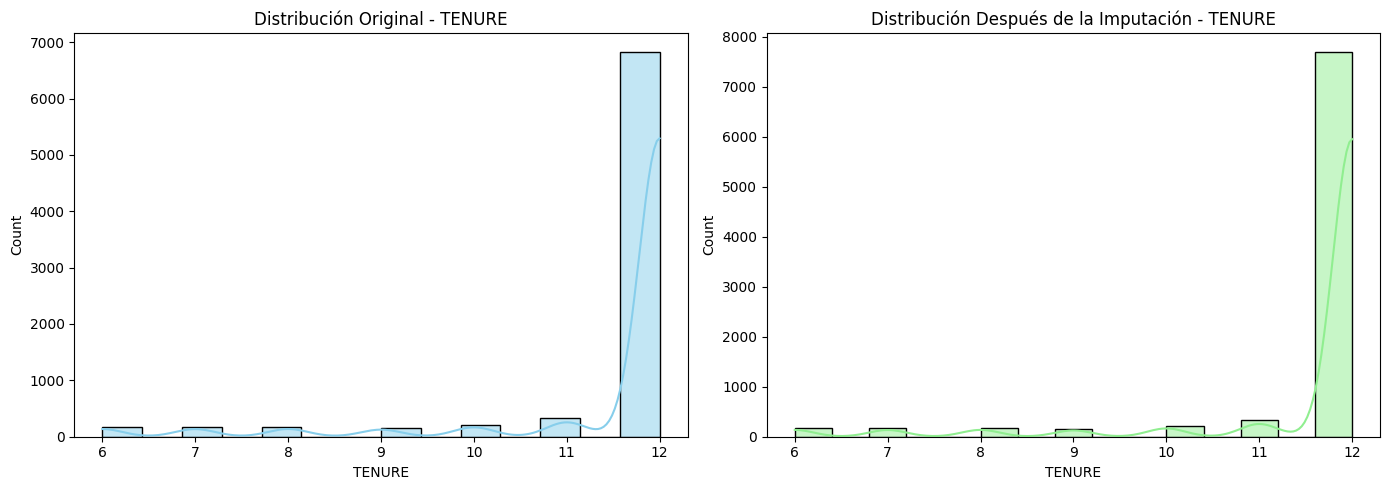

In [ ]:
# Lista de columnas numéricas con valores nulos originales
cols_with_nulls = df.columns[df.isnull().any()].tolist()

# Comparar distribuciones antes y después de la imputación
for col in cols_with_nulls:
  if col== "MINIMUM_PAYMENTS":
    print(f"La columna {col} ha sido eliminada")
  else:
  # Gráficos de distribución antes y después
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histograma antes de la imputación
    sns.histplot(df[col].dropna(), kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Distribución Original - {col}')

    # Histograma después de la imputación
    sns.histplot(df_dropped[col], kde=True, color='lightgreen', ax=axes[1])
    axes[1].set_title(f'Distribución Después de la Imputación - {col}')

    plt.tight_layout()
    plt.show()

**Conclusiones: Distribuciones antes y después de la imputación lucen bastante similares**

**CASH_ADVANCE_FREQUENCY**

1. La distribución después de la imputación sigue mostrando una fuerte asimetría (muchos valores cerca de 0 y una cola muy larga hacia la derecha).
2. El pico alrededor de 0 parece ligeramente más alto después de la imputación, lo que sugiere que los valores nulos sustituidos con la mediana han incrementado la frecuencia de ese bin.
3. Aun así, la forma global (pico en 0, cola extendida) se mantiene.

**BALANCE**

1. Continúa siendo muy sesgada a la derecha, con un gran acumulado cerca de valores relativamente bajos y un largo “arrastre” hacia montos más altos.
2. La altura del primer bin (cerca de 0) aumenta levemente después de la imputación. Posiblemente, la mediana sea baja (o incluso 0), de modo que los valores nulos quedaron cerca de esa zona.
3. El resto de la distribución (hasta 40,000–45,000) se mantiene casi idéntico, lo que indica que la imputación no alteró drásticamente la proporción de observaciones a lo largo de la cola.

**BALANCE_FREQUENCY**

1. Prácticamente todos los valores se concentran cerca de 1, con muy pocos en el rango intermedio (0–0.9).
2. El pico extremo en 1 se observa tanto antes como después de la imputación.
3. Es probable que la mediana se aproxime a 1, por lo que los valores nulos fueron reemplazados por 1, incrementando ligeramente el conteo en esa columna del histograma.
4. La distribución conserva su rasgo principal: la inmensa mayoría de registros se ubican en la zona alta (frecuencia próxima a 1)

**CASH_ADVANCE**

1. Se ve la típica distribución fuertemente sesgada con una concentración muy alta en valores cercanos a 0 y una larga cola que llega incluso a 40,000–45,000.
2. El pico cercano a 0 aumenta un poco, producto de reemplazar valores nulos con la mediana, seguramente baja.
3. De nuevo, el resto de la cola conserva la forma previa.

**INSTALLMENTS_PURCHASES**

1. Antes: Pico muy pronunciado cerca de 0 y cola larga que llega hasta valores superiores a 20 000.
2. Después: El pico en torno a 0 aumenta ligeramente, lo que sugiere que la mediana de la variable (probablemente cercana a 0) se aplicó a las celdas nulas.
3. Conclusión: La distribución sigue igual de sesgada; simplemente se concentran algunos valores adicionales en el entorno de la mediana.

**MINIMUM_PAYMENTS**

1. Antes: Altísima concentración de datos en valores cercanos a 0, con una cola muy larga que llega hasta 80 000.
2. Después: Se observa casi la misma curva, con un ligero incremento en el bin cercano a 0 (o en la mediana si esta no es exactamente 0 pero muy baja).
3. Conclusión: Sigue habiendo una fuerte asimetría (muchos valores pequeños y algunos extremadamente altos). El “efecto de imputación” es apenas perceptible en la base del pico.

**CASH_ADVANCE_TRX**

1. Antes: Mucha densidad en 0 (cantidad de transacciones en efectivo) y luego una cola hacia 120.
2. Después: El pico en 0 también se ve un poco más alto. La forma de la cola permanece.
3. Conclusión: La imputación con la mediana—que parece ser baja—ha añadido más observaciones en ese entorno, pero el resto de la distribución conserva su sesgo.

**CREDIT_LIMIT**

1. Antes: Distribución típicamente sesgada a la derecha, con la mayor densidad en el rango de 0 a 5000, y un arrastre largo hasta 30 000.
2. Después: Se mantiene la misma estructura general (pico en rangos bajos y cola extendida). Puede notarse una variación en la localización del máximo (la barra más alta), reflejando el nuevo valor imputado (mediana) que se “sumó” al bin correspondiente.
3. Conclusión: Persiste el sesgo a la derecha, y la variación es la esperada cuando se reemplazan valores nulos con un valor central.

**PRC_FULL_PAYMENT**
1. Antes: Gran concentración en valores muy próximos a 0 y algunos valores dispersos entre 0.2 y 1.
2. Después: El pico en 0 se hace aún más notorio (probablemente la mediana sea 0 o muy cercana a 0), de modo que los nulos han pasado a engrosar esa “barra”.
3. Conclusión: La fuerte asimetría se conserva, y el grueso de la distribución sigue siendo esencialmente la misma, solo que se incrementa la altura en torno a 0.

**ONEOFF_PURCHASES**
1. Antes: Sesgo extremo, con la mayoría de valores acumulados por debajo de 500–1 000 y una larga cola que llega hasta más de 40 000.
2. Después: La forma de la cola no se modifica de modo drástico; el mayor cambio es en los valores cercanos a la mediana (seguramente baja), que ahora tienen mayor peso.
3. Conclusión: El alto sesgo permanece. Para un clustering futuro, podrías considerar transformaciones como logaritmos si fuese pertinente.

**ONEOFF_PURCHASES_FREQUENCY**
1. Antes: Muy concentrada en 0, con frecuencia decreciente conforme nos acercamos a 1.
2. Después: Continúa el patrón de “pico” en 0 y luego valores cada vez menores hasta 1. La barra en 0 aumenta porque los nulos se reemplazaron por la mediana (posiblemente muy cercana a 0).
3. Conclusión: Se conserva la distribución principal, con un leve refuerzo del bin de la mediana.

**PAYMENTS**
1. Antes: Fuerte concentración en pagos bajos (cerca de 0) y una larga cola hacia montos de decenas de miles.
2. Después: De nuevo, el pico cerca de 0 se incrementa un poco, pero la cola sigue extendiéndose sin cambios significativos en su límite (hasta ~50 000).
3. Conclusión: La asimetría no varía sustancialmente; el bin principal (cerca de 0) absorbe los nulos imputados.

**PURCHASES_TRX**
1. Antes: Se ve un pico muy alto en valores bajos (cercanos a 0) y una larga cola que se extiende hasta alrededor de 300–350.
2. Después: El pico cercano a 0 aumenta, lo cual sugiere que la mediana está en valores bajos y que los datos nulos reemplazados se concentran ahí.
3. Conclusión: Persiste la misma asimetría, por lo que no hay una alteración drástica de la distribución.

**PURCHASES**
1. Antes: Distribución fuertemente sesgada a la derecha, con la mayoría de observaciones por debajo de 1000 y algunas llegando a más de 40 000.
2. Después: Se mantiene la cola larga, y el bin en torno a la mediana (posiblemente cercano a 0) registra más observaciones.
3. Conclusión: La imputación no deforma la estructura principal; solo refuerza el conteo en el rango bajo.

**PURCHASES_FREQUENCY**
1. Antes: Dos picos claros, uno cerca de 0 y otro en 1, con un valle en el rango intermedio (0.2–0.8).
2. Después: Se ve un comportamiento similar: la barra en 0 se vuelve algo más alta, y la de 1 también.
3. Conclusión: La distribución bimodal (o “U-shaped”) se conserva, indicando la coexistencia de clientes que prácticamente no realizan compras frecuentes y clientes que compran muy seguido (cerca de 1).

**PURCHASES_INSTALLMENTS_FREQUENCY**
1. Antes: Un pico muy grande en 0, algunos valores repartidos entre 0.1 y 0.8, y otro repunte cerca de 1.
2. Después: El pico en 0 aumenta ligeramente; la cola intermedia se distribuye de forma similar; el repunte en 1 también persiste.
3. Conclusión: La forma mantiene su fuerte concentración en 0 (clientes que no realizan compras a plazos) y un grupo que lo hace muy frecuentemente (1).

**TENURE**

1. Antes: La gran mayoría de registros se concentran en el valor 12, con muy pocos clientes en los niveles 6 a 11.
Esto hace que la distribución sea fuertemente sesgada hacia la derecha (o, en términos discretos, hacia el valor máximo).
2. Después: El pico en el valor 12 es aún más alto, lo que indica que el valor faltante fue reemplazado por la mediana, casi seguro igual a 12. Se conserva la misma forma: la mayor parte de la población está en el valor 12, y el resto distribuido en valores menores.
3. Conclusión: La forma general de la distribución no cambió sustancialmente. Solo se refuerza el conteo en 12 al imputar los nulos con ese mismo valor. Al ser una variable casi categórica (número entero de meses), es normal ver concentraciones fuertes en un valor.
En un análisis posterior, convendría decidir si se trata como categórica u ordinal (por ejemplo, 6 meses, 7 meses, etc.) y si tener casi todos los datos en 12 puede afectar la segmentación posterior.



In [ ]:
for col in cols_with_nulls:
  if col== "MINIMUM_PAYMENTS":
    print("La columna 'MINIMUM_PAYMENTS' ha sido eliminada")
  else:
    print(f"\n📊 Estadísticas de la columna: {col}")
    print("Antes de la imputación:")
    print(df[col].describe())
    print("\nDespués de la imputación:")
    print(df_dropped[col].describe())




📊 Estadísticas de la columna: BALANCE
Antes de la imputación:
count     8055.000000
mean      1564.721016
std       2077.820226
min          0.000000
25%        128.770565
50%        876.577775
75%       2063.888893
max      19043.138560
Name: BALANCE, dtype: float64

Después de la imputación:
count     8924.000000
mean      1496.114650
std       1983.635874
min          0.000000
25%        167.440374
50%        875.694029
75%       1847.503488
max      19043.138560
Name: BALANCE, dtype: float64

📊 Estadísticas de la columna: BALANCE_FREQUENCY
Antes de la imputación:
count    8055.000000
mean        0.877907
std         0.235817
min         0.000000
25%         0.888889
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

Después de la imputación:
count    8924.000000
mean        0.889888
std         0.226906
min         0.000000
25%         0.909091
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENC

Verificando la columna "Cash_advance_frequency" nos dimos cuenta que generaba ruido, debido a que su valor máximo es de 1.5. A continuación se procederá a eliminar los valores que la variable que sean mayores a 1.

In [ ]:

df_dropped = df_dropped[df_dropped['CASH_ADVANCE_FREQUENCY'] <= 1]

In [ ]:
df_dropped['CASH_ADVANCE_FREQUENCY'].describe()

count    8916.000000
mean        0.120646
std         0.191721
min         0.000000
25%         0.000000
50%         0.000000
75%         0.166667
max         1.000000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

Se eliminaron 8 valores que generaban ruido en el dataframe.

In [ ]:
for col in cols_with_nulls:
    if col== "MINIMUM_PAYMENTS":
      print("La columna 'MINIMUM_PAYMENTS' ha sido eliminada")
    else:
      skewness = df_dropped[col].skew()
      print(f'{col}: Skewness = {skewness:.2f}')
      if abs(skewness) < 1:
        print(f"✅ Distribución aproximadamente simétrica: Imputar con MEDIA.")
      else:
        print(f"⚠️ Distribución asimétrica: Imputar con MEDIANA.")

BALANCE: Skewness = 2.57
⚠️ Distribución asimétrica: Imputar con MEDIANA.
BALANCE_FREQUENCY: Skewness = -2.20
⚠️ Distribución asimétrica: Imputar con MEDIANA.
PURCHASES: Skewness = 7.95
⚠️ Distribución asimétrica: Imputar con MEDIANA.
ONEOFF_PURCHASES: Skewness = 10.66
⚠️ Distribución asimétrica: Imputar con MEDIANA.
INSTALLMENTS_PURCHASES: Skewness = 7.87
⚠️ Distribución asimétrica: Imputar con MEDIANA.
CASH_ADVANCE: Skewness = 5.53
⚠️ Distribución asimétrica: Imputar con MEDIANA.
PURCHASES_FREQUENCY: Skewness = 0.06
✅ Distribución aproximadamente simétrica: Imputar con MEDIA.
ONEOFF_PURCHASES_FREQUENCY: Skewness = 1.71
⚠️ Distribución asimétrica: Imputar con MEDIANA.
PURCHASES_INSTALLMENTS_FREQUENCY: Skewness = 0.52
✅ Distribución aproximadamente simétrica: Imputar con MEDIA.
CASH_ADVANCE_FREQUENCY: Skewness = 1.93
⚠️ Distribución asimétrica: Imputar con MEDIANA.
CASH_ADVANCE_TRX: Skewness = 5.43
⚠️ Distribución asimétrica: Imputar con MEDIANA.
PURCHASES_TRX: Skewness = 4.81
⚠️ Distr

## 1.2  Detección y Eliminación de Valores atípicos

**Identificación de valores atípicos para la columna "PURCHASES_FREQUENCY"**



<Axes: ylabel='PURCHASES_FREQUENCY'>

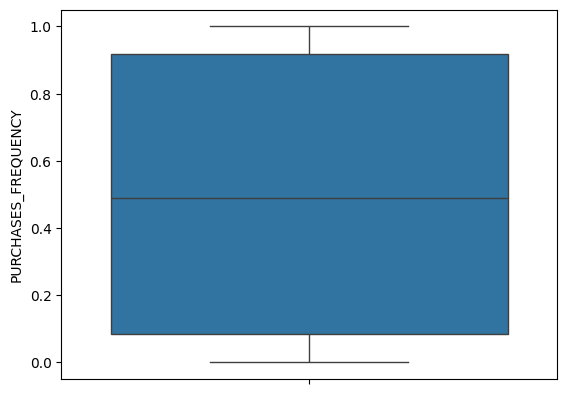

In [ ]:
sns.boxplot(df_dropped['PURCHASES_FREQUENCY'])

In [ ]:
df_dropped['PURCHASES_FREQUENCY'].describe()

count    8916.000000
mean        0.490284
std         0.381118
min         0.000000
25%         0.083333
50%         0.489976
75%         0.916667
max         1.000000
Name: PURCHASES_FREQUENCY, dtype: float64

Segun el boxplot, la variable no tiene valores atípicos Y la concentración de sus datos se encuentra entre 0.08 y 0.92. A continuación, se realizará la prueba de normalidad de Anderson Darling para validar la misma cuya columna se denomina "PURCHASE_FREQUENCY"

In [ ]:
result = anderson(df_dropped['PURCHASES_FREQUENCY'])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'PURCHASES_FREQUENCY' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'PURCHASES_FREQUENCY' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 361.5038350830837
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'PURCHASES_FREQUENCY' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

Como se rechaza la hipótesis nula, la variable "PURCHASE_FREQUENCY" no sigue una distribución normal y por ende se descarta el método del Zscore. A continuación, se aplica el método intercuartil para validar la cantidad de valores atípicos que podrían eiliminarse.

In [ ]:
var_name = "PURCHASES_FREQUENCY"
q1 = df_dropped[var_name].quantile(0.25)
q3 = df_dropped[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_dropped[var_name] < low_fence) | (df_dropped[var_name] > high_fence))
df_no_outliers = df_dropped.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_dropped.shape[0])
print("Filas luego:", df_no_outliers.shape[0])

Filas antes: 8916
Filas luego: 8916


La columna "PURCHASES_FREQUENCY" no tiene una cantidad de valores atípicos, segun el boxplot y el cálculo de valores atípicos mediante el método intercuartil.

**Identificación de valores atípicos para la columna "PURCHASES_INSTALLMENTS_FREQUENCY"**

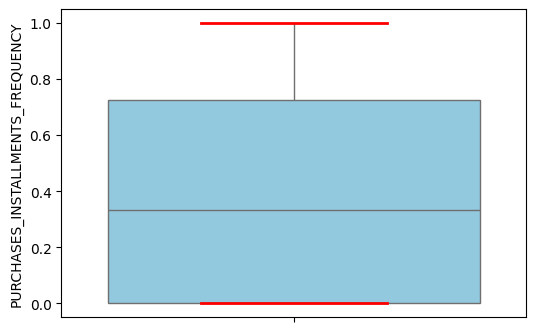

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_dropped['PURCHASES_INSTALLMENTS_FREQUENCY'],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

Segun el boxplot, la variable no tiene valores atípicos Y la concentración de sus datos se encuentra entre 0.1 y 0.3. A continuación, se realizará la prueba de normalidad de Anderson Darling para validar la misma y conocer que método de imputación de valores atípicos se podría emplear

In [ ]:
result = anderson(df_dropped['PURCHASES_INSTALLMENTS_FREQUENCY'])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'PURCHASES_INSTALLMENTS_FREQUENCY' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'PURCHASES_INSTALLMENTS_FREQUENCY' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 566.549237163099
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'PURCHASES_INSTALLMENTS_FREQUENCY' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

Como se rechaza la hipótesis nula, la variable "PURCHASE_INSTALLMENTS_FREQUENCY" no sigue una distribución normal y por ende se descarta el método del Zscore. A continuación, se aplica el método intercuartil para validar la cantidad de valores atípicos podrían descartarse.

In [ ]:
var_name = "PURCHASES_INSTALLMENTS_FREQUENCY"
q1 = df_dropped[var_name].quantile(0.25)
q3 = df_dropped[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_dropped[var_name] < low_fence) | (df_dropped[var_name] > high_fence))
df_no_outliers = df_dropped.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_dropped.shape[0])
print("Filas luego:", df_no_outliers.shape[0])

Filas antes: 8916
Filas luego: 8916


La columna "PURCHASES_INSTALLMENTS_FREQUENCY" no tiene una cantidad de valores atípicos, segun el boxplot y el cálculo de los valores atípicos mediante el método intercuratil. La mayoría de los valores están entre 0.25 y 0.45, con una mediana alrededor de 0.33, lo que indica que los clientes no suelen realizar compras a plazos con una frecuencia moderada.

**Identificación de valores atípicos para la columna "BALANCE"**

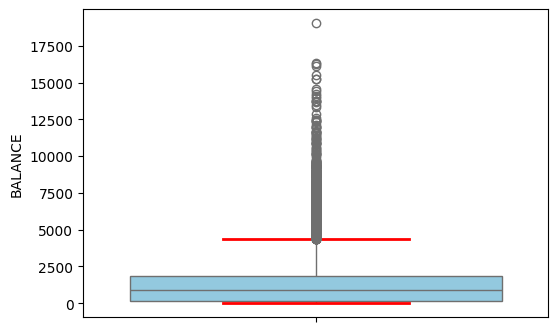

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_dropped['BALANCE'],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_dropped['BALANCE'].describe()

count     8916.000000
mean      1493.467473
std       1981.527971
min          0.000000
25%        166.973665
50%        875.694029
75%       1844.945627
max      19043.138560
Name: BALANCE, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 167 y 1845. A continuación, se procederá a realizar una transformacion de la variable asimétrica "BALANCE" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

**Scikit-learn documentation**
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
- Explica el uso de PowerTransformer(method='box-cox') para ajustar automáticamente el parámetro
𝜆
λ.

In [ ]:
df_dropped['BALANCE_shifted'] = df_dropped['BALANCE'] + 0.01
df_dropped['BALANCE_boxcox'], fitted_lambda = stats.boxcox(df_dropped['BALANCE_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: 0.23252602261084274


<ipython-input-50-268d3fcedcf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['BALANCE_shifted'] = df_dropped['BALANCE'] + 0.01
<ipython-input-50-268d3fcedcf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['BALANCE_boxcox'], fitted_lambda = stats.boxcox(df_dropped['BALANCE_shifted'])


Sumamos $0.01 a la nueva columna "BALANCE_shifted", ya que la transformación Box Cox unicamente considera valores positivos.

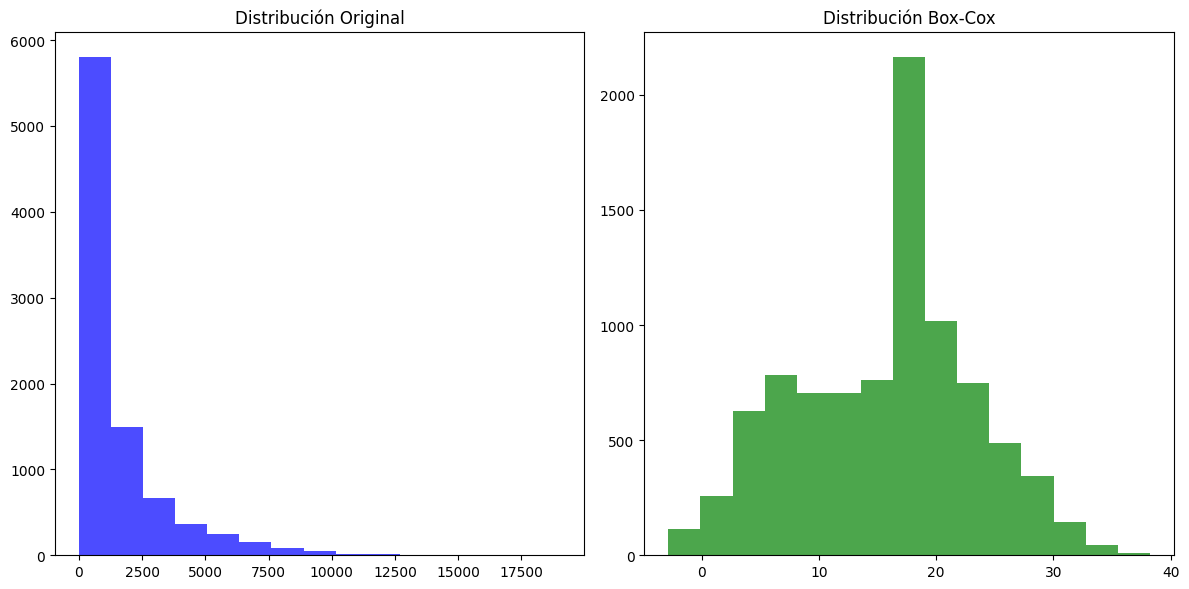

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_dropped['BALANCE'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_dropped['BALANCE_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

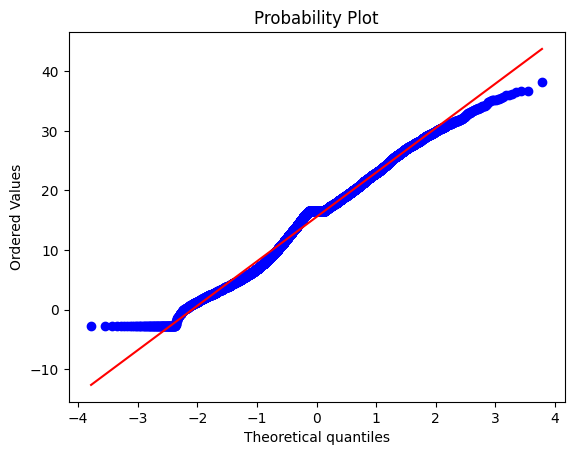

In [ ]:
stats.probplot(df_dropped['BALANCE_boxcox'], dist="norm", plot=plt)
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "BALANCE_boxcox", esta no se puede ajustar a una distribución normal. A continuación, se lo valida con la prueba normalidad "Anderson Darling".

In [ ]:
result = anderson(df_dropped["BALANCE_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'BALANCE_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'BALANCE_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 47.18961292702443
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'BALANCE_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

En conclusión, la columna "BALANCE_boxcox" no sigue una distribución normal. El método estadístico apropiado para detectar y eliminar valores atípicos seria empleando el método del rango intercuantil

In [ ]:
var_name ="BALANCE_boxcox"
q1 = df_dropped[var_name].quantile(0.25)
q3 = df_dropped[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_dropped[var_name] < low_fence) | (df_dropped[var_name] > high_fence))
df_no_outliers = df_dropped.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_dropped.shape[0])
print("Filas luego:", df_no_outliers.shape[0])

Filas antes: 8916
Filas luego: 8912


Se eliminan un total de 4 valores atípicos

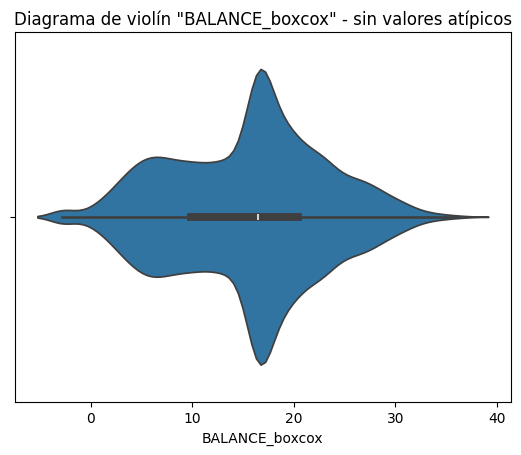

In [ ]:
sns.violinplot(x=df_no_outliers["BALANCE_boxcox"])
plt.title(f'Diagrama de violín "BALANCE_boxcox" - sin valores atípicos')
plt.show()

**Identificación de valores atípicos para la columna "PURCHASES"**

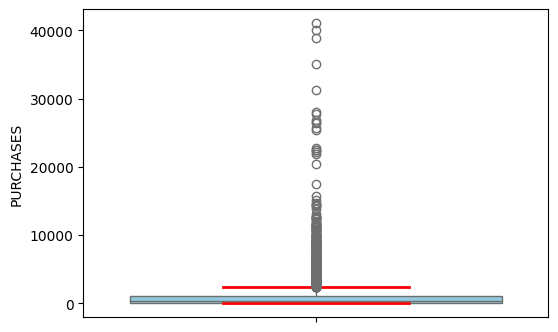

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_no_outliers['PURCHASES'],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_no_outliers['PURCHASES'].describe()

count     8912.000000
mean       928.702846
std       1970.729829
min          0.000000
25%         64.090000
50%        356.650000
75%        987.917500
max      41050.400000
Name: PURCHASES, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 64 y 987. A continuación, se procederá a realizar una transformacion de la variable asimétrica "PURCHASES" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

In [ ]:
df_no_outliers['PURCHASES_shifted'] = df_no_outliers['PURCHASES'] + 0.01
df_no_outliers['PURCHASES_boxcox'], fitted_lambda = stats.boxcox(df_no_outliers['PURCHASES_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: 0.198696592624999


Sumamos $0.01 a la nueva columna "PURCHASES_shifted", ya que la transformación Box Cox unicamente considera valores positivos.

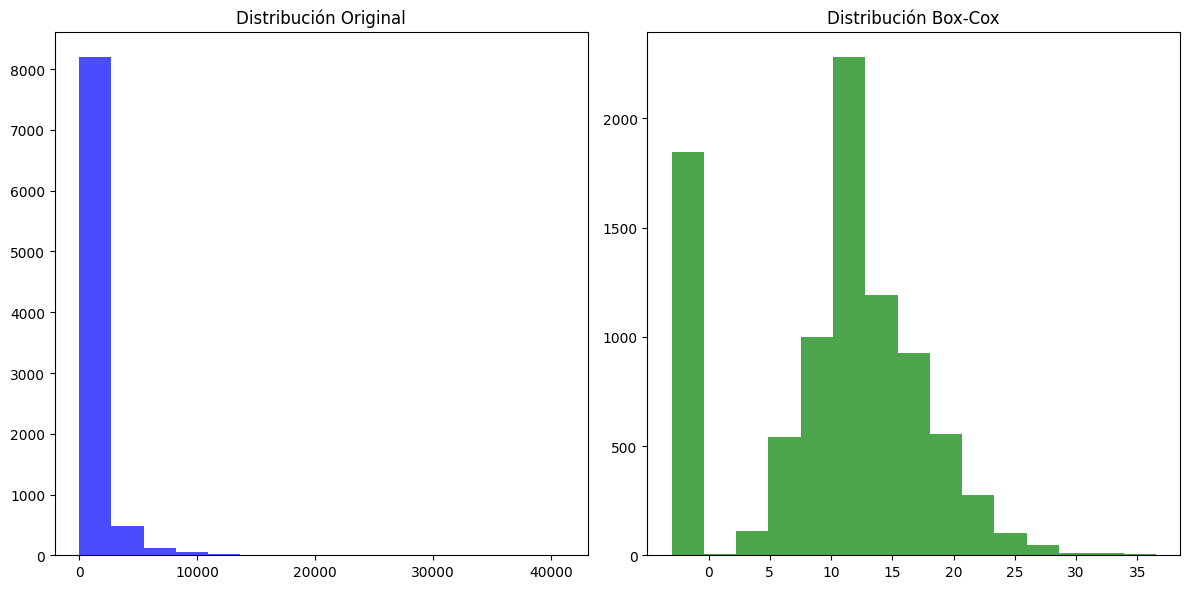

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_no_outliers['PURCHASES'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_no_outliers['PURCHASES_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

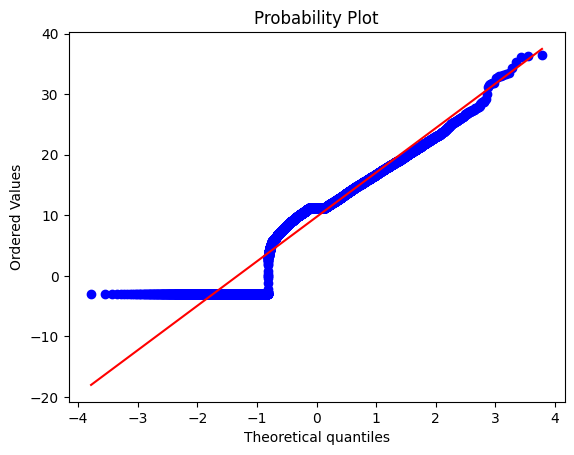

In [ ]:
stats.probplot(df_no_outliers['PURCHASES_boxcox'], dist="norm", plot=plt)
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "PURCHASES_boxcox", esta NO se puede ajustar a una distribución normal. A continuación, se lo valida con la prueba normalidad "Anderson Darling".

In [ ]:
result = anderson(df_no_outliers["PURCHASES_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'BALANCE_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'BALANCE_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 322.67376698890985
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'BALANCE_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

En conclusión, la columna "PURCHASES_boxcox" no sigue una distribución normal. El método estadístico apropiado para detectar y eliminar valores atípicos seria empleando el método del rango intercuantil.

In [ ]:
var_name = "PURCHASES_boxcox"
q1 = df_no_outliers[var_name].quantile(0.25)
q3 = df_no_outliers[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_no_outliers[var_name] < low_fence) | (df_no_outliers[var_name] > high_fence))
df_no_outliers1 = df_no_outliers.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_no_outliers.shape[0])
print("Filas luego:", df_no_outliers1.shape[0])

Filas antes: 8912
Filas luego: 8871


Se eliminan un total de 43 valores atípicos

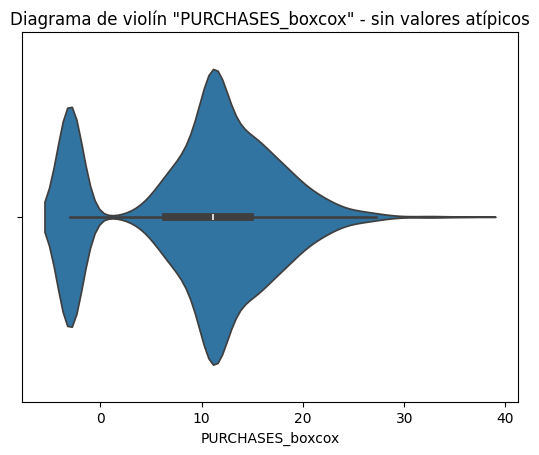

In [ ]:
sns.violinplot(x=df_no_outliers1["PURCHASES_boxcox"])
plt.title(f'Diagrama de violín "PURCHASES_boxcox" - sin valores atípicos')
plt.show()

**Identificación de valores atípicos para la columna "ONEOFF_PURCHASES"**

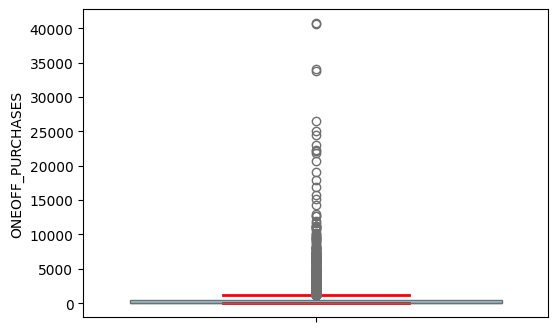

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_no_outliers1['ONEOFF_PURCHASES'],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_no_outliers1['ONEOFF_PURCHASES'].describe()

count     8871.000000
mean       538.650696
std       1588.637926
min          0.000000
25%          0.000000
50%         41.200000
75%        472.860000
max      40761.250000
Name: ONEOFF_PURCHASES, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 0 y 469. A continuación, se procederá a realizar una transformacion de la variable asimétrica "ONEOFF_PURCHASES" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

In [ ]:

df_no_outliers1['ONEOFF_PURCHASES_shifted'] = df_no_outliers1['ONEOFF_PURCHASES'] + 0.01
df_no_outliers1['ONEOFF_PURCHASES_boxcox'], fitted_lambda = stats.boxcox(df_no_outliers1['ONEOFF_PURCHASES_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: 0.026666082850712453


Sumamos $0.01 a la nueva columna "ONEOFF_PURCHASES_shifted", ya que la transformación Box Cox unicamente considera valores positivos.

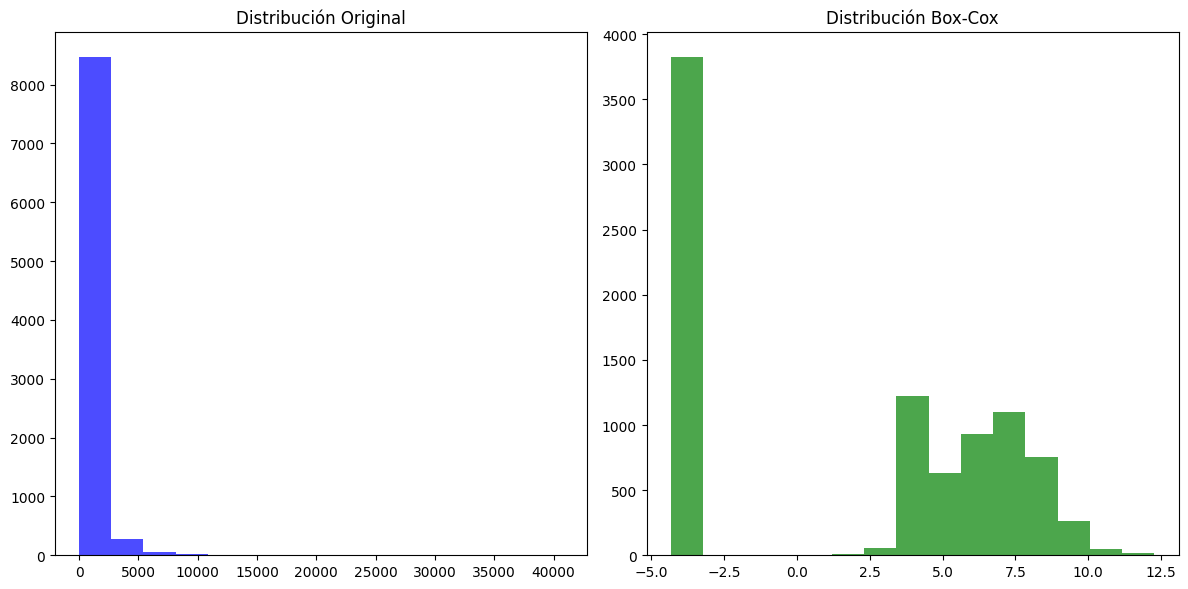

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_no_outliers1['ONEOFF_PURCHASES'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_no_outliers1['ONEOFF_PURCHASES_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

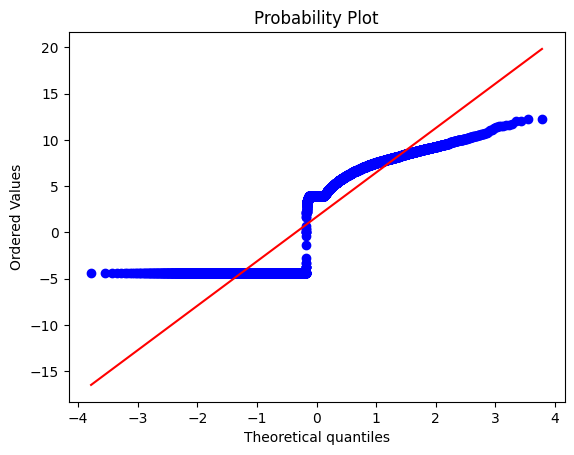

In [ ]:
stats.probplot(df_no_outliers1['ONEOFF_PURCHASES_boxcox'], dist="norm", plot=plt)
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "ONEOFF_PURCHASES_boxcox", esta NO se puede ajustar a una distribución normal. A continuación, se lo valida con la prueba normalidad "Anderson Darling".

In [ ]:
result = anderson(df_no_outliers1["ONEOFF_PURCHASES_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'ONEOFF_PURCHASES_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'ONEOFF_PURCHASES_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 861.053752383159
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'ONEOFF_PURCHASES_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

En conclusión, la columna "ONEOFF_PURCHASES_boxcox" no sigue una distribución normal. El método estadístico apropiado para detectar y eliminar valores atípicos seria empleando el método del rango intercuantil.

In [ ]:
var_name = "ONEOFF_PURCHASES_boxcox"
q1 = df_no_outliers1[var_name].quantile(0.25)
q3 = df_no_outliers1[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_no_outliers1[var_name] < low_fence) | (df_no_outliers1[var_name] > high_fence))
df_no_outliers2 = df_no_outliers1.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_no_outliers1.shape[0])
print("Filas luego:", df_no_outliers2.shape[0])

Filas antes: 8871
Filas luego: 8871


No se elimina ningun valor atípico

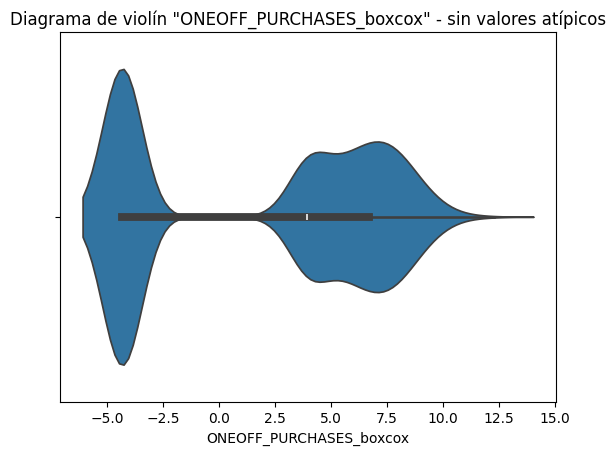

In [ ]:
sns.violinplot(x=df_no_outliers2["ONEOFF_PURCHASES_boxcox"])
plt.title(f'Diagrama de violín "ONEOFF_PURCHASES_boxcox" - sin valores atípicos')
plt.show()

**Identificación de valores atípicos para la columna "INSTALLMENTS_PURCHASES"**

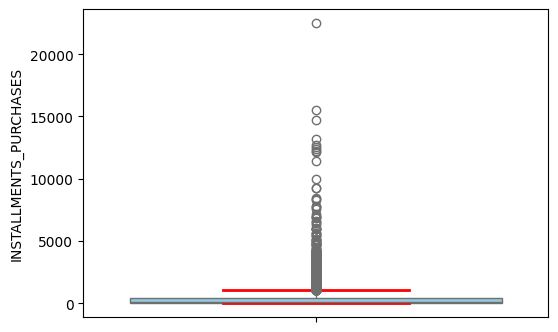

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_no_outliers2["INSTALLMENTS_PURCHASES"],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_no_outliers2["INSTALLMENTS_PURCHASES"].describe()

count     8871.000000
mean       378.474196
std        865.980270
min          0.000000
25%          0.000000
50%         88.080000
75%        416.870000
max      22500.000000
Name: INSTALLMENTS_PURCHASES, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 0 y 416. A continuación, se procederá a realizar una transformacion de la variable asimétrica "INSTALLMENTS_PURCHASES" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

In [ ]:

df_no_outliers2['INSTALLMENTS_PURCHASES_shifted'] = df_no_outliers2['INSTALLMENTS_PURCHASES'] + 0.01
df_no_outliers2['INSTALLMENTS_PURCHASES_boxcox'], fitted_lambda = stats.boxcox(df_no_outliers2['INSTALLMENTS_PURCHASES_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: 0.07426722108338052


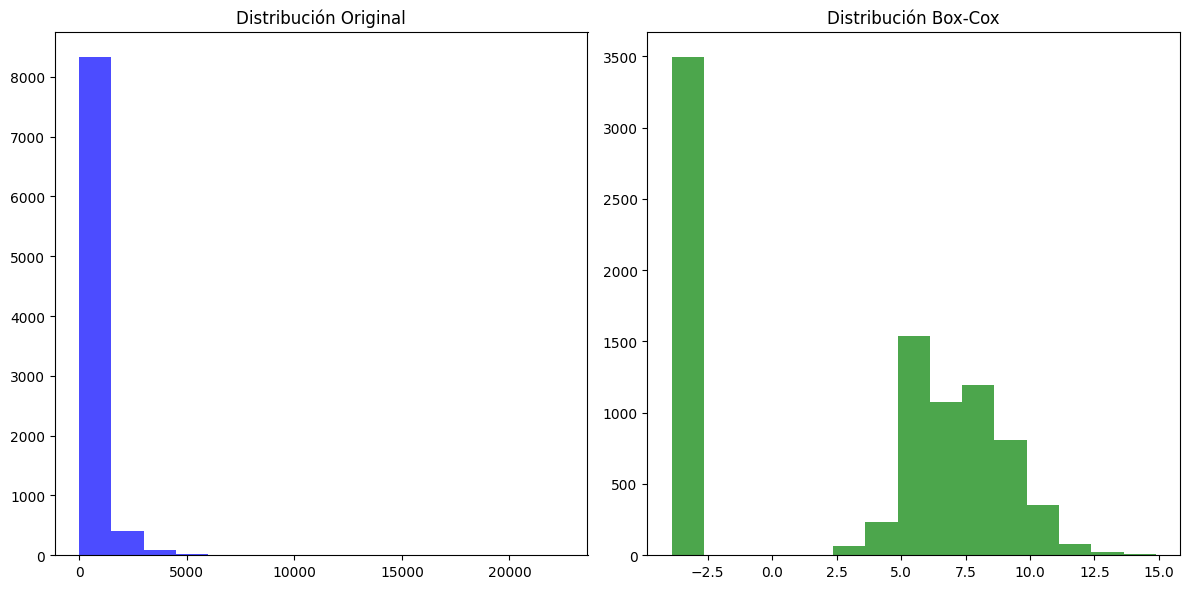

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_no_outliers2['INSTALLMENTS_PURCHASES'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_no_outliers2['INSTALLMENTS_PURCHASES_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

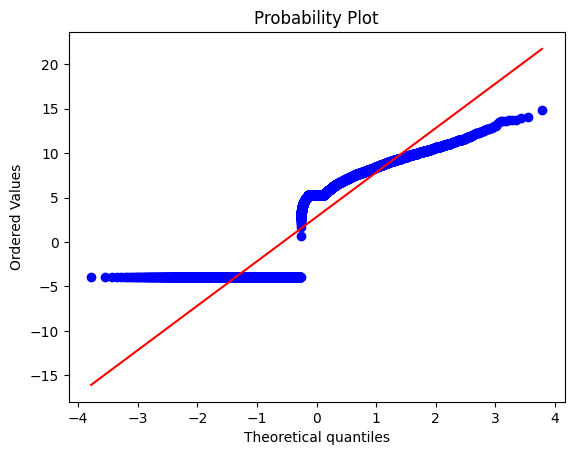

In [ ]:
stats.probplot(df_no_outliers2['INSTALLMENTS_PURCHASES_boxcox'], dist="norm", plot=plt)
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "INSTALLMENTS_PURCHASES_boxcox", esta NO se puede ajustar a una distribución normal.A continuación, se lo valida con la prueba normalidad "Anderson Darling".

In [ ]:
result = anderson(df_no_outliers2["INSTALLMENTS_PURCHASES_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'INSTALLMENTS_PURCHASES_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'INSTALLMENTS_PURCHASES_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 839.1302298907231
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'INSTALLMENTS_PURCHASES_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

En conclusión, la columna "INSTALLMENTS_PURCHASES_boxcox" no sigue una distribución normal. El método estadístico apropiado para detectar y eliminar valores atípicos seria empleando el método del rango intercuantil.

In [ ]:
var_name = "INSTALLMENTS_PURCHASES_boxcox"
q1 = df_no_outliers2[var_name].quantile(0.25)
q3 = df_no_outliers2[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_no_outliers2[var_name] < low_fence) | (df_no_outliers2[var_name] > high_fence))
df_no_outliers3 = df_no_outliers2.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_no_outliers2.shape[0])
print("Filas luego:", df_no_outliers3.shape[0])

Filas antes: 8871
Filas luego: 8871


No se elimina ningun valor atípico

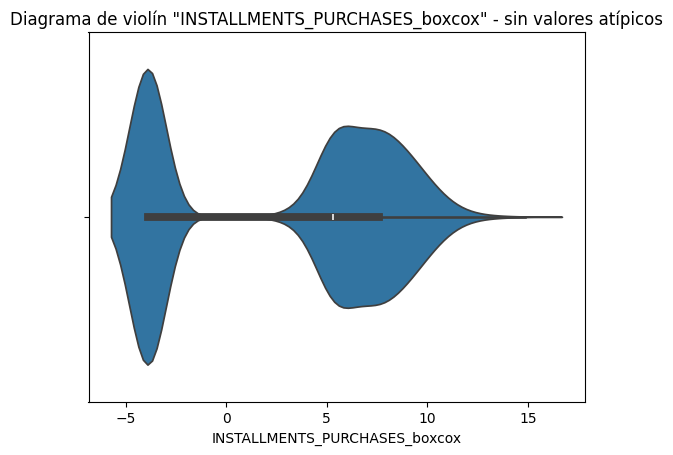

In [ ]:
sns.violinplot(x=df_no_outliers3["INSTALLMENTS_PURCHASES_boxcox"])
plt.title(f'Diagrama de violín "INSTALLMENTS_PURCHASES_boxcox" - sin valores atípicos')
plt.show()

**Identificación de valores atípicos para la columna "CASH_ADVANCE"**

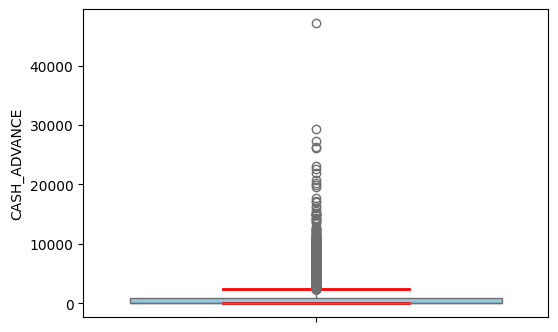

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_no_outliers3["CASH_ADVANCE"],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_no_outliers3["CASH_ADVANCE"].describe()

count     8871.000000
mean       884.924422
std       2036.676187
min          0.000000
25%          0.000000
50%          0.000000
75%        948.125879
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 0 y 949. A continuación, se procederá a realizar una transformacion de la variable asimétrica "CASH_ADVANCE" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

In [ ]:
df_no_outliers3['CASH_ADVANCE_shifted'] = df_no_outliers3['CASH_ADVANCE'] + 0.01
df_no_outliers3['CASH_ADVANCE_boxcox'], fitted_lambda = stats.boxcox(df_no_outliers3['CASH_ADVANCE_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: -0.07705790375648121


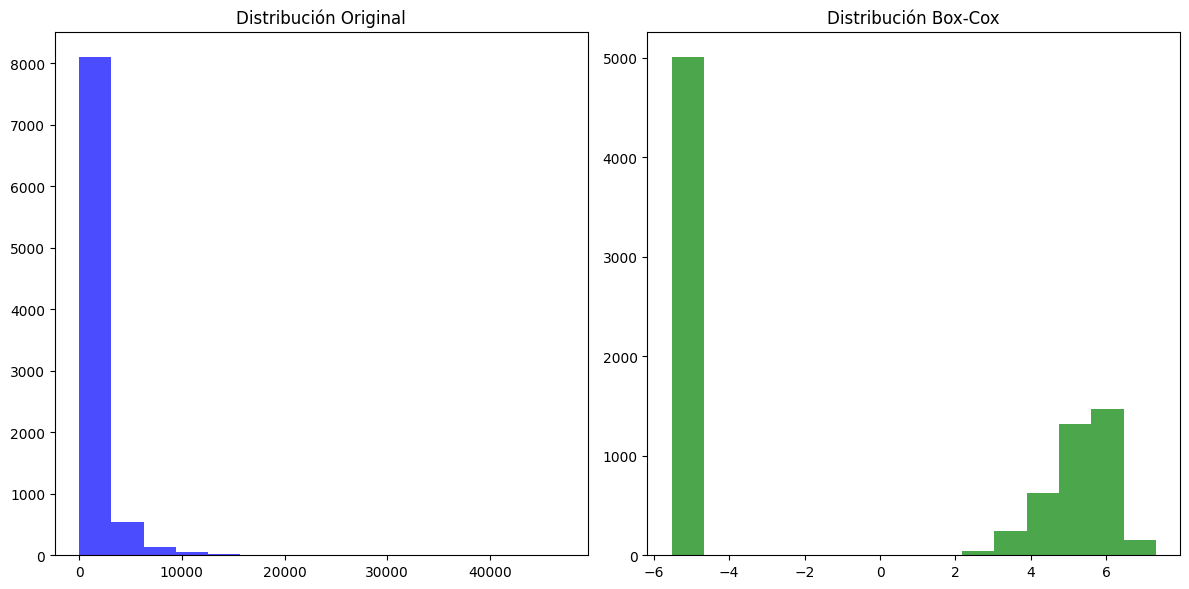

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_no_outliers3['CASH_ADVANCE'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_no_outliers3['CASH_ADVANCE_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

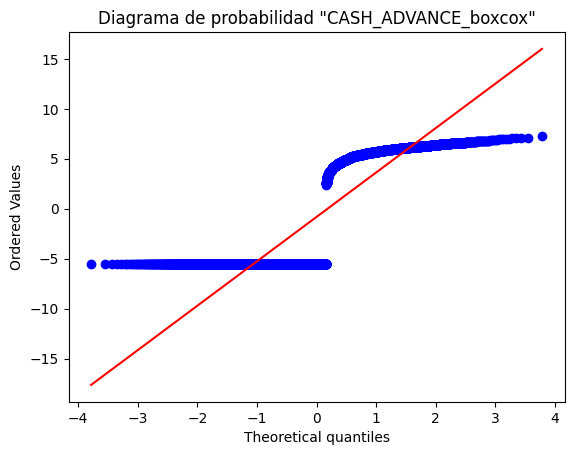

In [ ]:
stats.probplot(df_no_outliers3['CASH_ADVANCE_boxcox'], dist="norm", plot=plt)
plt.title(f'Diagrama de probabilidad "CASH_ADVANCE_boxcox"')
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "CASH_ADVANCE_boxcox", esta NO se puede ajustar a una distribución normal.A continuación, se lo valida con la prueba normalidad "Anderson Darling".

In [ ]:
result = anderson(df_no_outliers3["CASH_ADVANCE_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'CASH_ADVANCE_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'CASH_ADVANCE_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 1386.2175470535985
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'CASH_ADVANCE_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

In [ ]:
var_name = "CASH_ADVANCE_boxcox"
q1 = df_no_outliers3[var_name].quantile(0.25)
q3 = df_no_outliers3[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_no_outliers3[var_name] < low_fence) | (df_no_outliers3[var_name] > high_fence))
df_no_outliers4 = df_no_outliers3.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_no_outliers3.shape[0])
print("Filas luego:", df_no_outliers4.shape[0])

Filas antes: 8871
Filas luego: 8871


No se elimina ningun valor atípico

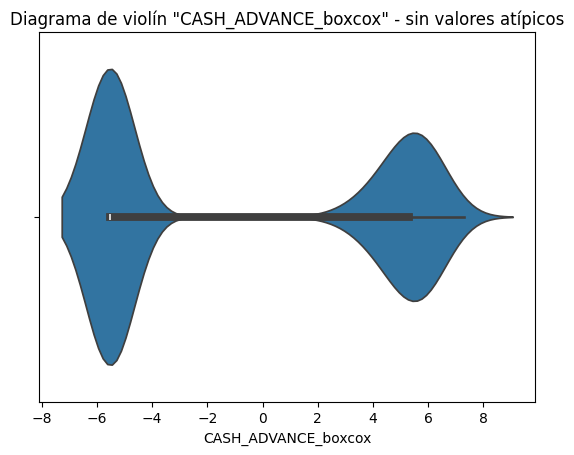

In [ ]:
sns.violinplot(x=df_no_outliers4["CASH_ADVANCE_boxcox"])
plt.title(f'Diagrama de violín "CASH_ADVANCE_boxcox" - sin valores atípicos')
plt.show()

**Identificación de valores atípicos para la columna "ONEOFF_PURCHASES_FREQUENCY"**

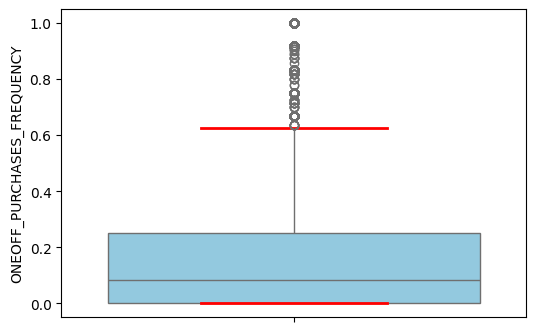

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_no_outliers4["ONEOFF_PURCHASES_FREQUENCY"],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_no_outliers4["ONEOFF_PURCHASES_FREQUENCY"].describe()

count    8871.000000
mean        0.189741
std         0.285010
min         0.000000
25%         0.000000
50%         0.083333
75%         0.250000
max         1.000000
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 0 y 0.25. A continuación, se procederá a realizar una transformacion de la variable asimétrica "ONEOFF_PURCHASES_FREQUENCY" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

In [ ]:
df_no_outliers4['ONEOFF_PURCHASES_FREQUENCY_shifted'] = df_no_outliers4['ONEOFF_PURCHASES_FREQUENCY'] + 0.01
df_no_outliers4['ONEOFF_PURCHASES_FREQUENCY_boxcox'], fitted_lambda = stats.boxcox(df_no_outliers4['ONEOFF_PURCHASES_FREQUENCY_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: -0.0943897255300503


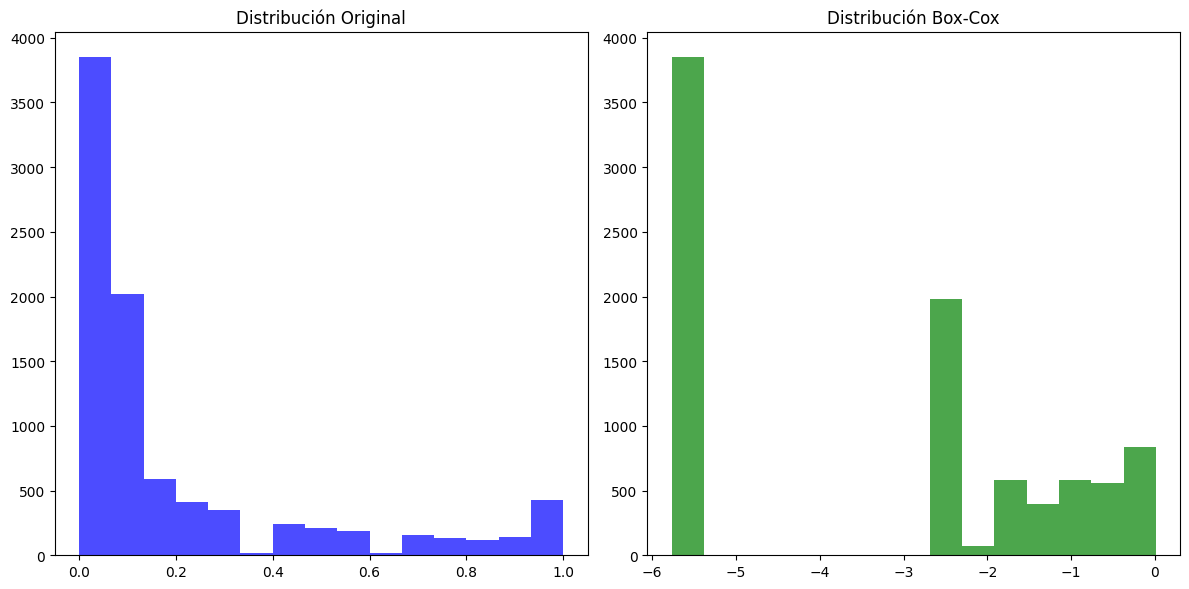

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_no_outliers4['ONEOFF_PURCHASES_FREQUENCY'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_no_outliers4['ONEOFF_PURCHASES_FREQUENCY_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

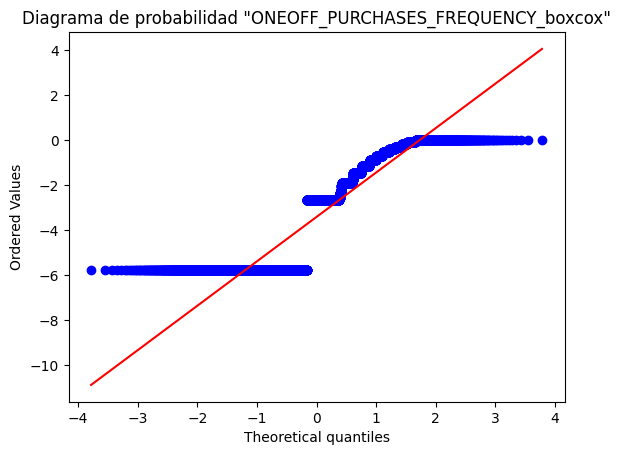

In [ ]:
stats.probplot(df_no_outliers4['ONEOFF_PURCHASES_FREQUENCY_boxcox'], dist="norm", plot=plt)
plt.title(f'Diagrama de probabilidad "ONEOFF_PURCHASES_FREQUENCY_boxcox"')
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "ONEOFF_PURCHASES_FREQUENCY_boxcox", esta NO se puede ajustar a una distribución normal.A continuación, se lo valida con la prueba normalidad "Anderson Darling".

In [ ]:
result = anderson(df_no_outliers4["ONEOFF_PURCHASES_FREQUENCY_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'ONEOFF_PURCHASES_FREQUENCY_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'ONEOFF_PURCHASES_FREQUENCY_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 715.0275160263336
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'ONEOFF_PURCHASES_FREQUENCY_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

In [ ]:
var_name = "ONEOFF_PURCHASES_FREQUENCY_boxcox"
q1 = df_no_outliers4[var_name].quantile(0.25)
q3 = df_no_outliers4[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_no_outliers4[var_name] < low_fence) | (df_no_outliers4[var_name] > high_fence))
df_no_outliers5 = df_no_outliers4.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_no_outliers4.shape[0])
print("Filas luego:", df_no_outliers5.shape[0])

Filas antes: 8871
Filas luego: 8871


No se elimina ningun valor atípico

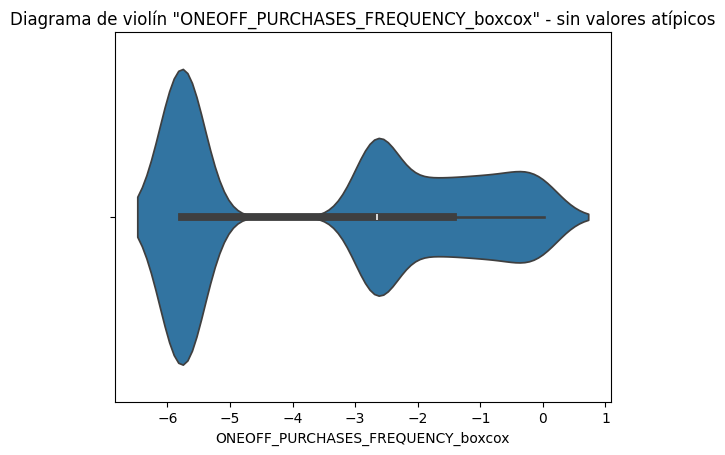

In [ ]:
sns.violinplot(x=df_no_outliers5["ONEOFF_PURCHASES_FREQUENCY_boxcox"])
plt.title(f'Diagrama de violín "ONEOFF_PURCHASES_FREQUENCY_boxcox" - sin valores atípicos')
plt.show()

**Identificación de valores atípicos para la columna "CASH_ADVANCE_FREQUENCY"**

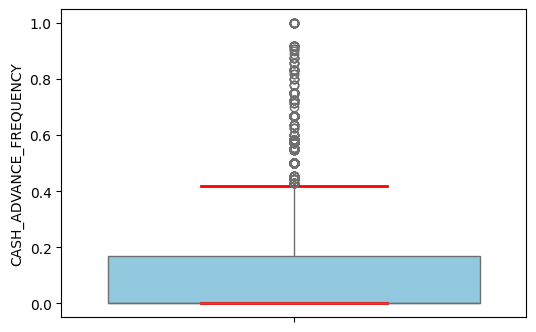

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_no_outliers5["CASH_ADVANCE_FREQUENCY"],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_no_outliers5["CASH_ADVANCE_FREQUENCY"].describe()

count    8871.000000
mean        0.120672
std         0.191753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.166667
max         1.000000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 0 y 0.17. A continuación, se procederá a realizar una transformacion de la variable asimétrica "CASH_ADVANCE_FREQUENCY" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

In [ ]:
df_no_outliers5['CASH_ADVANCE_FREQUENCY_shifted'] = df_no_outliers5['CASH_ADVANCE_FREQUENCY'] + 0.01
df_no_outliers5['CASH_ADVANCE_FREQUENCY_boxcox'], fitted_lambda = stats.boxcox(df_no_outliers5['CASH_ADVANCE_FREQUENCY_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: -0.3368163428644548


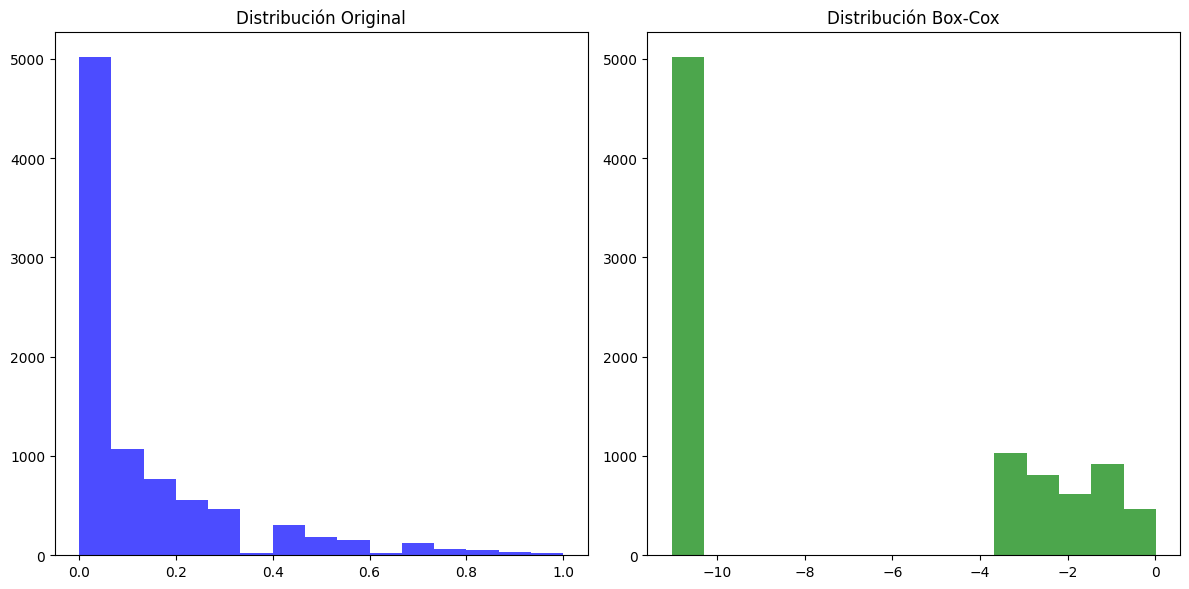

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_no_outliers5['CASH_ADVANCE_FREQUENCY'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_no_outliers5['CASH_ADVANCE_FREQUENCY_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

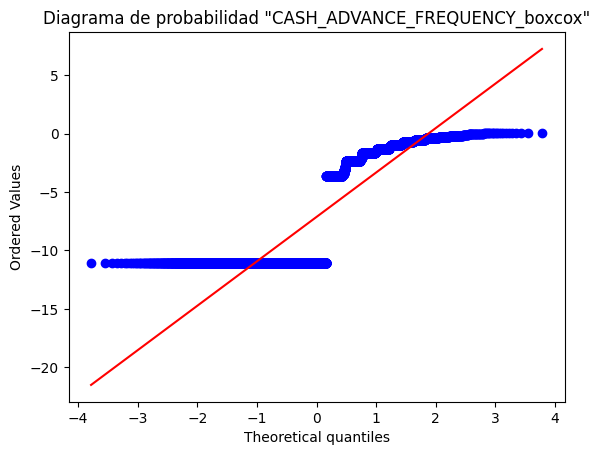

In [ ]:
stats.probplot(df_no_outliers5['CASH_ADVANCE_FREQUENCY_boxcox'], dist="norm", plot=plt)
plt.title(f'Diagrama de probabilidad "CASH_ADVANCE_FREQUENCY_boxcox"')
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "CASH_ADVANCE_FREQUENCY_boxcox", esta NO se puede ajustar a una distribución normal.A continuación, se lo valida con la prueba normalidad "Anderson Darling".

In [ ]:
result = anderson(df_no_outliers5["CASH_ADVANCE_FREQUENCY_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'CASH_ADVANCE_FREQUENCY_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'CASH_ADVANCE_FREQUENCY_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 1254.2427176959936
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'CASH_ADVANCE_FREQUENCY_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

In [ ]:
var_name = "CASH_ADVANCE_FREQUENCY_boxcox"
q1 = df_no_outliers5[var_name].quantile(0.25)
q3 = df_no_outliers5[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_no_outliers5[var_name] < low_fence) | (df_no_outliers5[var_name] > high_fence))
df_no_outliers6 = df_no_outliers5.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_no_outliers5.shape[0])
print("Filas luego:", df_no_outliers6.shape[0])

Filas antes: 8871
Filas luego: 8871


No se elimina nigun valor atípico

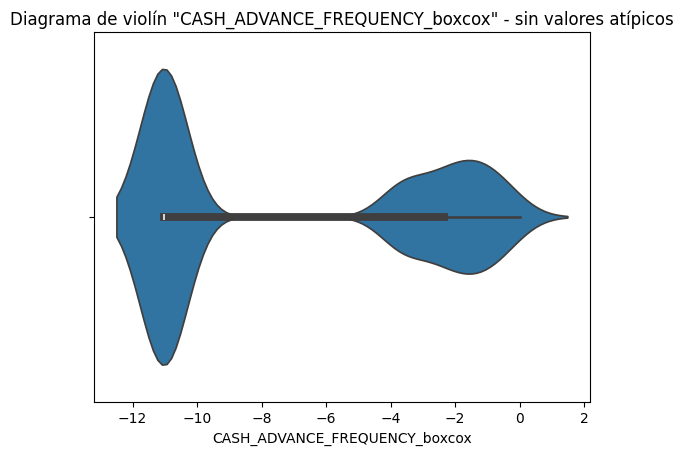

In [ ]:
sns.violinplot(x=df_no_outliers6["CASH_ADVANCE_FREQUENCY_boxcox"])
plt.title(f'Diagrama de violín "CASH_ADVANCE_FREQUENCY_boxcox" - sin valores atípicos')
plt.show()

**Identificación de valores atípicos para la columna "CASH_ADVANCE_TRX"**

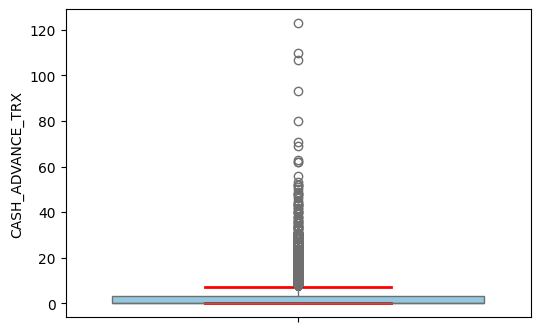

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_no_outliers6["CASH_ADVANCE_TRX"],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_no_outliers6["CASH_ADVANCE_TRX"].describe()

count    8871.000000
mean        2.865742
std         6.301403
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max       123.000000
Name: CASH_ADVANCE_TRX, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 0 y 3. A continuación, se procederá a realizar una transformacion de la variable asimétrica "CASH_ADVANCE_FREQUENCY" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

In [ ]:
df_no_outliers6['CASH_ADVANCE_TRX_shifted'] = df_no_outliers6['CASH_ADVANCE_TRX'] + 0.01
df_no_outliers6['CASH_ADVANCE_TRX_boxcox'], fitted_lambda = stats.boxcox(df_no_outliers6['CASH_ADVANCE_TRX_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: -0.16443127841004848


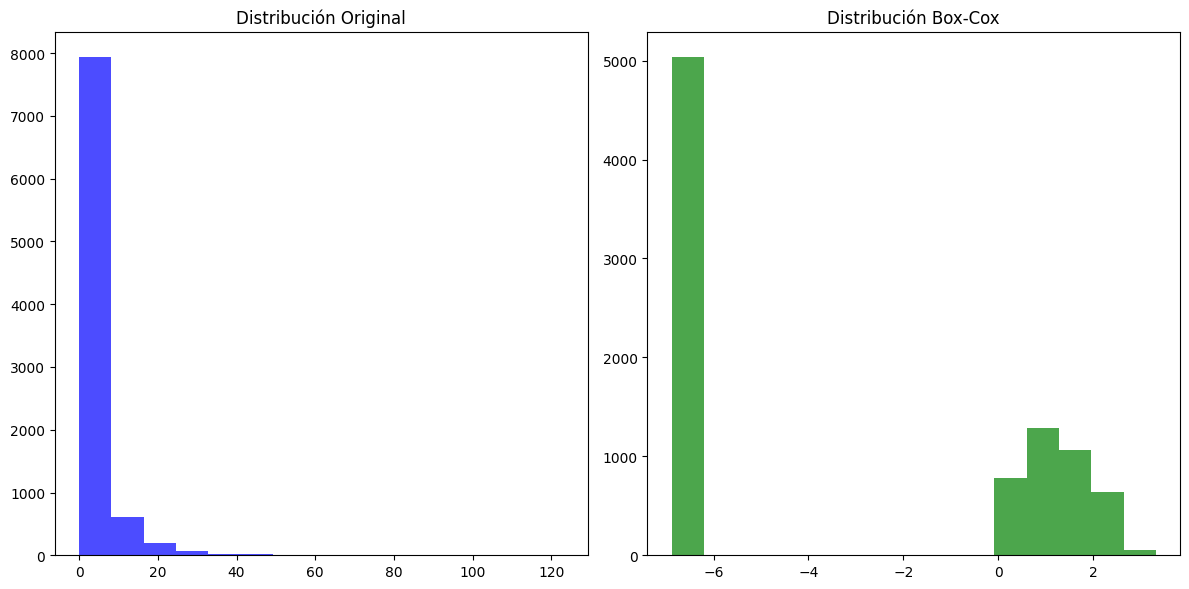

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_no_outliers6['CASH_ADVANCE_TRX'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_no_outliers6['CASH_ADVANCE_TRX_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

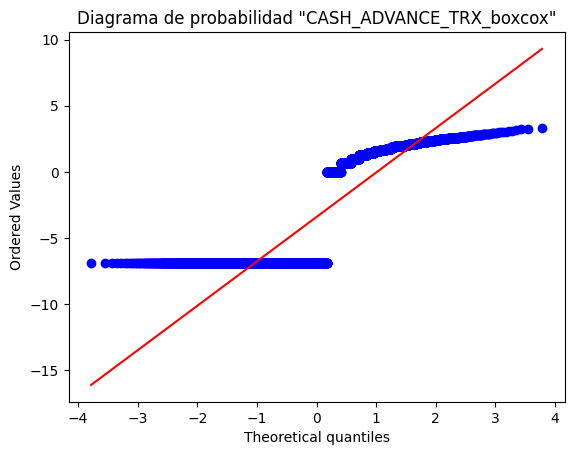

In [ ]:
stats.probplot(df_no_outliers6['CASH_ADVANCE_TRX_boxcox'], dist="norm", plot=plt)
plt.title(f'Diagrama de probabilidad "CASH_ADVANCE_TRX_boxcox"')
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "CASH_ADVANCE_TRX_boxcox", esta NO se puede ajustar a una distribución normal.A continuación, se lo valida con la prueba normalidad "Anderson Darling".

In [ ]:
result = anderson(df_no_outliers6["CASH_ADVANCE_TRX_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'CASH_ADVANCE_TRX_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'CASH_ADVANCE_TRX_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 1326.2071786676934
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'CASH_ADVANCE_TRX_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

In [ ]:
var_name = "CASH_ADVANCE_TRX_boxcox"
q1 = df_no_outliers6[var_name].quantile(0.25)
q3 = df_no_outliers6[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_no_outliers6[var_name] < low_fence) | (df_no_outliers6[var_name] > high_fence))
df_no_outliers7 = df_no_outliers6.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_no_outliers6.shape[0])
print("Filas luego:", df_no_outliers7.shape[0])

Filas antes: 8871
Filas luego: 8871


No se eilimina ninguna valor atípico

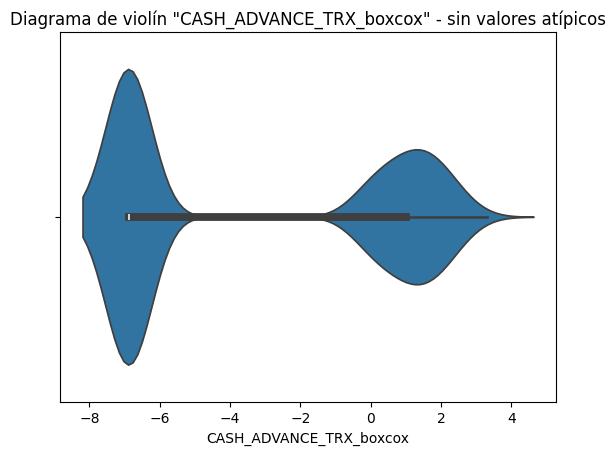

In [ ]:
sns.violinplot(x=df_no_outliers7["CASH_ADVANCE_TRX_boxcox"])
plt.title(f'Diagrama de violín "CASH_ADVANCE_TRX_boxcox" - sin valores atípicos')
plt.show()

**Identificación de valores atípicos para la columna "PURCHASES_TRX"**

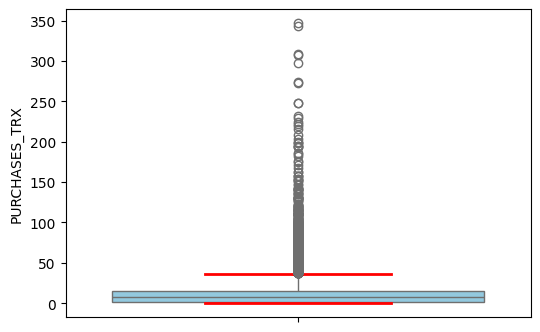

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_no_outliers7["PURCHASES_TRX"],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_no_outliers7["PURCHASES_TRX"].describe()

count    8871.000000
mean       13.948258
std        23.514872
min         0.000000
25%         1.000000
50%         7.000000
75%        15.000000
max       347.000000
Name: PURCHASES_TRX, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 1 y 15. A continuación, se procederá a realizar una transformacion de la variable asimétrica "PURCHASES_TRX" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

In [ ]:
df_no_outliers7['PURCHASES_TRX_shifted'] = df_no_outliers7['PURCHASES_TRX'] + 0.01
df_no_outliers7['PURCHASES_TRX_boxcox'], fitted_lambda = stats.boxcox(df_no_outliers7['PURCHASES_TRX_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: 0.2250384622888454


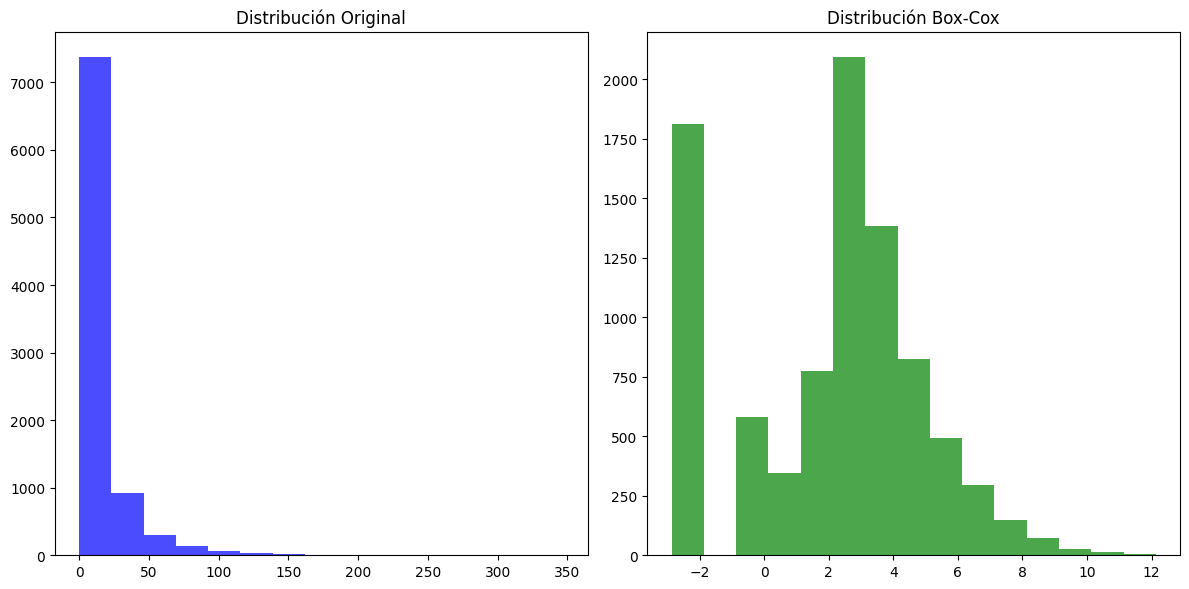

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_no_outliers7['PURCHASES_TRX'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_no_outliers7['PURCHASES_TRX_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

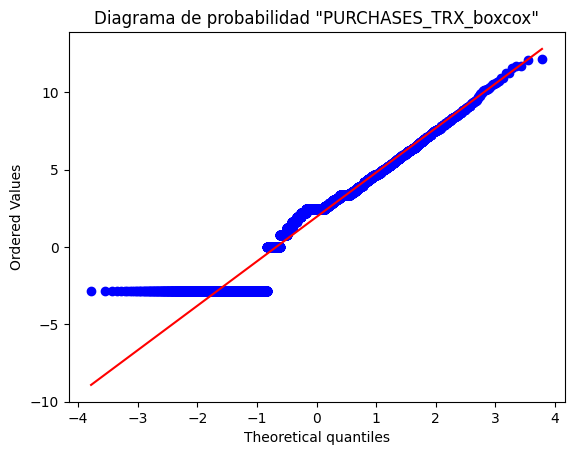

In [ ]:
stats.probplot(df_no_outliers7['PURCHASES_TRX_boxcox'], dist="norm", plot=plt)
plt.title(f'Diagrama de probabilidad "PURCHASES_TRX_boxcox"')
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "PURCHASES_TRX_boxcox", esta NO se puede ajustar a una distribución normal.A continuación, se lo valida con la prueba normalidad "Anderson Darling".

In [ ]:
result = anderson(df_no_outliers7["PURCHASES_TRX_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'PURCHASES_TRX_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'PURCHASES_TRX_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 247.66225427489007
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'PURCHASES_TRX_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

In [ ]:
var_name = "PURCHASES_TRX_boxcox"
q1 = df_no_outliers7[var_name].quantile(0.25)
q3 = df_no_outliers7[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_no_outliers7[var_name] < low_fence) | (df_no_outliers7[var_name] > high_fence))
df_no_outliers8 = df_no_outliers7.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_no_outliers7.shape[0])
print("Filas luego:", df_no_outliers8.shape[0])

Filas antes: 8871
Filas luego: 8832


Se eliminaron 39 valores atípicos

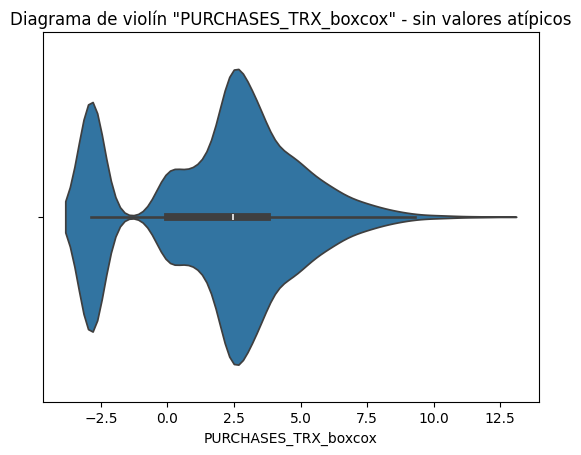

In [ ]:
sns.violinplot(x=df_no_outliers8["PURCHASES_TRX_boxcox"])
plt.title(f'Diagrama de violín "PURCHASES_TRX_boxcox" - sin valores atípicos')
plt.show()

**Identificación de valores atípicos para la columna "CREDIT_LIMIT"**

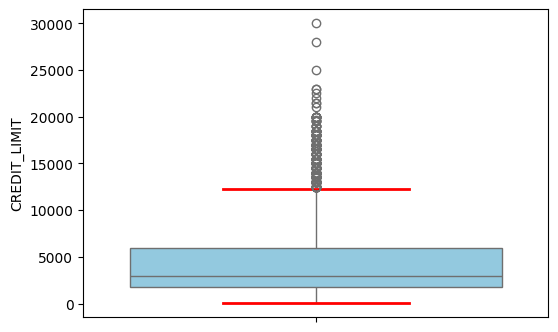

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_no_outliers8["CREDIT_LIMIT"],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_no_outliers8["CREDIT_LIMIT"].describe()

count     8832.000000
mean      4314.753268
std       3455.724794
min         50.000000
25%       1800.000000
50%       3000.000000
75%       6000.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 1800 y 6000. A continuación, se procederá a realizar una transformacion de la variable asimétrica "CREDIT_LIMIT" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

In [ ]:
df_no_outliers8['CREDIT_LIMIT_shifted'] = df_no_outliers8['CREDIT_LIMIT'] + 0.01
df_no_outliers8['CREDIT_LIMIT_boxcox'], fitted_lambda = stats.boxcox(df_no_outliers8['CREDIT_LIMIT_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: 0.03483418771360066


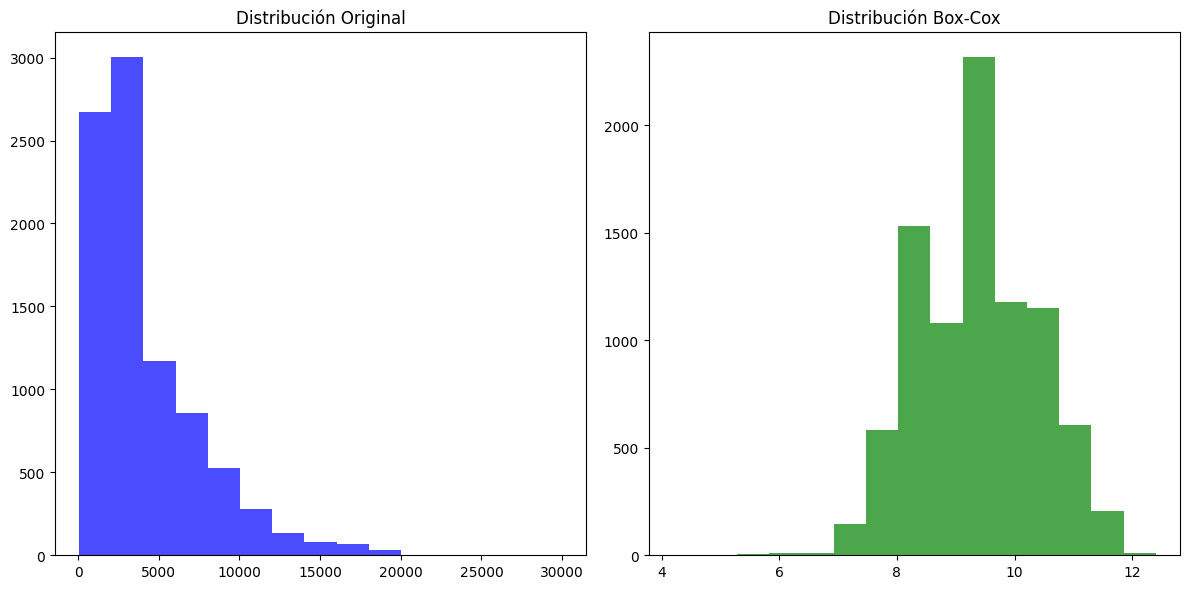

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_no_outliers8['CREDIT_LIMIT'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_no_outliers8['CREDIT_LIMIT_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

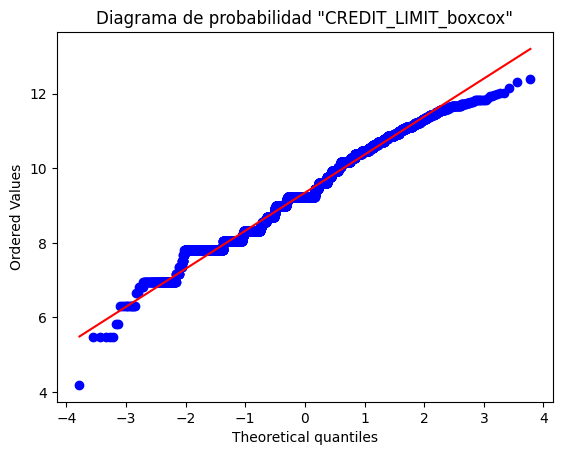

In [ ]:
stats.probplot(df_no_outliers8['CREDIT_LIMIT_boxcox'], dist="norm", plot=plt)
plt.title(f'Diagrama de probabilidad "CREDIT_LIMIT_boxcox"')
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "CREDIT_LIMIT_boxcox", esta NO se puede ajustar a una distribución normal.A continuación, se lo valida con la prueba normalidad "Anderson Darling".

In [ ]:
result = anderson(df_no_outliers8["CREDIT_LIMIT_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'CREDIT_LIMIT_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'CREDIT_LIMIT_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 51.65269663803883
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'CREDIT_LIMIT_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

In [ ]:
var_name = "CREDIT_LIMIT_boxcox"
q1 = df_no_outliers8[var_name].quantile(0.25)
q3 = df_no_outliers8[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_no_outliers8[var_name] < low_fence) | (df_no_outliers8[var_name] > high_fence))
df_no_outliers9 = df_no_outliers8.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_no_outliers8.shape[0])
print("Filas luego:", df_no_outliers9.shape[0])

Filas antes: 8832
Filas luego: 8824


Se eliminaron 8 valores atípicos

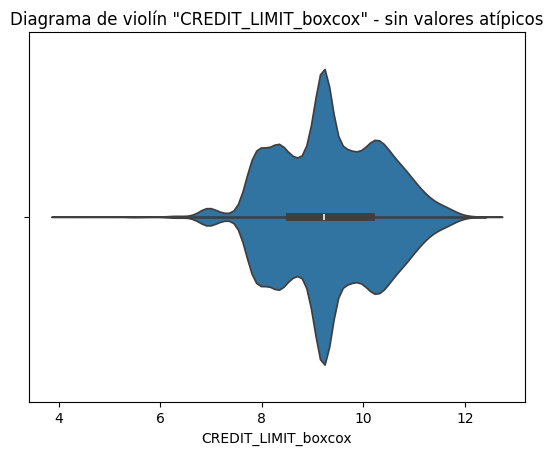

In [ ]:
sns.violinplot(x=df_no_outliers9["CREDIT_LIMIT_boxcox"])
plt.title(f'Diagrama de violín "CREDIT_LIMIT_boxcox" - sin valores atípicos')
plt.show()

**Identificación de valores atípicos para la columna "PAYMENTS"**

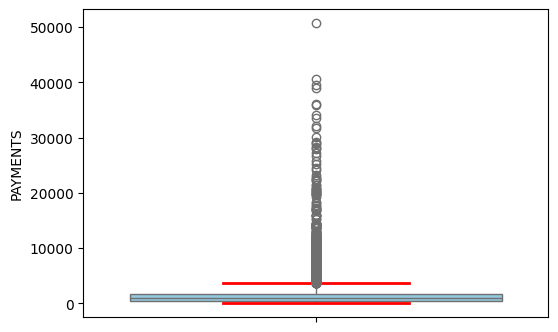

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_no_outliers9["PAYMENTS"],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_no_outliers9["PAYMENTS"].describe()

count     8824.000000
mean      1640.521393
std       2735.151632
min          0.000000
25%        423.084085
50%        858.529920
75%       1719.599677
max      50721.483360
Name: PAYMENTS, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 426 y 1712. A continuación, se procederá a realizar una transformacion de la variable asimétrica "PAYMENTS" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

In [ ]:
df_no_outliers9['PAYMENTS_shifted'] = df_no_outliers9['PAYMENTS'] + 0.01
df_no_outliers9['PAYMENTS_boxcox'], fitted_lambda = stats.boxcox(df_no_outliers9['PAYMENTS_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: 0.24401990662730885


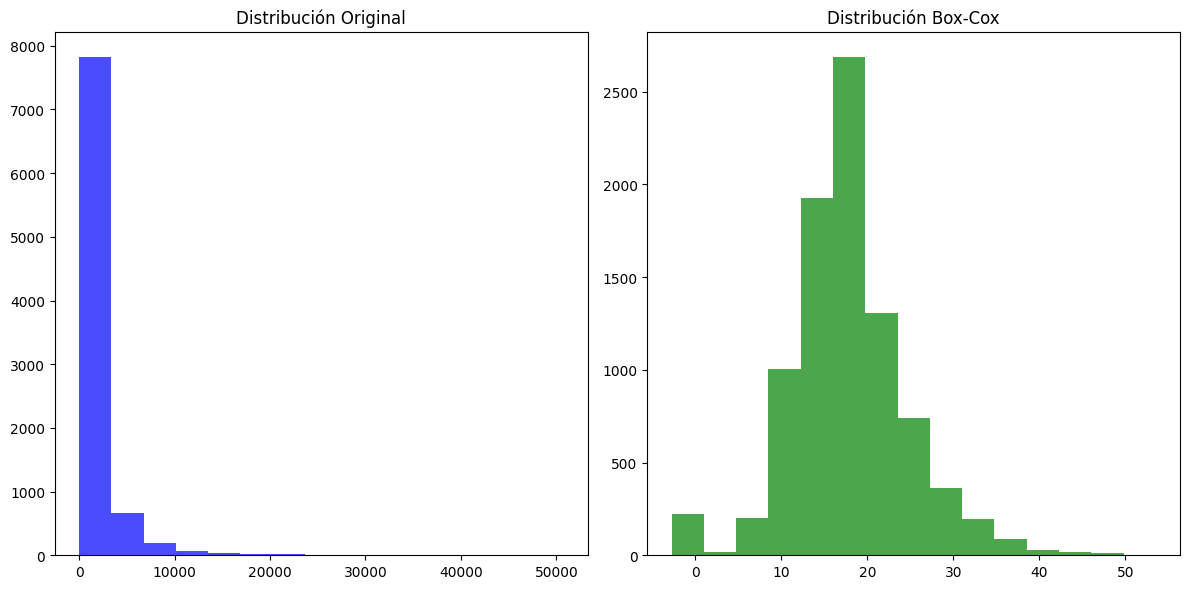

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_no_outliers9['PAYMENTS'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_no_outliers9['PAYMENTS_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

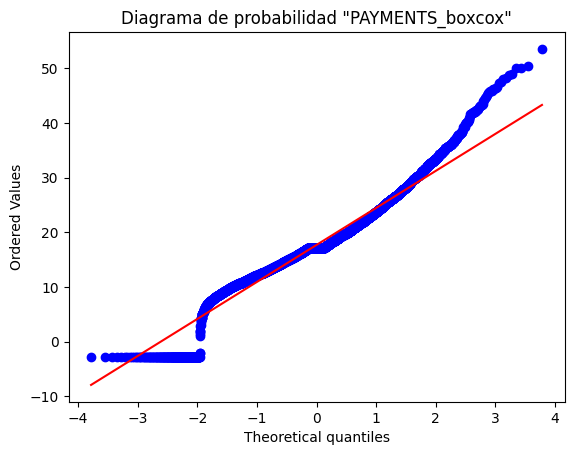

In [ ]:
stats.probplot(df_no_outliers9['PAYMENTS_boxcox'], dist="norm", plot=plt)
plt.title(f'Diagrama de probabilidad "PAYMENTS_boxcox"')
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "PAYMENTS_boxcox", esta NO se puede ajustar a una distribución normal.A continuación, se lo valida con la prueba normalidad "Anderson Darling"

In [ ]:
result = anderson(df_no_outliers9["PAYMENTS_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'PAYMENTS_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'PAYMENTS_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 109.27405887797795
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.092
La variable 'PAYMENTS_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.092])

In [ ]:
var_name = "PAYMENTS_boxcox"
q1 = df_no_outliers9[var_name].quantile(0.25)
q3 = df_no_outliers9[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_no_outliers9[var_name] < low_fence) | (df_no_outliers9[var_name] > high_fence))
df_no_outliers9.reset_index(drop=True, inplace=True)
df_no_outliers10 = df_no_outliers9.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_no_outliers9.shape[0])
print("Filas luego:", df_no_outliers10.shape[0])

Filas antes: 8824
Filas luego: 8316


Se eliminaron 510 valores atípicos

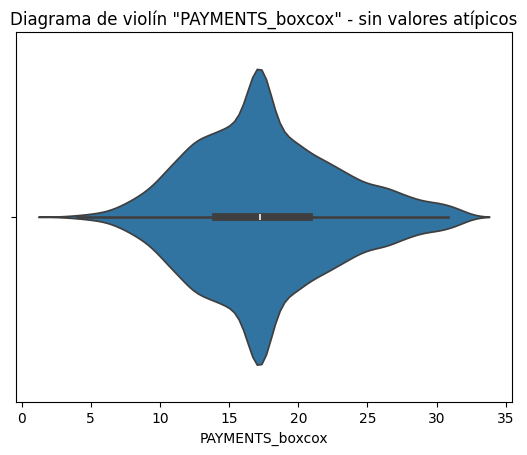

In [ ]:
sns.violinplot(x=df_no_outliers10["PAYMENTS_boxcox"])
plt.title(f'Diagrama de violín "PAYMENTS_boxcox" - sin valores atípicos')
plt.show()

**Identificación de valores atípicos para la columna "PRC_FULL_PAYMENT"**

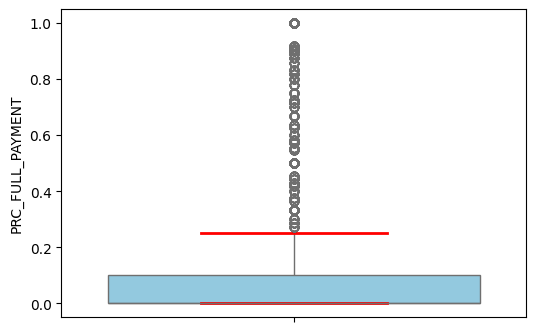

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_no_outliers10["PRC_FULL_PAYMENT"],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_no_outliers10["PRC_FULL_PAYMENT"].describe()

count    8316.000000
mean        0.141928
std         0.285392
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max         1.000000
Name: PRC_FULL_PAYMENT, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 0 y 0.1. A continuación, se procederá a realizar una transformacion de la variable asimétrica "PRC_FULL_PAYMENT" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

In [ ]:
df_no_outliers10['PRC_FULL_PAYMENT_shifted'] = df_no_outliers10['PRC_FULL_PAYMENT'] + 0.01
df_no_outliers10['PRC_FULL_PAYMENT_boxcox'], fitted_lambda = stats.boxcox(df_no_outliers10['PRC_FULL_PAYMENT_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: -0.7156008222274435


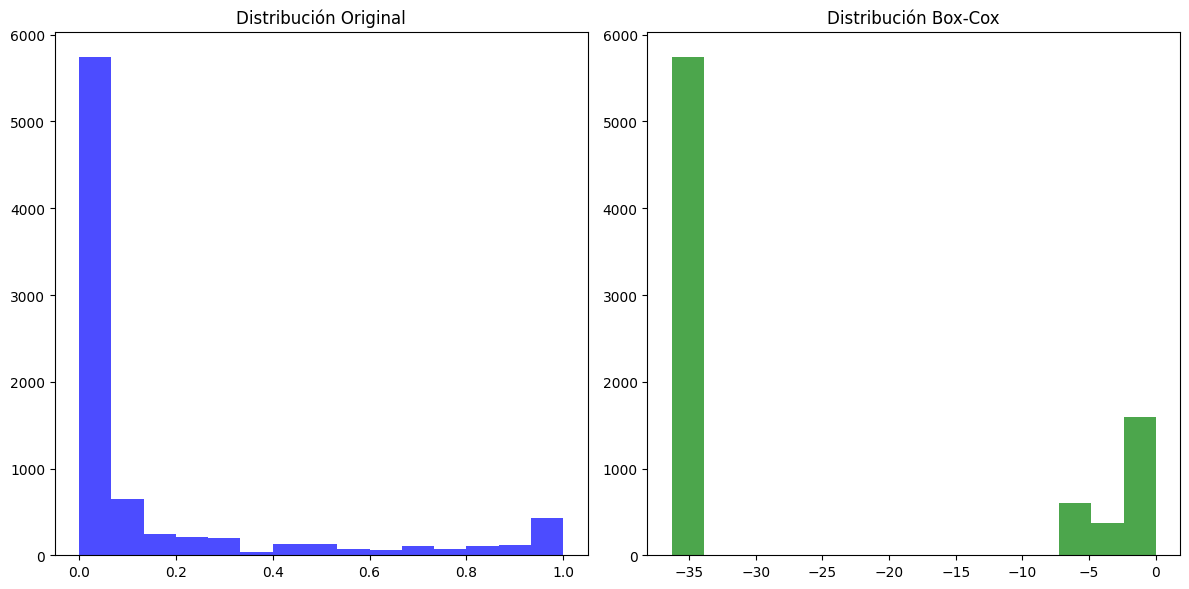

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_no_outliers10['PRC_FULL_PAYMENT'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_no_outliers10['PRC_FULL_PAYMENT_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

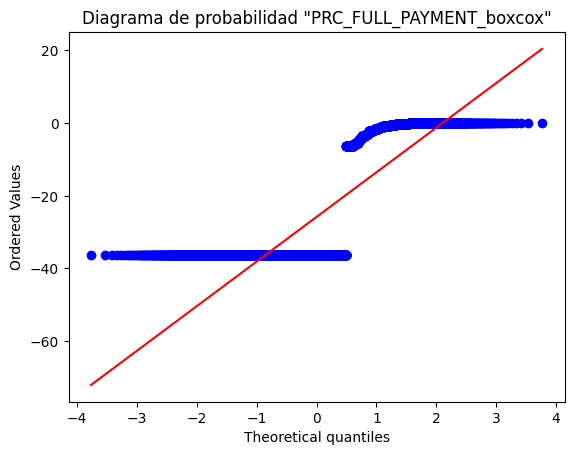

In [ ]:
stats.probplot(df_no_outliers10['PRC_FULL_PAYMENT_boxcox'], dist="norm", plot=plt)
plt.title(f'Diagrama de probabilidad "PRC_FULL_PAYMENT_boxcox"')
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "PRC_FULL_PAYMENT_boxcox", esta NO se puede ajustar a una distribución normal.A continuación, se lo valida con la prueba normalidad "Anderson Darling"

In [ ]:
result = anderson(df_no_outliers10["PRC_FULL_PAYMENT_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'PRC_FULL_PAYMENT_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'PRC_FULL_PAYMENT_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 1665.3969443024343
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.091
La variable 'PRC_FULL_PAYMENT_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.091])

In [ ]:
var_name = "PRC_FULL_PAYMENT_boxcox"
q1 = df_no_outliers10[var_name].quantile(0.25)
q3 = df_no_outliers10[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_no_outliers10[var_name] < low_fence) | (df_no_outliers10[var_name] > high_fence))
df_no_outliers10.reset_index(drop=True, inplace=True)
df_no_outliers11 = df_no_outliers10.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_no_outliers10.shape[0])
print("Filas luego:", df_no_outliers11.shape[0])

Filas antes: 8316
Filas luego: 8316


No se eilimina ningun valor atípico

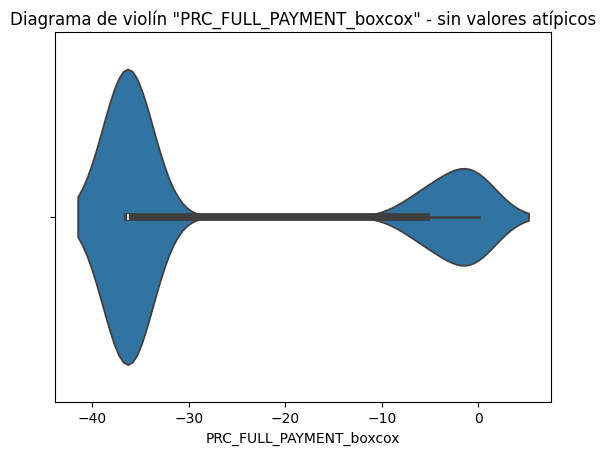

In [ ]:
sns.violinplot(x=df_no_outliers11["PRC_FULL_PAYMENT_boxcox"])
plt.title(f'Diagrama de violín "PRC_FULL_PAYMENT_boxcox" - sin valores atípicos')
plt.show()

**Identificación de valores atípicos para la columna "BALANCE_FREQUENCY"**

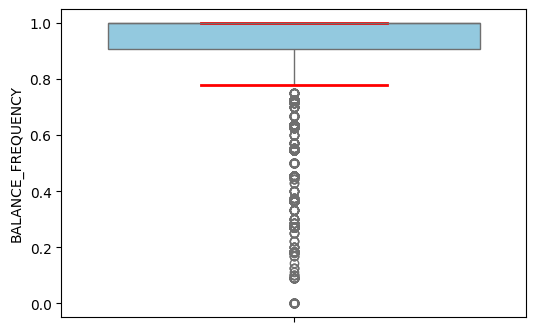

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(df_no_outliers11["BALANCE_FREQUENCY"],ax=ax, color="skyblue")
for i, line in enumerate(ax.lines):
    if i % 6 == 2 or i % 6 == 3:
        line.set_color('red')
        line.set_linewidth(2)

In [ ]:
df_no_outliers11["BALANCE_FREQUENCY"].describe()

count    8316.000000
mean        0.899342
std         0.211381
min         0.000000
25%         0.909091
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

Segun el boxplot, la variable si tiene valores atípicos Y la concentración de sus datos se encuentra entre 0.0 y 1. A continuación, se procederá a realizar una transformacion de la variable asimétrica "BALANCE_FREQUENCY" para ajustarlo a una distribución NORMAL, utilizando la transformación de Box Cox

In [ ]:
df_no_outliers11['BALANCE_FREQUENCY_shifted'] = df_no_outliers11['BALANCE_FREQUENCY'] + 0.01
df_no_outliers11['BALANCE_FREQUENCY_boxcox'], fitted_lambda = stats.boxcox(df_no_outliers11['BALANCE_FREQUENCY_shifted'])
print(f"Valor de lambda utilizado: {fitted_lambda}")

Valor de lambda utilizado: 4.816172761050496


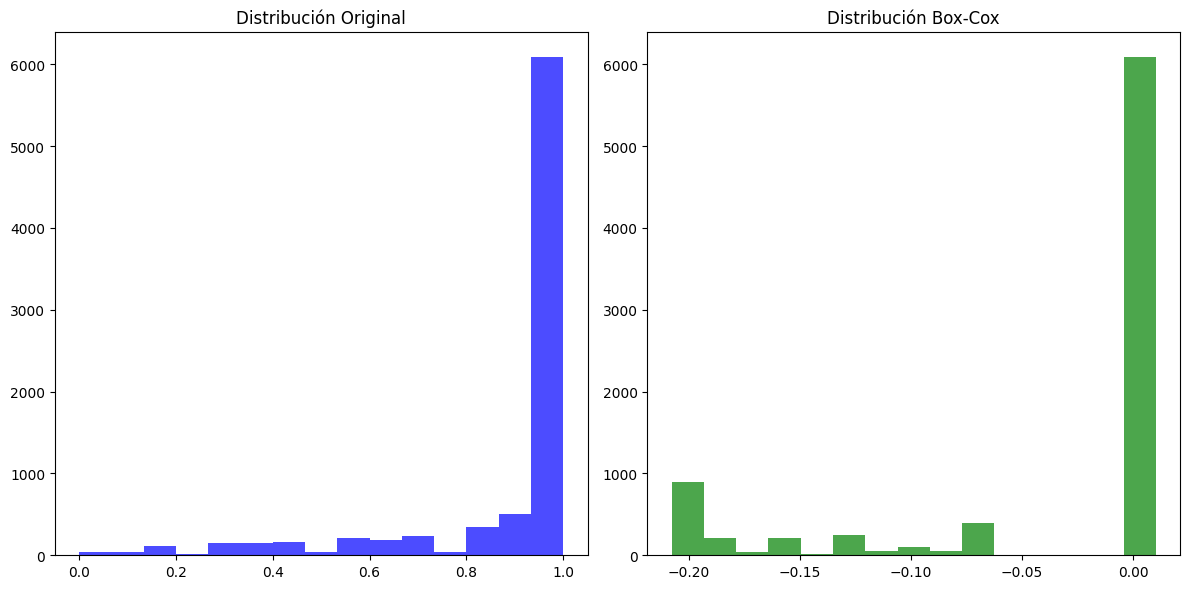

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de la variable original (con ceros)
axes[0].hist(df_no_outliers11['BALANCE_FREQUENCY'], bins=15, color='blue', alpha=0.7)
axes[0].set_title('Distribución Original')

# Histograma de la variable transformada (Box-Cox)
axes[1].hist(df_no_outliers11['BALANCE_FREQUENCY_boxcox'], bins=15, color='green', alpha=0.7)
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

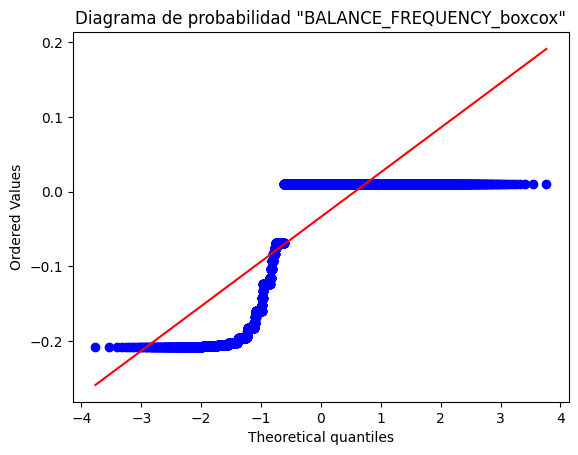

In [ ]:
stats.probplot(df_no_outliers11['BALANCE_FREQUENCY_boxcox'], dist="norm", plot=plt)
plt.title(f'Diagrama de probabilidad "BALANCE_FREQUENCY_boxcox"')
plt.show()

Segun el histograma y el diagrama de probabilidad para la variable "BALANCE_FREQUENCY_boxcox", esta NO se puede ajustar a una distribución normal.A continuación, se lo valida con la prueba normalidad "Anderson Darling"

In [ ]:
result = anderson(df_no_outliers11["BALANCE_FREQUENCY_boxcox"])
print(f"Estadístico: {result.statistic}")
for i in range(len(result.critical_values)):
    print(f"Nivel de significancia {result.significance_level[i]}%: Valor crítico {result.critical_values[i]}")
if result.statistic < result.critical_values[2]:
    print("La variable 'BALANCE_FREQUENCY_boxcox' parece seguir una distribución normal (no se rechaza H0).")
else:
    print("La variable 'BALANCE_FREQUENCY_boxcox' no sigue una distribución normal (se rechaza H0).")
result.critical_values

Estadístico: 1657.5464082996823
Nivel de significancia 15.0%: Valor crítico 0.576
Nivel de significancia 10.0%: Valor crítico 0.656
Nivel de significancia 5.0%: Valor crítico 0.787
Nivel de significancia 2.5%: Valor crítico 0.918
Nivel de significancia 1.0%: Valor crítico 1.091
La variable 'BALANCE_FREQUENCY_boxcox' no sigue una distribución normal (se rechaza H0).


array([0.576, 0.656, 0.787, 0.918, 1.091])

In [ ]:
var_name = "BALANCE_FREQUENCY_boxcox"
q1 = df_no_outliers11[var_name].quantile(0.25)
q3 = df_no_outliers11[var_name].quantile(0.75)
iqr = q3 - q1
low_fence = q1 - 1.5 * iqr
high_fence = q3 + 1.5 * iqr
outlier_indices = np.where((df_no_outliers11[var_name] < low_fence) | (df_no_outliers11[var_name] > high_fence))
df_no_outliers11.reset_index(drop=True, inplace=True)
df_no_outliers12 = df_no_outliers11.drop(outlier_indices[0])
# ¿Con cuántos registros nos quedamos si descartamos estos valores?
print("Filas antes:", df_no_outliers11.shape[0])
print("Filas luego:", df_no_outliers12.shape[0])

Filas antes: 8316
Filas luego: 7402


Se eliminaron 927 valores atípicos

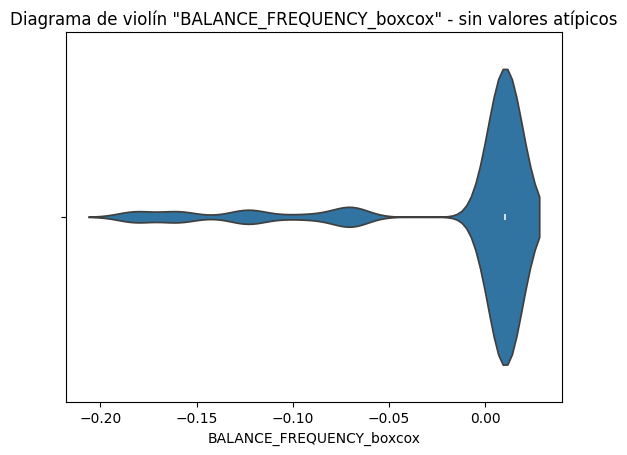

In [ ]:
sns.violinplot(x=df_no_outliers12["BALANCE_FREQUENCY_boxcox"])
plt.title(f'Diagrama de violín "BALANCE_FREQUENCY_boxcox" - sin valores atípicos')
plt.show()

In [ ]:
original_rows = df.shape[0]
new_rows = df_no_outliers12.shape[0]

percentage_removed = ((original_rows - new_rows) / original_rows) * 100

print(f"Porcentaje de filas eliminadas: {percentage_removed:.2f}%")

Porcentaje de filas eliminadas: 17.30%


Se eliminó el 17.30% de las filas del conjunto de datos, considerando que estos valores representaban casos extremos o inconsistencias en las variables. Este porcentaje, aunque elevado, es razonable debido a que el dataframe sigue siendo suficientemente grande para garantizar la validez estadística y representatividad de los análisis.

## 1.3 Transformación de datos

In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear una copia para el clustering
df_clustering = df_no_outliers12.copy()

# Seleccionar solo las columnas numéricas para estandarizar
columns_to_scale = [
    'PURCHASES_boxcox','PURCHASES_TRX_boxcox', 'ONEOFF_PURCHASES_boxcox','ONEOFF_PURCHASES_FREQUENCY_boxcox','INSTALLMENTS_PURCHASES_boxcox','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
    'BALANCE_boxcox','CASH_ADVANCE_boxcox', 'CREDIT_LIMIT_boxcox','CASH_ADVANCE_FREQUENCY_boxcox',
    'PAYMENTS_boxcox','PRC_FULL_PAYMENT_boxcox'
]

# Estandarizar las columnas
scaler = StandardScaler()
df_clustering[columns_to_scale] = scaler.fit_transform(df_clustering[columns_to_scale])

# Validar resultado
print(df_clustering[columns_to_scale].head())
print("✅ Estandarización completada exitosamente.")

   PURCHASES_boxcox  PURCHASES_TRX_boxcox  ONEOFF_PURCHASES_boxcox  \
0         -0.321330             -0.426514                -1.131014   
1         -1.692077             -1.637599                 0.393778   
2          0.168565              0.434196                 1.016681   
3         -0.809697             -0.675868                 0.393778   
4          0.805211              0.207795                 0.393778   

   ONEOFF_PURCHASES_FREQUENCY_boxcox  INSTALLMENTS_PURCHASES_boxcox  \
0                          -1.092038                       0.438871   
1                          -1.092038                      -1.225389   
2                           1.512872                      -1.225389   
3                           0.310135                      -1.225389   
4                          -1.092038                       1.168271   

   PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  BALANCE_boxcox  \
0            -0.907599                         -0.789189       -0.014100   


In [ ]:
# Validar estadísticas de las columnas estandarizadas
df_clustering[columns_to_scale].describe().T

count          mean       std       min  \
PURCHASES_boxcox                   7402.0  3.455760e-17  1.000068 -1.692077   
PURCHASES_TRX_boxcox               7402.0 -2.687814e-17  1.000068 -1.637599   
ONEOFF_PURCHASES_boxcox            7402.0  7.679468e-18  1.000068 -1.131014   
ONEOFF_PURCHASES_FREQUENCY_boxcox  7402.0 -9.983308e-17  1.000068 -1.092038   
INSTALLMENTS_PURCHASES_boxcox      7402.0 -1.055927e-17  1.000068 -1.225389   
PURCHASES_FREQUENCY                7402.0  6.431554e-17  1.000068 -1.342053   
PURCHASES_INSTALLMENTS_FREQUENCY   7402.0  4.991654e-17  1.000068 -1.006936   
BALANCE_boxcox                     7402.0 -6.143574e-17  1.000068 -2.882014   
CASH_ADVANCE_boxcox                7402.0  7.103507e-17  1.000068 -0.907349   
CREDIT_LIMIT_boxcox                7402.0  7.065110e-16  1.000068 -5.072290   
CASH_ADVANCE_FREQUENCY_boxcox      7402.0 -1.583890e-16  1.000068 -0.897362   
PAYMENTS_boxcox                    7402.0 -9.215361e-17  1.000068 -2.907730   
PRC_FULL_PAYMENT_boxcox            7402.0  1.804675e-16  1.000068 -0.648750   

                                        25%       50%       75%       max  
PURCHASES_boxcox                  -0.397669  0.168565  0.675046  3.048974  
PURCHASES_TRX_boxcox              -0.675868  0.137660  0.607871  3.232568  
ONEOFF_PURCHASES_boxcox           -1.131014  0.393778  0.923999  1.940421  
ONEOFF_PURCHASES_FREQUENCY_boxcox -1.092038  0.310135  0.860814  1.512872  
INSTALLMENTS_PURCHASES_boxcox     -1.225389  0.418944  0.849115  1.877514  
PURCHASES_FREQUENCY               -1.124828 -0.064824  1.047442  1.264668  
PURCHASES_INSTALLMENTS_FREQUENCY  -1.006936 -0.048234  0.952791  1.606033  
BALANCE_boxcox                    -0.686546 -0.014100  0.630142  2.991801  
CASH_ADVANCE_boxcox               -0.907349 -0.907349  1.105090  1.381353  
CREDIT_LIMIT_boxcox               -0.757909 -0.097830  0.816833  3.027758  
CASH_ADVANCE_FREQUENCY_boxcox     -0.897362 -0.897362  1.008060  1.527028  
PAYMENTS_boxcox                   -0.688130 -0.128782  0.603259  2.782699  
PRC_FULL_PAYMENT_boxcox           -0.648750 -0.648750  1.313912  1.688740

In [ ]:
# Validar estadísticas de las columnas estandarizadas
# Resumir estadísticas de las columnas estandarizadas
stats_scaled = df_clustering[columns_to_scale].describe().T
stats_scaled['skewness'] = df_clustering[columns_to_scale].skew()
stats_scaled['kurtosis'] = df_clustering[columns_to_scale].kurtosis()

# Mostrar estadísticas relevantes
print(stats_scaled[['mean', 'std', 'min', 'max', 'skewness', 'kurtosis']])

                                           mean       std       min       max  \
PURCHASES_boxcox                   3.455760e-17  1.000068 -1.692077  3.048974   
PURCHASES_TRX_boxcox              -2.687814e-17  1.000068 -1.637599  3.232568   
ONEOFF_PURCHASES_boxcox            7.679468e-18  1.000068 -1.131014  1.940421   
ONEOFF_PURCHASES_FREQUENCY_boxcox -9.983308e-17  1.000068 -1.092038  1.512872   
INSTALLMENTS_PURCHASES_boxcox     -1.055927e-17  1.000068 -1.225389  1.877514   
PURCHASES_FREQUENCY                6.431554e-17  1.000068 -1.342053  1.264668   
PURCHASES_INSTALLMENTS_FREQUENCY   4.991654e-17  1.000068 -1.006936  1.606033   
BALANCE_boxcox                    -6.143574e-17  1.000068 -2.882014  2.991801   
CASH_ADVANCE_boxcox                7.103507e-17  1.000068 -0.907349  1.381353   
CREDIT_LIMIT_boxcox                7.065110e-16  1.000068 -5.072290  3.027758   
CASH_ADVANCE_FREQUENCY_boxcox     -1.583890e-16  1.000068 -0.897362  1.527028   
PAYMENTS_boxcox             

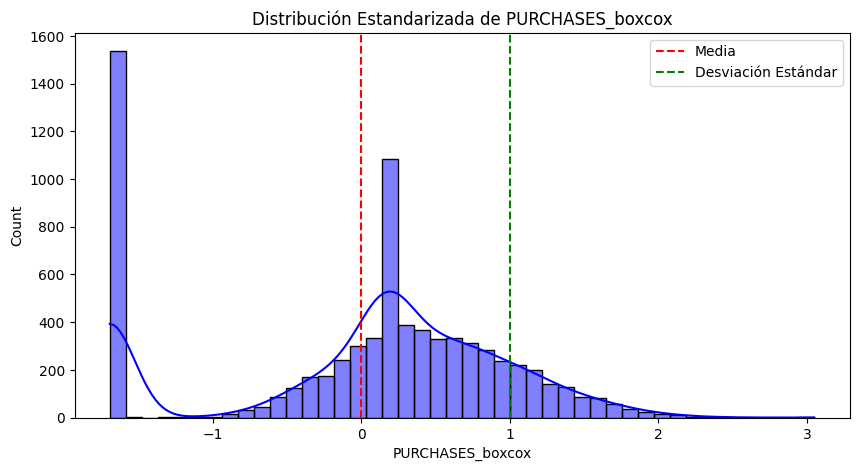

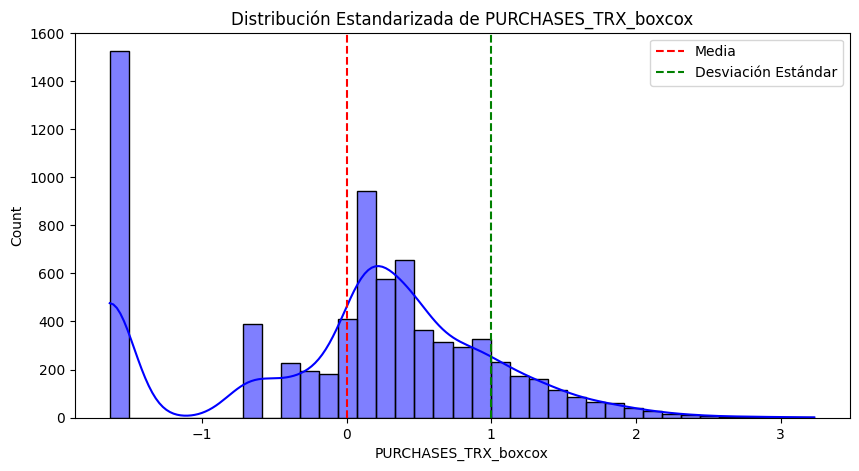

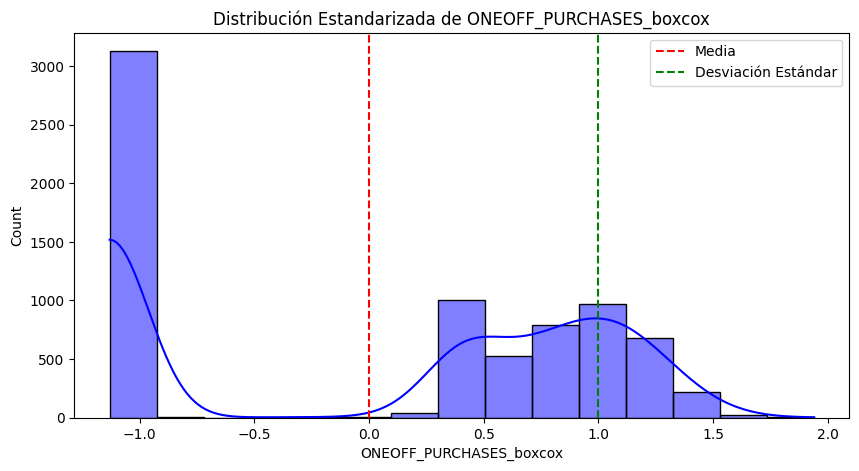

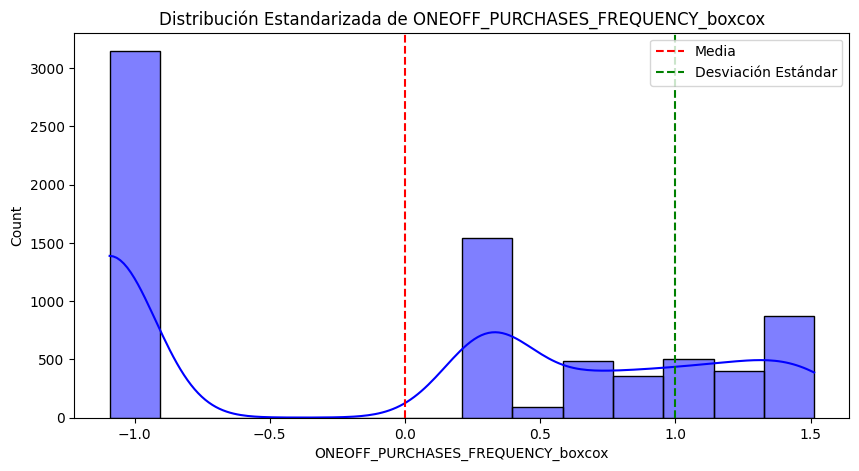

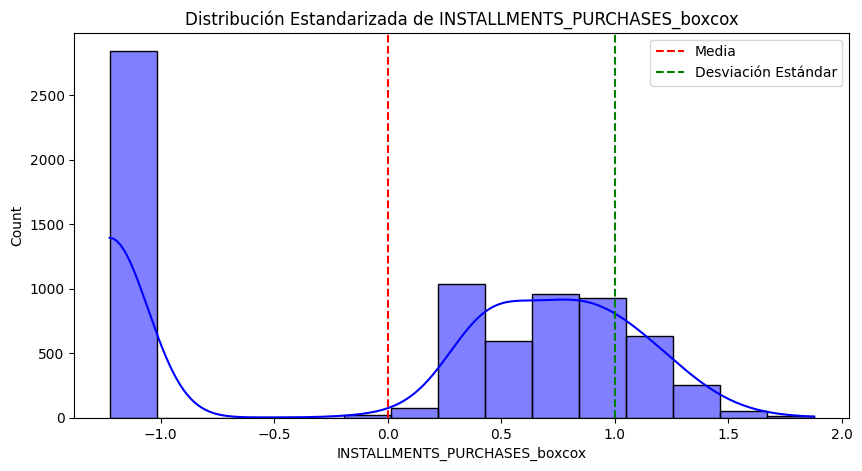

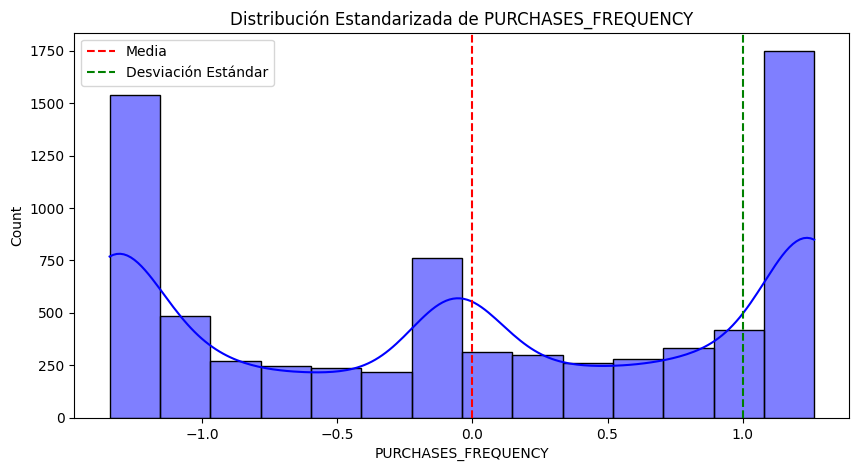

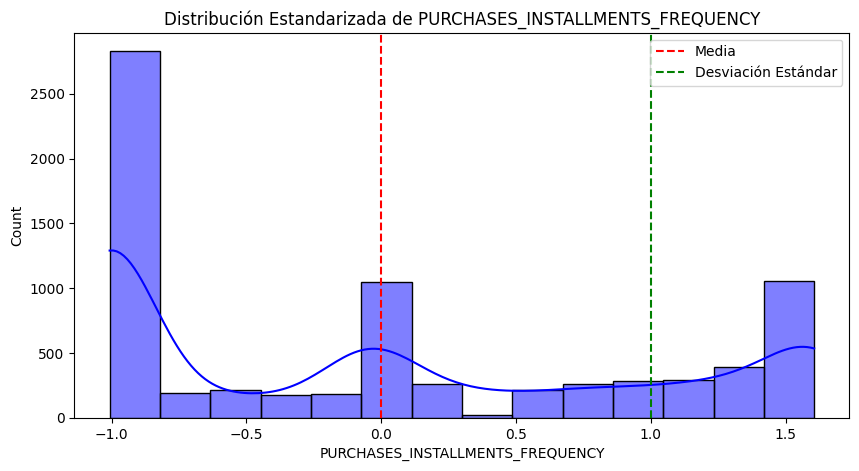

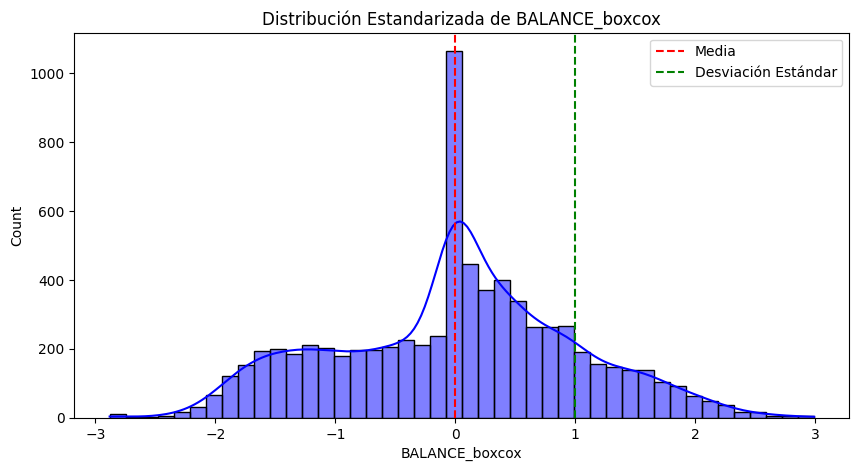

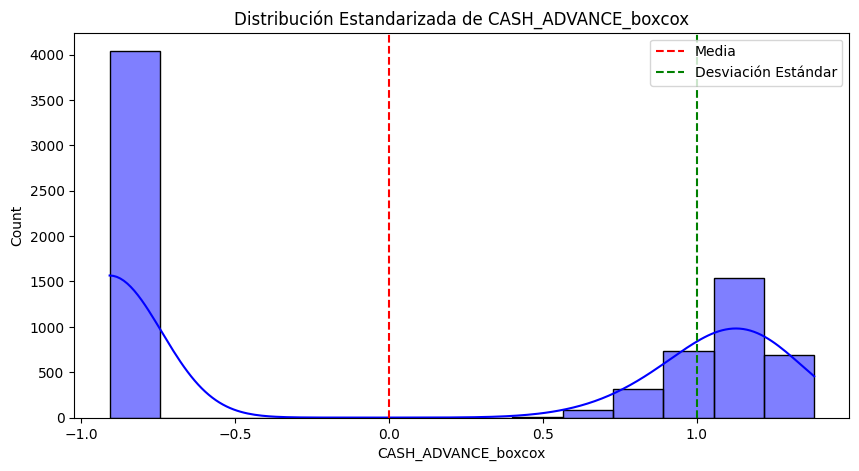

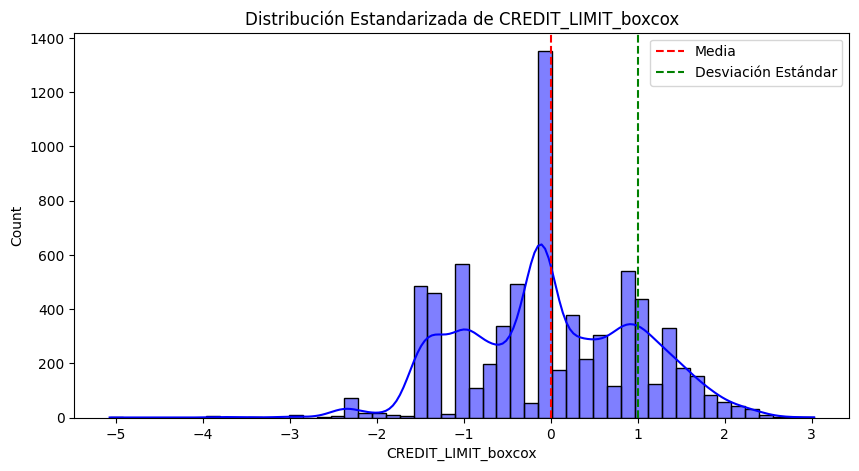

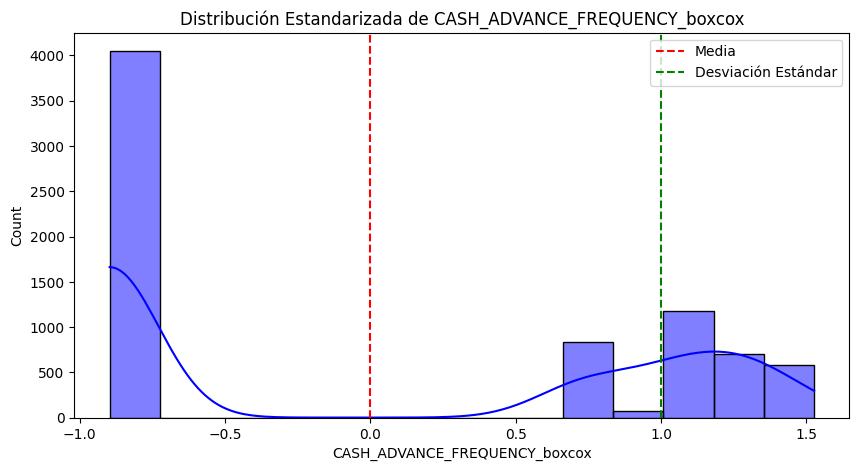

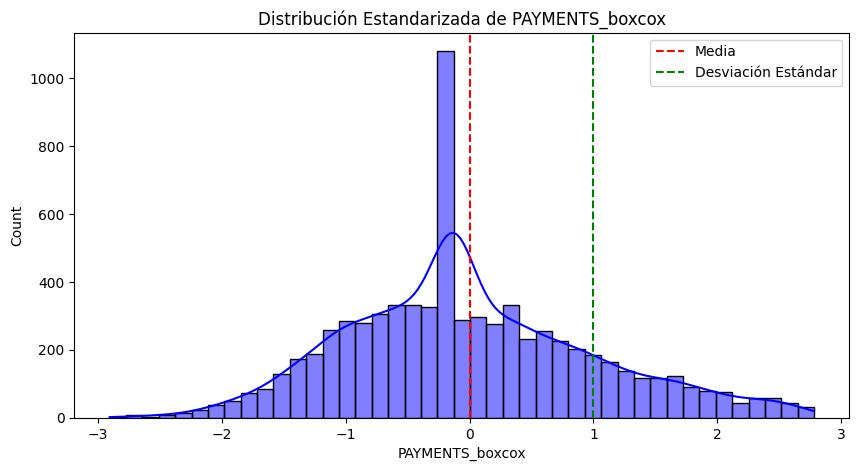

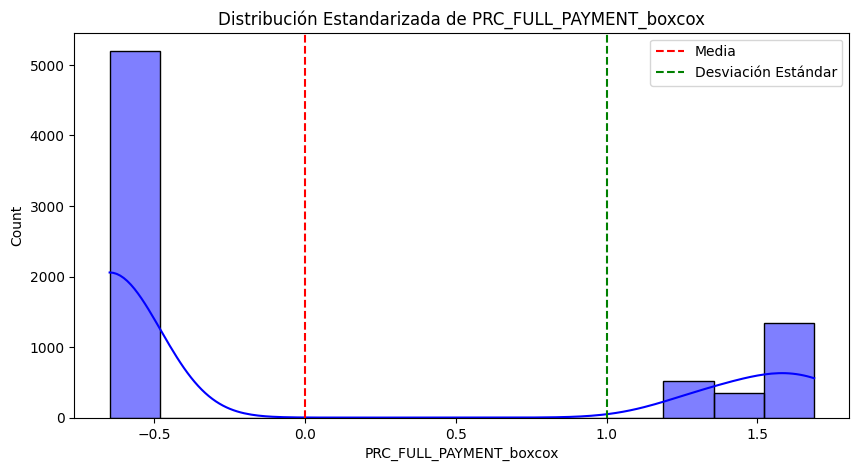

In [ ]:
# Visualizar distribuciones estandarizadas
for col in columns_to_scale:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_clustering[col], kde=True, color='blue')
    plt.title(f'Distribución Estandarizada de {col}')
    plt.axvline(df_clustering[col].mean(), color='red', linestyle='--', label='Media')
    plt.axvline(df_clustering[col].std(), color='green', linestyle='--', label='Desviación Estándar')
    plt.legend()
    plt.show()

No consideramos viable la discretización de alguna variable, debido a que consideramos inoportuno por la falta de información y conocimiento de un experto o especialista en tarjetas de crédito.

**Bibliografía:** “The effect of standardisation and normalisation in the performance of K-means clustering”

B. Erfanian and A. Shahbahrami (2012). International Journal of Soft Computing and Engineering (IJSCE), Vol. 2, Issue-3.

## 1.4 Anallisis Univariado

In [ ]:
# Estadísticas descriptivas de BALANCE_boxcox
BALANCE_boxcox_stats = df_clustering['BALANCE_boxcox'].describe()
BALANCE_boxcox_stats['rango'] = df_clustering['BALANCE_boxcox'].max() - df_clustering['BALANCE_boxcox'].min()
BALANCE_boxcox_stats['variance'] = df_clustering['BALANCE_boxcox'].var()
BALANCE_boxcox_stats['mode'] = df_clustering['BALANCE_boxcox'].mode()[0]

print("Estadísticas descriptivas de BALANCE_boxcox:")
print(BALANCE_boxcox_stats)

Estadísticas descriptivas de BALANCE_boxcox:
count       7.402000e+03
mean       -6.143574e-17
std         1.000068e+00
min        -2.882014e+00
25%        -6.865464e-01
50%        -1.409972e-02
75%         6.301415e-01
max         2.991801e+00
rango       5.873814e+00
variance    1.000135e+00
mode       -1.409972e-02
Name: BALANCE_boxcox, dtype: float64


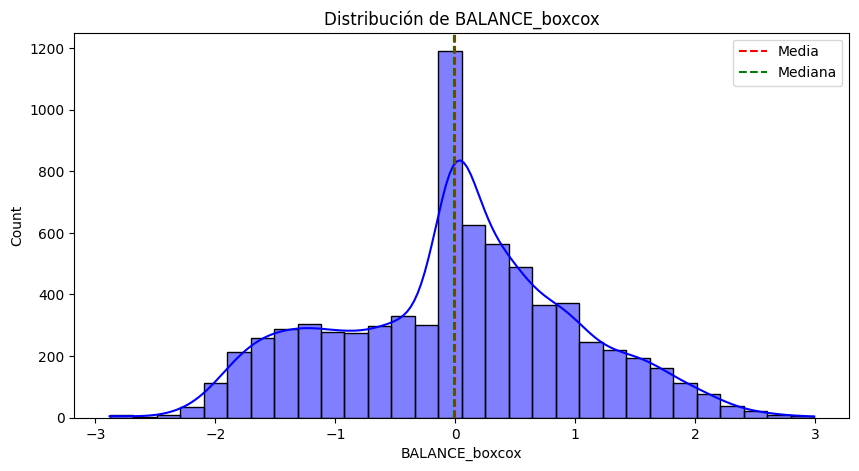

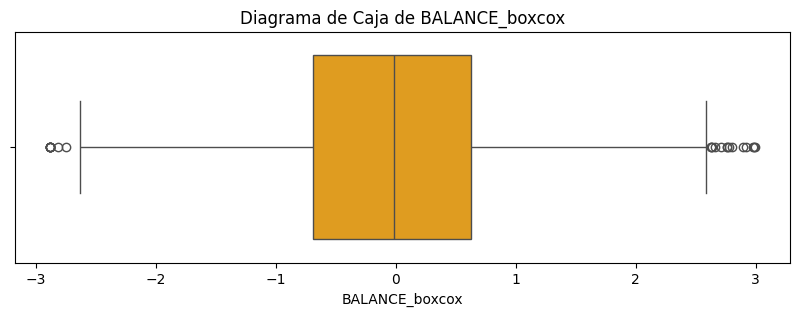

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['BALANCE_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de BALANCE_boxcox')
plt.axvline(df_clustering['BALANCE_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['BALANCE_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['BALANCE_boxcox'], color='orange')
plt.title('Diagrama de Caja de BALANCE_boxcox')
plt.show()

In [ ]:
# Estadísticas descriptivas de CASH_ADVANCE_boxcox
CASH_ADVANCE_boxcox_stats = df_clustering['CASH_ADVANCE_boxcox'].describe()
CASH_ADVANCE_boxcox_stats['rango'] = df_clustering['CASH_ADVANCE_boxcox'].max() - df_clustering['CASH_ADVANCE_boxcox'].min()
CASH_ADVANCE_boxcox_stats['variance'] = df_clustering['CASH_ADVANCE_boxcox'].var()
CASH_ADVANCE_boxcox_stats['mode'] = df_clustering['CASH_ADVANCE_boxcox'].mode()[0]

print("Estadísticas descriptivas de CASH_ADVANCE_boxcox:")
print(CASH_ADVANCE_boxcox_stats)

Estadísticas descriptivas de CASH_ADVANCE_boxcox:
count       7.402000e+03
mean        7.103507e-17
std         1.000068e+00
min        -9.073490e-01
25%        -9.073490e-01
50%        -9.073490e-01
75%         1.105090e+00
max         1.381353e+00
rango       2.288702e+00
variance    1.000135e+00
mode       -9.073490e-01
Name: CASH_ADVANCE_boxcox, dtype: float64


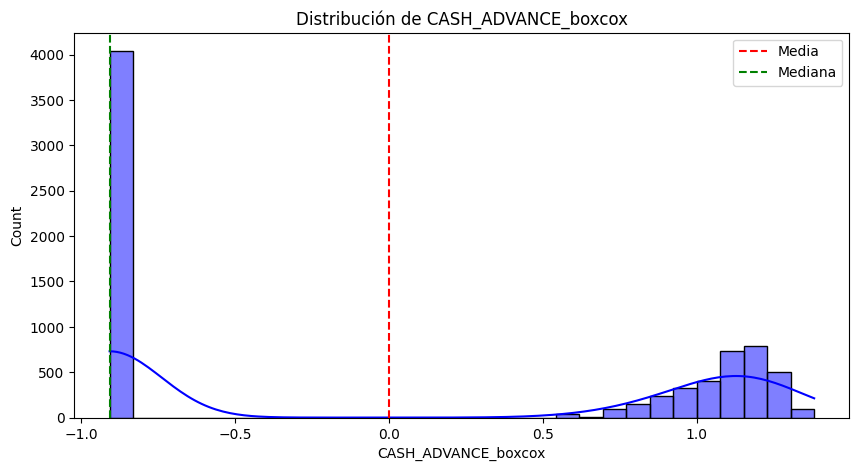

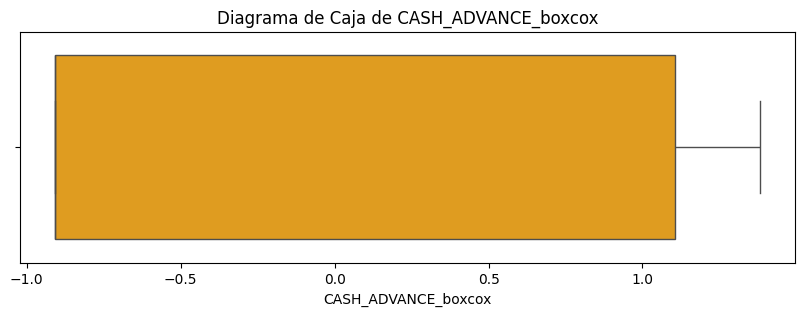

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['CASH_ADVANCE_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de CASH_ADVANCE_boxcox')
plt.axvline(df_clustering['CASH_ADVANCE_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['CASH_ADVANCE_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['CASH_ADVANCE_boxcox'], color='orange')
plt.title('Diagrama de Caja de CASH_ADVANCE_boxcox')
plt.show()

In [ ]:
# Estadísticas descriptivas de PURCHASES_boxcox
purchases_stats = df_clustering['PURCHASES_boxcox'].describe()
purchases_stats['rango'] = df_clustering['PURCHASES_boxcox'].max() - df_clustering['PURCHASES_boxcox'].min()
purchases_stats['variance'] = df_clustering['PURCHASES_boxcox'].var()
purchases_stats['mode'] = df_clustering['PURCHASES_boxcox'].mode()[0]

print("Estadísticas descriptivas de PURCHASES_boxcox:")
print(purchases_stats)

Estadísticas descriptivas de PURCHASES_boxcox:
count       7.402000e+03
mean        3.455760e-17
std         1.000068e+00
min        -1.692077e+00
25%        -3.976688e-01
50%         1.685654e-01
75%         6.750464e-01
max         3.048974e+00
rango       4.741051e+00
variance    1.000135e+00
mode       -1.692077e+00
Name: PURCHASES_boxcox, dtype: float64


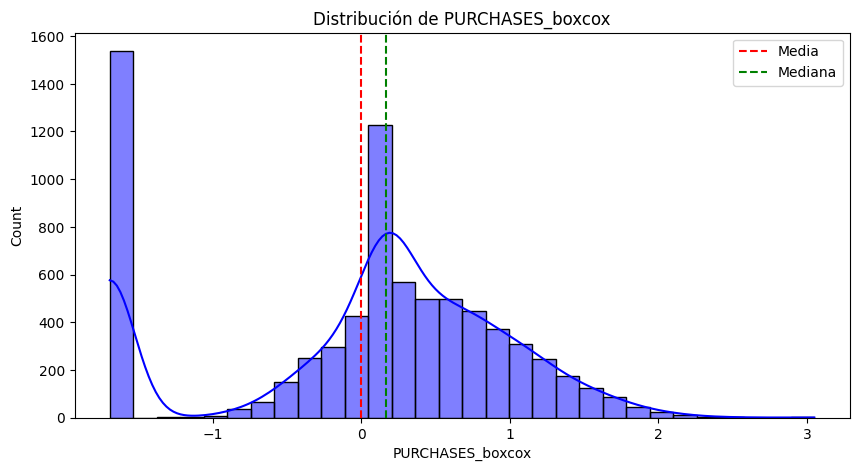

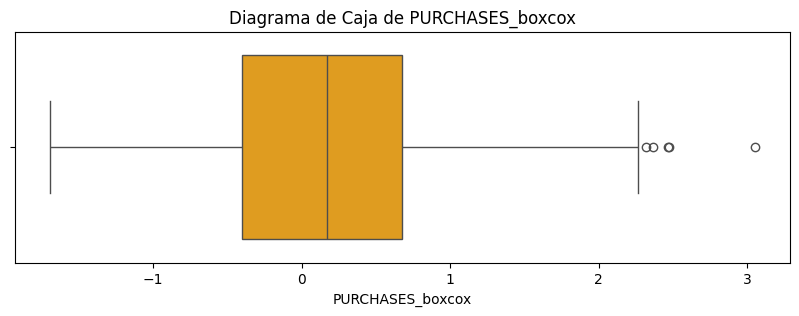

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['PURCHASES_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de PURCHASES_boxcox')
plt.axvline(df_clustering['PURCHASES_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['PURCHASES_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['PURCHASES_boxcox'], color='orange')
plt.title('Diagrama de Caja de PURCHASES_boxcox')
plt.show()

In [ ]:
# Estadísticas descriptivas de PURCHASES_TRX_boxcox
purchases_trx_stats = df_clustering['PURCHASES_TRX_boxcox'].describe()
purchases_trx_stats['rango'] = df_clustering['PURCHASES_TRX_boxcox'].max() - df_clustering['PURCHASES_TRX_boxcox'].min()
purchases_trx_stats['variance'] = df_clustering['PURCHASES_TRX_boxcox'].var()
purchases_trx_stats['mode'] = df_clustering['PURCHASES_TRX_boxcox'].mode()[0]

print("Estadísticas descriptivas de PURCHASES_TRX_boxcox:")
print(purchases_trx_stats)

Estadísticas descriptivas de PURCHASES_TRX_boxcox:
count       7.402000e+03
mean       -2.687814e-17
std         1.000068e+00
min        -1.637599e+00
25%        -6.758683e-01
50%         1.376603e-01
75%         6.078712e-01
max         3.232568e+00
rango       4.870166e+00
variance    1.000135e+00
mode       -1.637599e+00
Name: PURCHASES_TRX_boxcox, dtype: float64


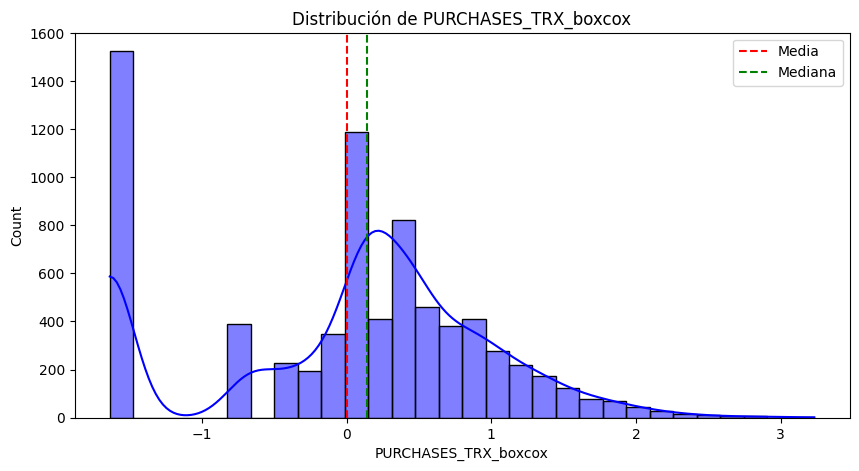

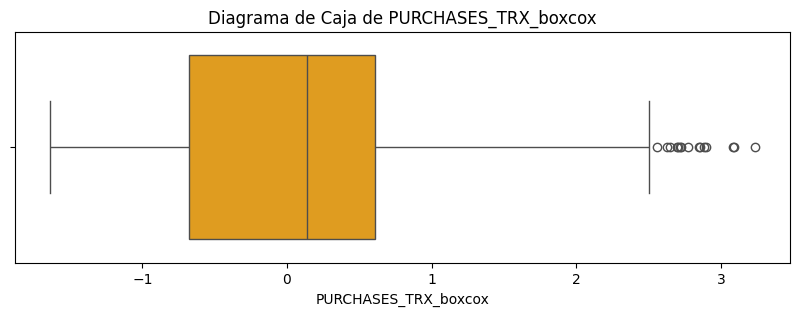

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['PURCHASES_TRX_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de PURCHASES_TRX_boxcox')
plt.axvline(df_clustering['PURCHASES_TRX_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['PURCHASES_TRX_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['PURCHASES_TRX_boxcox'], color='orange')
plt.title('Diagrama de Caja de PURCHASES_TRX_boxcox')
plt.show()

In [ ]:
# Estadísticas descriptivas de ONEOFF_PURCHASES_boxcox
oneoff_purchases_stats = df_clustering['ONEOFF_PURCHASES_boxcox'].describe()
oneoff_purchases_stats['rango'] = df_clustering['ONEOFF_PURCHASES_boxcox'].max() - df_clustering['ONEOFF_PURCHASES_boxcox'].min()
oneoff_purchases_stats['variance'] = df_clustering['ONEOFF_PURCHASES_boxcox'].var()
oneoff_purchases_stats['mode'] = df_clustering['ONEOFF_PURCHASES_boxcox'].mode()[0]

print("Estadísticas descriptivas de ONEOFF_PURCHASES_boxcox:")
print(oneoff_purchases_stats)

Estadísticas descriptivas de ONEOFF_PURCHASES_boxcox:
count       7.402000e+03
mean        7.679468e-18
std         1.000068e+00
min        -1.131014e+00
25%        -1.131014e+00
50%         3.937784e-01
75%         9.239985e-01
max         1.940421e+00
rango       3.071435e+00
variance    1.000135e+00
mode       -1.131014e+00
Name: ONEOFF_PURCHASES_boxcox, dtype: float64


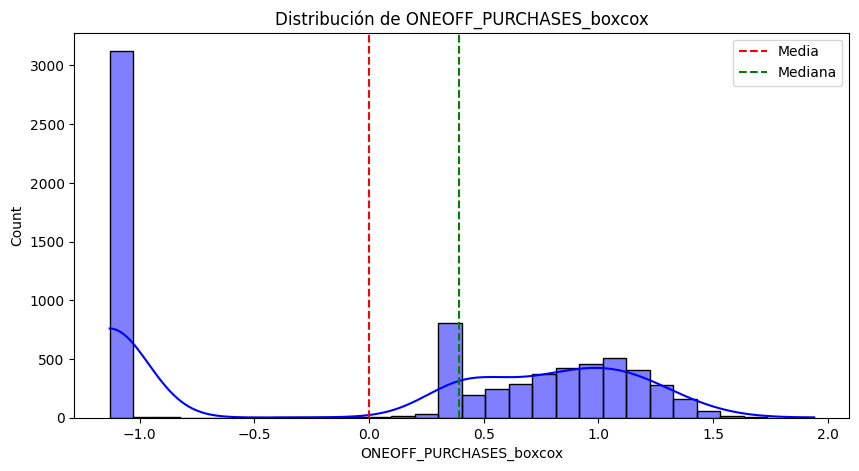

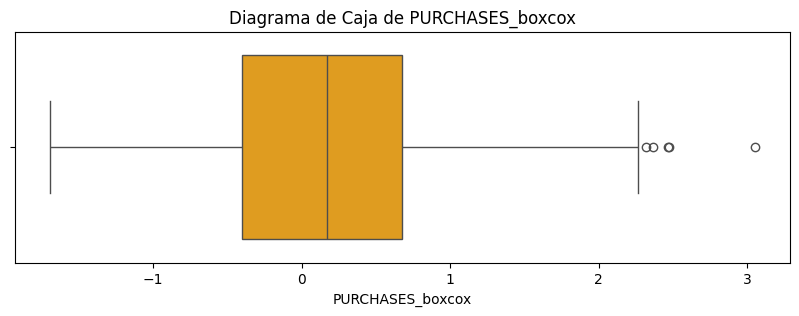

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['ONEOFF_PURCHASES_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de ONEOFF_PURCHASES_boxcox')
plt.axvline(df_clustering['ONEOFF_PURCHASES_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['ONEOFF_PURCHASES_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['PURCHASES_boxcox'], color='orange')
plt.title('Diagrama de Caja de PURCHASES_boxcox')
plt.show()

In [ ]:
# Estadísticas descriptivas de ONEOFF_PURCHASES_FREQUENCY_boxcox
oneoff_purchases_frequency_stats = df_clustering['ONEOFF_PURCHASES_FREQUENCY_boxcox'].describe()
oneoff_purchases_frequency_stats['rango'] = df_clustering['ONEOFF_PURCHASES_FREQUENCY_boxcox'].max() - df_clustering['ONEOFF_PURCHASES_FREQUENCY_boxcox'].min()
oneoff_purchases_frequency_stats['variance'] = df_clustering['ONEOFF_PURCHASES_FREQUENCY_boxcox'].var()
oneoff_purchases_frequency_stats['mode'] = df_clustering['ONEOFF_PURCHASES_FREQUENCY_boxcox'].mode()[0]

print("Estadísticas descriptivas de ONEOFF_PURCHASES_FREQUENCY_boxcox:")
print(oneoff_purchases_frequency_stats)

Estadísticas descriptivas de ONEOFF_PURCHASES_FREQUENCY_boxcox:
count       7.402000e+03
mean       -9.983308e-17
std         1.000068e+00
min        -1.092038e+00
25%        -1.092038e+00
50%         3.101345e-01
75%         8.608143e-01
max         1.512872e+00
rango       2.604910e+00
variance    1.000135e+00
mode       -1.092038e+00
Name: ONEOFF_PURCHASES_FREQUENCY_boxcox, dtype: float64


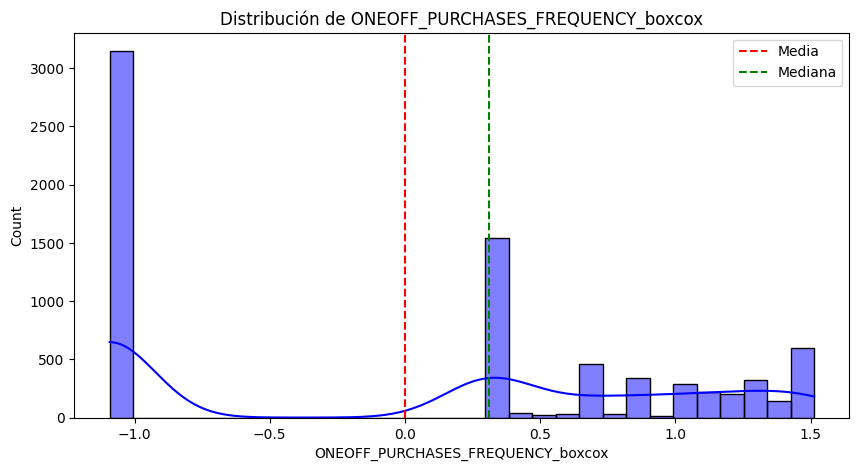

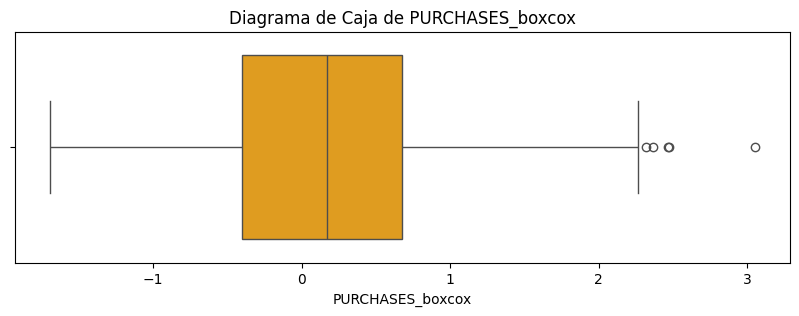

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['ONEOFF_PURCHASES_FREQUENCY_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de ONEOFF_PURCHASES_FREQUENCY_boxcox')
plt.axvline(df_clustering['ONEOFF_PURCHASES_FREQUENCY_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['ONEOFF_PURCHASES_FREQUENCY_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['PURCHASES_boxcox'], color='orange')
plt.title('Diagrama de Caja de PURCHASES_boxcox')
plt.show()

In [ ]:
# Estadísticas descriptivas de INSTALLMENTS_PURCHASES_boxcox
installments_purchases_stats = df_clustering['INSTALLMENTS_PURCHASES_boxcox'].describe()
installments_purchases_stats['rango'] = df_clustering['INSTALLMENTS_PURCHASES_boxcox'].max() - df_clustering['INSTALLMENTS_PURCHASES_boxcox'].min()
installments_purchases_stats['variance'] = df_clustering['INSTALLMENTS_PURCHASES_boxcox'].var()
installments_purchases_stats['mode'] = df_clustering['INSTALLMENTS_PURCHASES_boxcox'].mode()[0]

print("Estadísticas descriptivas de INSTALLMENTS_PURCHASES_boxcox:")
print(installments_purchases_stats)

Estadísticas descriptivas de INSTALLMENTS_PURCHASES_boxcox:
count       7.402000e+03
mean       -1.055927e-17
std         1.000068e+00
min        -1.225389e+00
25%        -1.225389e+00
50%         4.189442e-01
75%         8.491150e-01
max         1.877514e+00
rango       3.102903e+00
variance    1.000135e+00
mode       -1.225389e+00
Name: INSTALLMENTS_PURCHASES_boxcox, dtype: float64


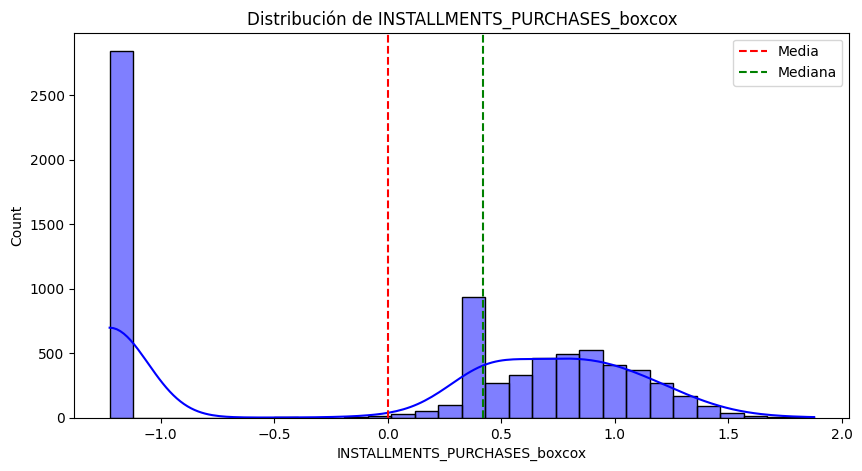

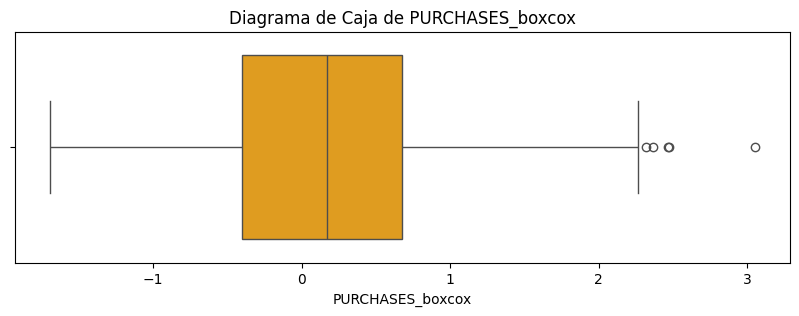

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['INSTALLMENTS_PURCHASES_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de INSTALLMENTS_PURCHASES_boxcox')
plt.axvline(df_clustering['INSTALLMENTS_PURCHASES_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['INSTALLMENTS_PURCHASES_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['PURCHASES_boxcox'], color='orange')
plt.title('Diagrama de Caja de PURCHASES_boxcox')
plt.show()

In [ ]:
# Estadísticas descriptivas de PURCHASES_FREQUENCY_boxcox
purchases_frequency_stats = df_clustering['PURCHASES_FREQUENCY'].describe()
purchases_frequency_stats['rango'] = df_clustering['PURCHASES_FREQUENCY'].max() - df_clustering['PURCHASES_FREQUENCY'].min()
purchases_frequency_stats['variance'] = df_clustering['PURCHASES_FREQUENCY'].var()
purchases_frequency_stats['mode'] = df_clustering['PURCHASES_FREQUENCY'].mode()[0]

print("Estadísticas descriptivas de PURCHASES_FREQUENCY_boxcox:")
print(purchases_frequency_stats)

Estadísticas descriptivas de PURCHASES_FREQUENCY_boxcox:
count       7.402000e+03
mean        6.431554e-17
std         1.000068e+00
min        -1.342053e+00
25%        -1.124828e+00
50%        -6.482361e-02
75%         1.047442e+00
max         1.264668e+00
rango       2.606721e+00
variance    1.000135e+00
mode        1.264668e+00
Name: PURCHASES_FREQUENCY, dtype: float64


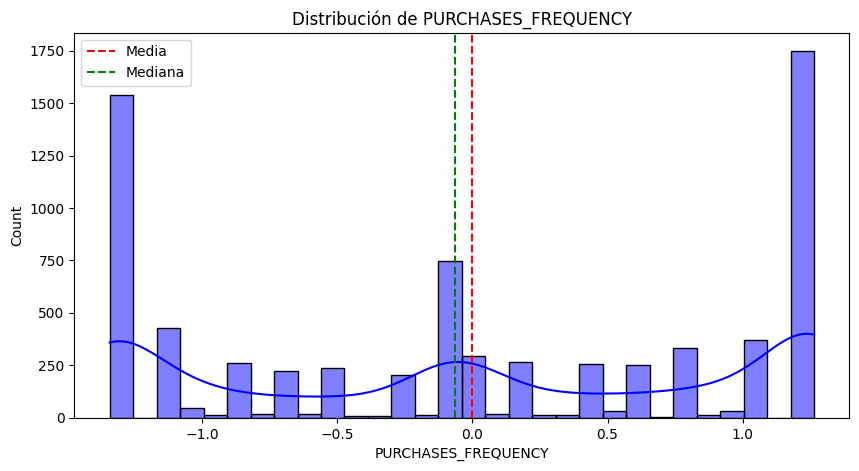

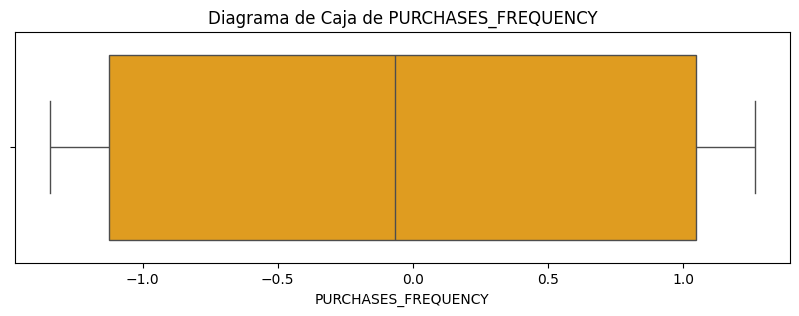

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['PURCHASES_FREQUENCY'], kde=True, color='blue', bins=30)
plt.title('Distribución de PURCHASES_FREQUENCY')
plt.axvline(df_clustering['PURCHASES_FREQUENCY'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['PURCHASES_FREQUENCY'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['PURCHASES_FREQUENCY'], color='orange')
plt.title('Diagrama de Caja de PURCHASES_FREQUENCY')
plt.show()

In [ ]:
# Estadísticas descriptivas de PURCHASES_INSTALLMENTS_FREQUENCY
purchases_installments_frequency_stats = df_clustering['PURCHASES_INSTALLMENTS_FREQUENCY'].describe()
purchases_installments_frequency_stats['rango'] = df_clustering['PURCHASES_INSTALLMENTS_FREQUENCY'].max() - df_clustering['PURCHASES_INSTALLMENTS_FREQUENCY'].min()
purchases_installments_frequency_stats['variance'] = df_clustering['PURCHASES_INSTALLMENTS_FREQUENCY'].var()
purchases_installments_frequency_stats['mode'] = df_clustering['PURCHASES_INSTALLMENTS_FREQUENCY'].mode()[0]

print("Estadísticas descriptivas de PURCHASES_INSTALLMENTS_FREQUENCY:")
print(purchases_installments_frequency_stats)

Estadísticas descriptivas de PURCHASES_INSTALLMENTS_FREQUENCY:
count       7.402000e+03
mean        4.991654e-17
std         1.000068e+00
min        -1.006936e+00
25%        -1.006936e+00
50%        -4.823353e-02
75%         9.527907e-01
max         1.606033e+00
rango       2.612969e+00
variance    1.000135e+00
mode       -1.006936e+00
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: float64


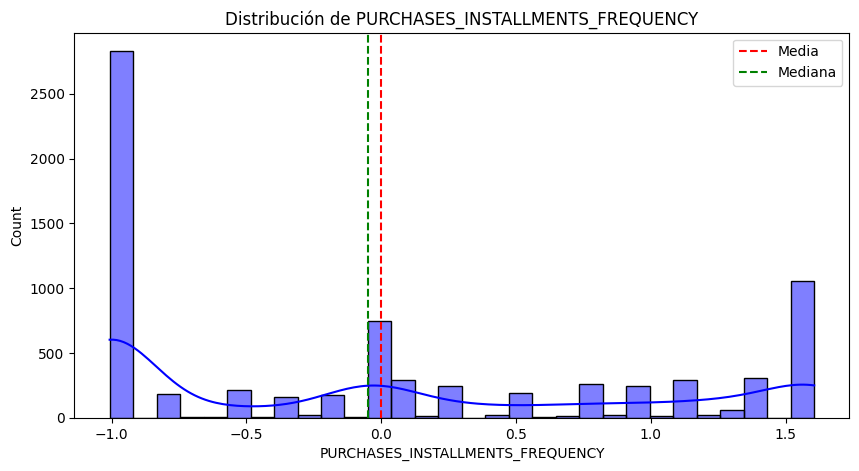

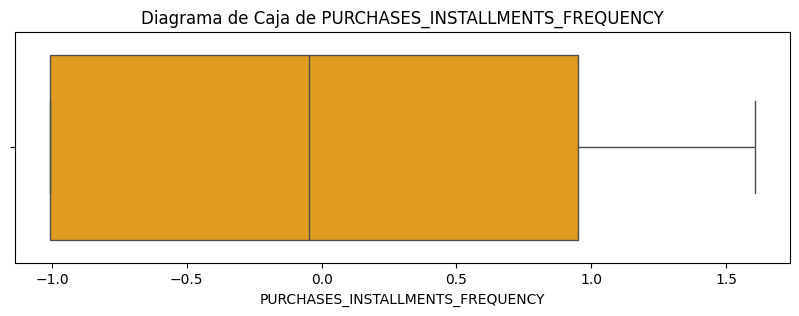

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['PURCHASES_INSTALLMENTS_FREQUENCY'], kde=True, color='blue', bins=30)
plt.title('Distribución de PURCHASES_INSTALLMENTS_FREQUENCY')
plt.axvline(df_clustering['PURCHASES_INSTALLMENTS_FREQUENCY'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['PURCHASES_INSTALLMENTS_FREQUENCY'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['PURCHASES_INSTALLMENTS_FREQUENCY'], color='orange')
plt.title('Diagrama de Caja de PURCHASES_INSTALLMENTS_FREQUENCY')
plt.show()

In [ ]:
# Estadísticas descriptivas de CREDIT_LIMIT_boxcox
CREDIT_LIMIT_boxcox_stats = df_clustering['CREDIT_LIMIT_boxcox'].describe()
CREDIT_LIMIT_boxcox_stats['rango'] = df_clustering['CREDIT_LIMIT_boxcox'].max() - df_clustering['CREDIT_LIMIT_boxcox'].min()
CREDIT_LIMIT_boxcox_stats['variance'] = df_clustering['CREDIT_LIMIT_boxcox'].var()
CREDIT_LIMIT_boxcox_stats['mode'] = df_clustering['CREDIT_LIMIT_boxcox'].mode()[0]

print("Estadísticas descriptivas de CREDIT_LIMIT_boxcox:")
print(CREDIT_LIMIT_boxcox_stats)

Estadísticas descriptivas de CREDIT_LIMIT_boxcox:
count       7.402000e+03
mean        7.065110e-16
std         1.000068e+00
min        -5.072290e+00
25%        -7.579088e-01
50%        -9.783004e-02
75%         8.168332e-01
max         3.027758e+00
rango       8.100049e+00
variance    1.000135e+00
mode       -9.783004e-02
Name: CREDIT_LIMIT_boxcox, dtype: float64


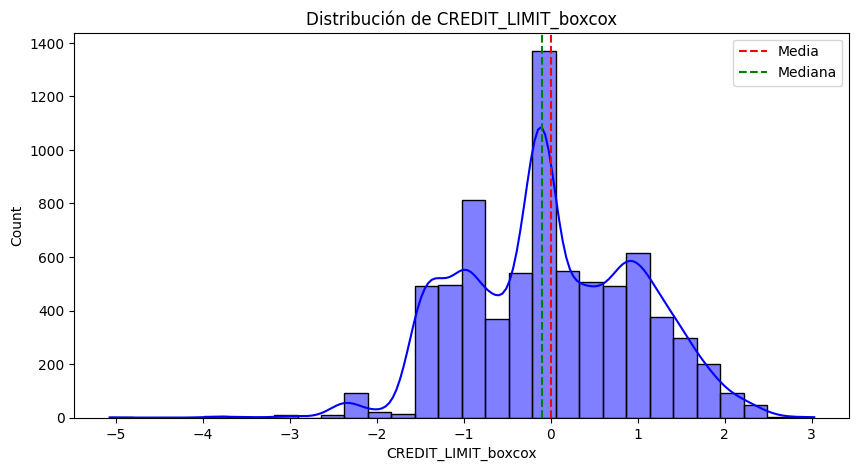

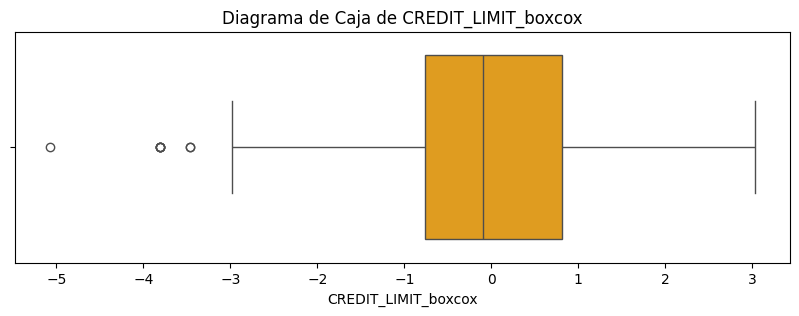

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['CREDIT_LIMIT_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de CREDIT_LIMIT_boxcox')
plt.axvline(df_clustering['CREDIT_LIMIT_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['CREDIT_LIMIT_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['CREDIT_LIMIT_boxcox'], color='orange')
plt.title('Diagrama de Caja de CREDIT_LIMIT_boxcox')
plt.show()

In [ ]:
# Estadísticas descriptivas de CASH_ADVANCE_FREQUENCY_boxcox
CASH_ADVANCE_FREQUENCY_boxcox_stats = df_clustering['CASH_ADVANCE_FREQUENCY_boxcox'].describe()
CASH_ADVANCE_FREQUENCY_boxcox_stats['rango'] = df_clustering['CASH_ADVANCE_FREQUENCY_boxcox'].max() - df_clustering['CASH_ADVANCE_FREQUENCY_boxcox'].min()
CASH_ADVANCE_FREQUENCY_boxcox_stats['variance'] = df_clustering['CASH_ADVANCE_FREQUENCY_boxcox'].var()
CASH_ADVANCE_FREQUENCY_boxcox_stats['mode'] = df_clustering['CASH_ADVANCE_FREQUENCY_boxcox'].mode()[0]

print("Estadísticas descriptivas de CASH_ADVANCE_FREQUENCY_boxcox:")
print(CASH_ADVANCE_FREQUENCY_boxcox_stats)

Estadísticas descriptivas de CASH_ADVANCE_FREQUENCY_boxcox:
count       7.402000e+03
mean       -1.583890e-16
std         1.000068e+00
min        -8.973619e-01
25%        -8.973619e-01
50%        -8.973619e-01
75%         1.008060e+00
max         1.527028e+00
rango       2.424390e+00
variance    1.000135e+00
mode       -8.973619e-01
Name: CASH_ADVANCE_FREQUENCY_boxcox, dtype: float64


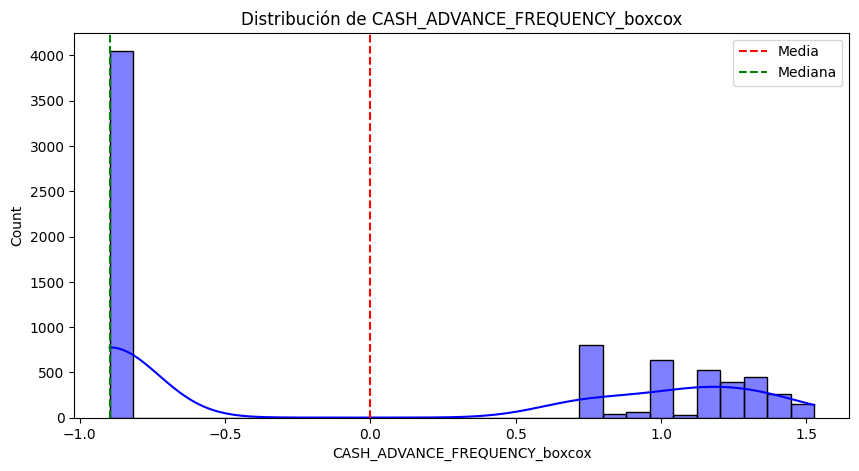

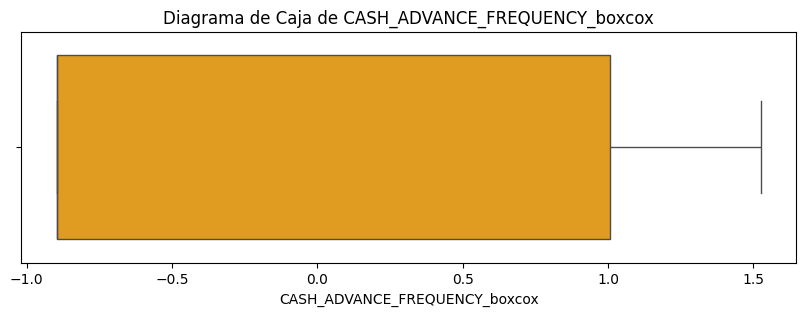

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['CASH_ADVANCE_FREQUENCY_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de CASH_ADVANCE_FREQUENCY_boxcox')
plt.axvline(df_clustering['CASH_ADVANCE_FREQUENCY_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['CASH_ADVANCE_FREQUENCY_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['CASH_ADVANCE_FREQUENCY_boxcox'], color='orange')
plt.title('Diagrama de Caja de CASH_ADVANCE_FREQUENCY_boxcox')
plt.show()

In [ ]:
# Estadísticas descriptivas de PAYMENTS_boxcox
PAYMENTS_boxcox_stats = df_clustering['PAYMENTS_boxcox'].describe()
PAYMENTS_boxcox_stats['rango'] = df_clustering['PAYMENTS_boxcox'].max() - df_clustering['PAYMENTS_boxcox'].min()
PAYMENTS_boxcox_stats['variance'] = df_clustering['PAYMENTS_boxcox'].var()
PAYMENTS_boxcox_stats['mode'] = df_clustering['PAYMENTS_boxcox'].mode()[0]

print("Estadísticas descriptivas de PAYMENTS_boxcox:")
print(PAYMENTS_boxcox_stats)

Estadísticas descriptivas de PAYMENTS_boxcox:
count       7.402000e+03
mean       -9.215361e-17
std         1.000068e+00
min        -2.907730e+00
25%        -6.881301e-01
50%        -1.287824e-01
75%         6.032590e-01
max         2.782699e+00
rango       5.690429e+00
variance    1.000135e+00
mode       -1.287824e-01
Name: PAYMENTS_boxcox, dtype: float64


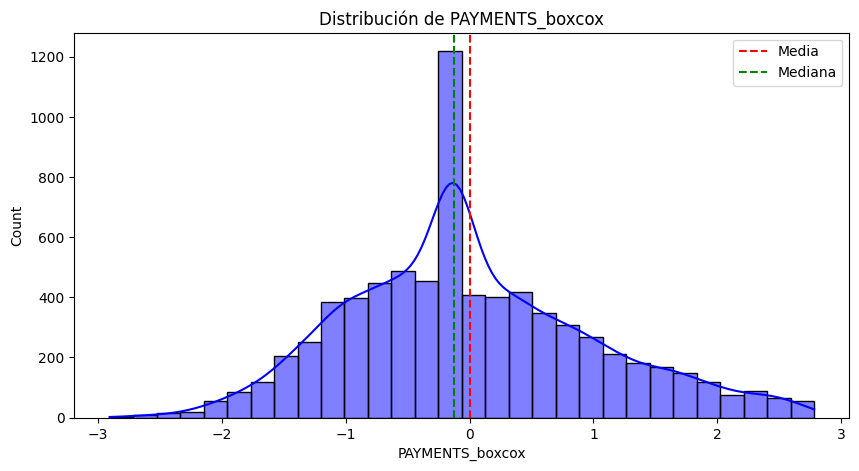

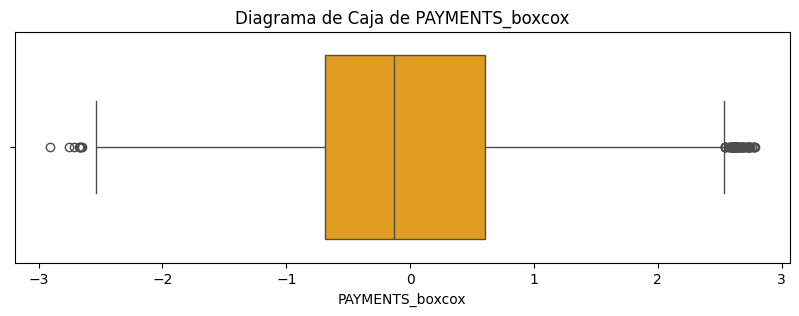

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['PAYMENTS_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de PAYMENTS_boxcox')
plt.axvline(df_clustering['PAYMENTS_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['PAYMENTS_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['PAYMENTS_boxcox'], color='orange')
plt.title('Diagrama de Caja de PAYMENTS_boxcox')
plt.show()

In [ ]:
# Estadísticas descriptivas de PRC_FULL_PAYMENT_boxcox
PRC_FULL_PAYMENT_boxcox_stats = df_clustering['PRC_FULL_PAYMENT_boxcox'].describe()
PRC_FULL_PAYMENT_boxcox_stats['rango'] = df_clustering['PRC_FULL_PAYMENT_boxcox'].max() - df_clustering['PRC_FULL_PAYMENT_boxcox'].min()
PRC_FULL_PAYMENT_boxcox_stats['variance'] = df_clustering['PRC_FULL_PAYMENT_boxcox'].var()
PRC_FULL_PAYMENT_boxcox_stats['mode'] = df_clustering['PRC_FULL_PAYMENT_boxcox'].mode()[0]

print("Estadísticas descriptivas de PRC_FULL_PAYMENT_boxcox:")
print(PRC_FULL_PAYMENT_boxcox_stats)

Estadísticas descriptivas de PRC_FULL_PAYMENT_boxcox:
count       7.402000e+03
mean        1.804675e-16
std         1.000068e+00
min        -6.487504e-01
25%        -6.487504e-01
50%        -6.487504e-01
75%         1.313912e+00
max         1.688740e+00
rango       2.337490e+00
variance    1.000135e+00
mode       -6.487504e-01
Name: PRC_FULL_PAYMENT_boxcox, dtype: float64


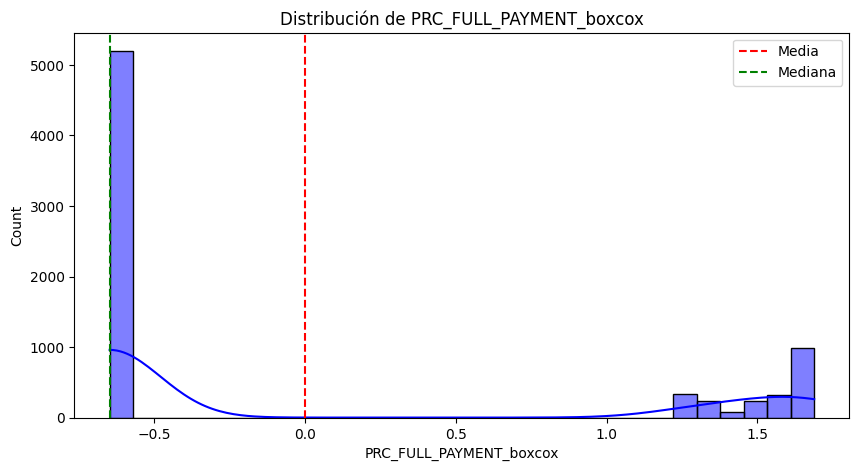

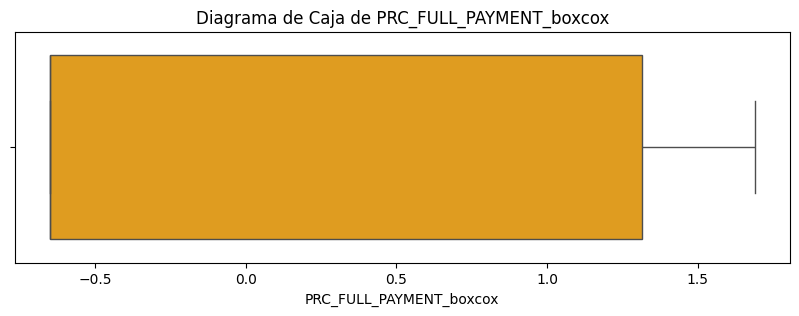

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['PRC_FULL_PAYMENT_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de PRC_FULL_PAYMENT_boxcox')
plt.axvline(df_clustering['PRC_FULL_PAYMENT_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['PRC_FULL_PAYMENT_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['PRC_FULL_PAYMENT_boxcox'], color='orange')
plt.title('Diagrama de Caja de PRC_FULL_PAYMENT_boxcox')
plt.show()

## 1.5 Generación de Insights

**a) BALANCE**

- **Rango:** Desde ~ –2.88 hasta +2.92.
- **Distribución:**
  - El histograma se ve relativamente “centrado” alrededor de 0, con una ligera cola a la derecha.
  - La mediana está muy cerca de 0, y el boxplot muestra outliers en ambos extremos.
- **Interpretación:**
  - Muchos clientes tienen un balance (saldo) cercano a la media (la zona de –1 a +1).
  - Existen clientes con balances muy bajos (cola izquierda) y también balances muy altos (cola derecha).
  - En términos de negocio, significa que la mayoría mantiene un saldo “moderado” en la tarjeta, pero se observan extremos que podrían ser clientes con deudas muy altas (cola derecha).

**Insight:** El uso real del crédito (reflejado en BALANCE) abarca desde quienes casi no cargan saldo hasta quienes lo llevan al máximo, con un número significativo en torno a la media.

In [ ]:
# Estadísticas descriptivas de BALANCE_boxcox
BALANCE_boxcox_stats = df_clustering['BALANCE_boxcox'].describe()
BALANCE_boxcox_stats['rango'] = df_clustering['BALANCE_boxcox'].max() - df_clustering['BALANCE_boxcox'].min()
BALANCE_boxcox_stats['variance'] = df_clustering['BALANCE_boxcox'].var()
BALANCE_boxcox_stats['mode'] = df_clustering['BALANCE_boxcox'].mode()[0]

print("Estadísticas descriptivas de BALANCE_boxcox:")
print(BALANCE_boxcox_stats)

Estadísticas descriptivas de BALANCE_boxcox:
count       7.402000e+03
mean       -6.143574e-17
std         1.000068e+00
min        -2.882014e+00
25%        -6.865464e-01
50%        -1.409972e-02
75%         6.301415e-01
max         2.991801e+00
rango       5.873814e+00
variance    1.000135e+00
mode       -1.409972e-02
Name: BALANCE_boxcox, dtype: float64


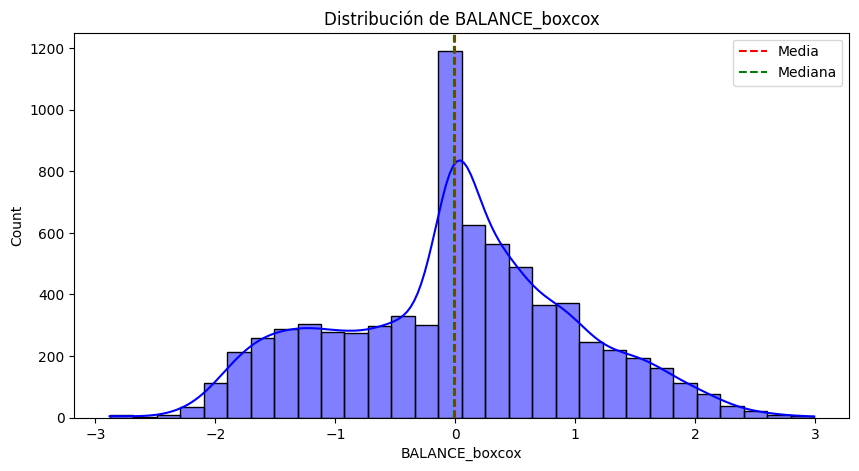

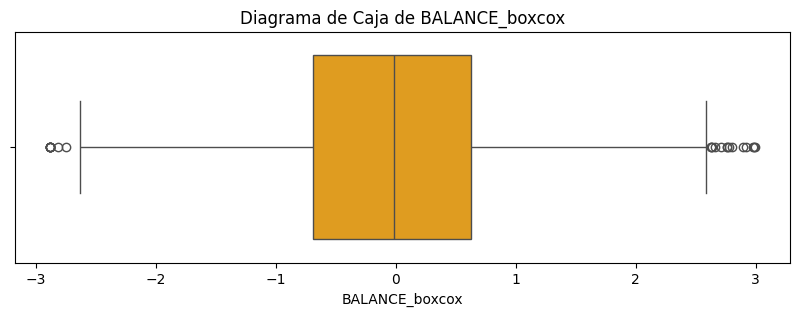

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['BALANCE_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de BALANCE_boxcox')
plt.axvline(df_clustering['BALANCE_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['BALANCE_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['BALANCE_boxcox'], color='orange')
plt.title('Diagrama de Caja de BALANCE_boxcox')
plt.show()

**b) CASH_ADVANCE**

- **Rango:** De –0.91 hasta +1.38 aproximadamente.
- **Distribución:**
  - Llama la atención que el 25%, 50% e incluso la mediana coincidan en –0.91, lo cual sugiere que al menos la mitad de los clientes están en ese mínimo ( 0 en la escala original, es decir, no usan cash advance).
  - El resto de la distribución se extiende hacia la derecha, con valores que llegan a ~1.3.
- **Interpretación:**
  - Una gran parte de usuarios no hace adelantos de efectivo (o lo hace de forma muy esporádica).
 - Otro sector, menor en número, pero notable, llega hasta la zona de 1.3 (alto uso de efectivo).
  - El boxplot también refleja que casi toda la “caja” está por encima de –0.91, confirmando esa gran masa en el punto mínimo.

**Insight:** Polarización en el uso del cash advance: la mitad de los clientes ni lo tocan, mientras que existe un segmento de usuarios que sí lo emplea, algunos de forma intensiva.

In [ ]:
# Estadísticas descriptivas de CASH_ADVANCE_boxcox
CASH_ADVANCE_boxcox_stats = df_clustering['CASH_ADVANCE_boxcox'].describe()
CASH_ADVANCE_boxcox_stats['rango'] = df_clustering['CASH_ADVANCE_boxcox'].max() - df_clustering['CASH_ADVANCE_boxcox'].min()
CASH_ADVANCE_boxcox_stats['variance'] = df_clustering['CASH_ADVANCE_boxcox'].var()
CASH_ADVANCE_boxcox_stats['mode'] = df_clustering['CASH_ADVANCE_boxcox'].mode()[0]

print("Estadísticas descriptivas de CASH_ADVANCE_boxcox:")
print(CASH_ADVANCE_boxcox_stats)

Estadísticas descriptivas de CASH_ADVANCE_boxcox:
count       7.402000e+03
mean        7.103507e-17
std         1.000068e+00
min        -9.073490e-01
25%        -9.073490e-01
50%        -9.073490e-01
75%         1.105090e+00
max         1.381353e+00
rango       2.288702e+00
variance    1.000135e+00
mode       -9.073490e-01
Name: CASH_ADVANCE_boxcox, dtype: float64


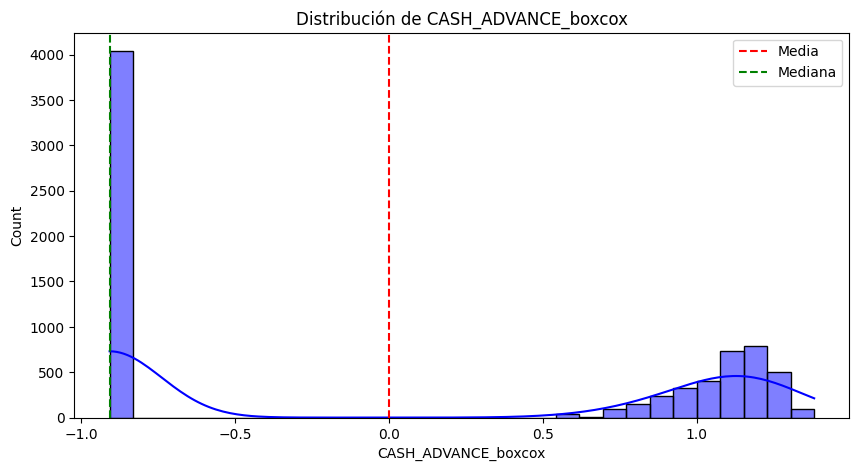

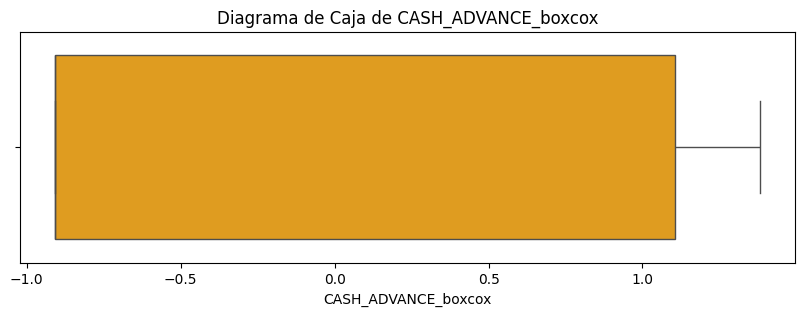

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_clustering['CASH_ADVANCE_boxcox'], kde=True, color='blue', bins=30)
plt.title('Distribución de CASH_ADVANCE_boxcox')
plt.axvline(df_clustering['CASH_ADVANCE_boxcox'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_clustering['CASH_ADVANCE_boxcox'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# Diagrama de Caja
plt.figure(figsize=(10, 3))
sns.boxplot(x=df_clustering['CASH_ADVANCE_boxcox'], color='orange')
plt.title('Diagrama de Caja de CASH_ADVANCE_boxcox')
plt.show()

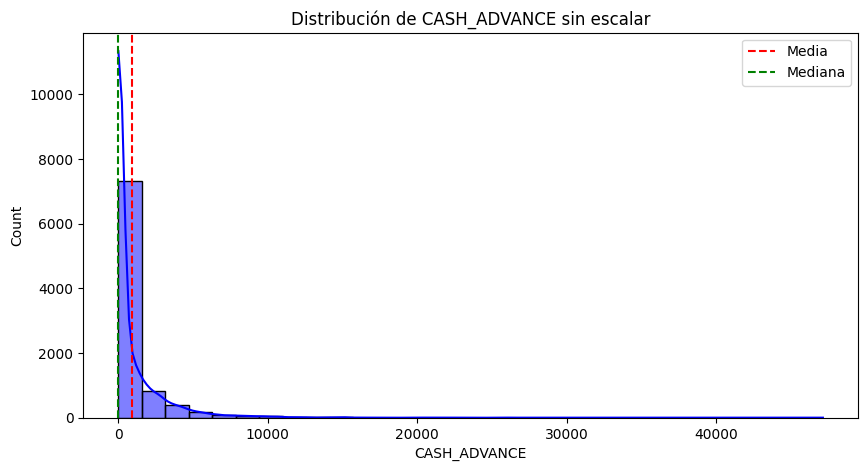

In [ ]:
# Histograma y KDE
plt.figure(figsize=(10, 5))
sns.histplot(df_dropped['CASH_ADVANCE'], kde=True, color='blue', bins=30)
plt.title('Distribución de CASH_ADVANCE sin escalar')
plt.axvline(df_dropped['CASH_ADVANCE'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df_dropped['CASH_ADVANCE'].median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.show()


# 2. Clustering

## 2.1 Aplicar Clustering

In [ ]:
# Categorías y variables
compra_vars = ['PURCHASES_boxcox','PURCHASES_TRX_boxcox', 'ONEOFF_PURCHASES_boxcox','ONEOFF_PURCHASES_FREQUENCY_boxcox','INSTALLMENTS_PURCHASES_boxcox','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']
credito_vars = ['BALANCE_boxcox','CASH_ADVANCE_boxcox', 'CREDIT_LIMIT_boxcox','CASH_ADVANCE_FREQUENCY_boxcox']
pago_vars = ['PAYMENTS_boxcox','PRC_FULL_PAYMENT_boxcox']

# Combinar en un solo listado para el clustering
vars_clustering = compra_vars + credito_vars + pago_vars

In [ ]:
# Extraer solo las columnas de interés en un array numpy
X = df_clustering[vars_clustering].values

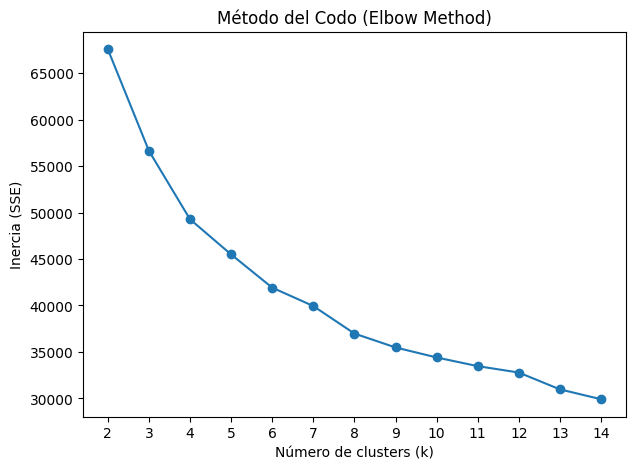

El codo se detectó en k = 6


In [ ]:
SSE = []                # Lista para guardar la inercia en cada k
K_range = range(2, 15)  # Por ejemplo, evaluar k entre 2 y 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# Graficar k vs. SSE
plt.figure(figsize=(7,5))
plt.plot(K_range, SSE, marker='o')
plt.title('Método del Codo (Elbow Method)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (SSE)')
plt.xticks(K_range)
plt.show()

# Para detectar el codo automáticamente:
from kneed import KneeLocator
kl = KneeLocator(K_range, SSE, curve="convex", direction="decreasing")
print("El codo se detectó en k =", kl.elbow)

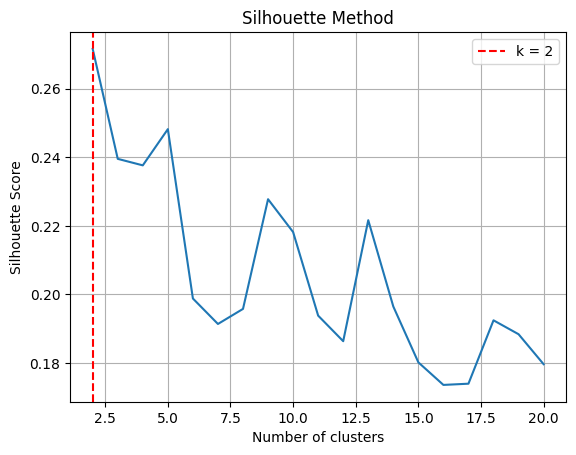

In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
## for machine learning
from sklearn import preprocessing, cluster

# calculate the silhouette score
sil = []
# define the range of clusters to test
kmax = 20
# fit the model for each number of clusters
for k in range(2, kmax+1):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))


# find the best number of clusters that maximizes the silhouette score
k = np.argmax(sil)+2

# plot the silhouette score
fig, ax = plt.subplots()
plt.plot(range(2, kmax+1), sil)
plt.axvline(k, ls='--', color="red", label="k = "+str(k))
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

## 2.2 Caracterización de Clusters

In [ ]:
best_k = 3  # Ajustar según la gráfica del codo
kmeans_model = KMeans(n_clusters=best_k, random_state=42)
kmeans_model.fit(X)

# Asignar el cluster a cada cliente
df_clustering['cluster'] = kmeans_model.labels_

In [ ]:
# Agrupar DataFrame por la columna 'cluster'
grouped = df_clustering.groupby('cluster')

# Calcular la media (o mediana) de las variables de cada categoría
compra_means = grouped[compra_vars].mean()
credito_means = grouped[credito_vars].mean()
pago_means = grouped[pago_vars].mean()

# Nombrar columnas para distinguir más fácilmente
compra_means.columns = [f"{col}_mean" for col in compra_means.columns]
credito_means.columns = [f"{col}_mean" for col in credito_means.columns]
pago_means.columns = [f"{col}_mean" for col in pago_means.columns]

# Combinar en un solo DataFrame "cluster_profile"
cluster_profile = pd.concat([compra_means, credito_means, pago_means], axis=1)
display(cluster_profile)

PURCHASES_boxcox_mean  PURCHASES_TRX_boxcox_mean  \
cluster                                                     
0                     0.221697                   0.358352   
1                     0.721989                   0.663908   
2                    -1.095478                  -1.117235   

         ONEOFF_PURCHASES_boxcox_mean  ONEOFF_PURCHASES_FREQUENCY_boxcox_mean  \
cluster                                                                         
0                           -0.798026                               -0.791119   
1                            0.895473                                0.909658   
2                           -0.595524                               -0.618861   

         INSTALLMENTS_PURCHASES_boxcox_mean  PURCHASES_FREQUENCY_mean  \
cluster                                                                 
0                                  0.738108                  0.618670   
1                                  0.335010                  0.509183   
2                                 -0.960136                 -1.101417   

         PURCHASES_INSTALLMENTS_FREQUENCY_mean  BALANCE_boxcox_mean  \
cluster                                                               
0                                     0.838653            -0.842461   
1                                     0.208898             0.130104   
2                                    -0.867842             0.430220   

         CASH_ADVANCE_boxcox_mean  CREDIT_LIMIT_boxcox_mean  \
cluster                                                       
0                       -0.696399                 -0.489812   
1                       -0.226770                  0.353934   
2                        0.789876                 -0.111339   

         CASH_ADVANCE_FREQUENCY_boxcox_mean  PAYMENTS_boxcox_mean  \
cluster                                                             
0                                 -0.691041             -0.570380   
1                                 -0.236932              0.408818   
2                                  0.799265             -0.125323   

         PRC_FULL_PAYMENT_boxcox_mean  
cluster                                
0                            0.493927  
1                            0.028922  
2                           -0.388880

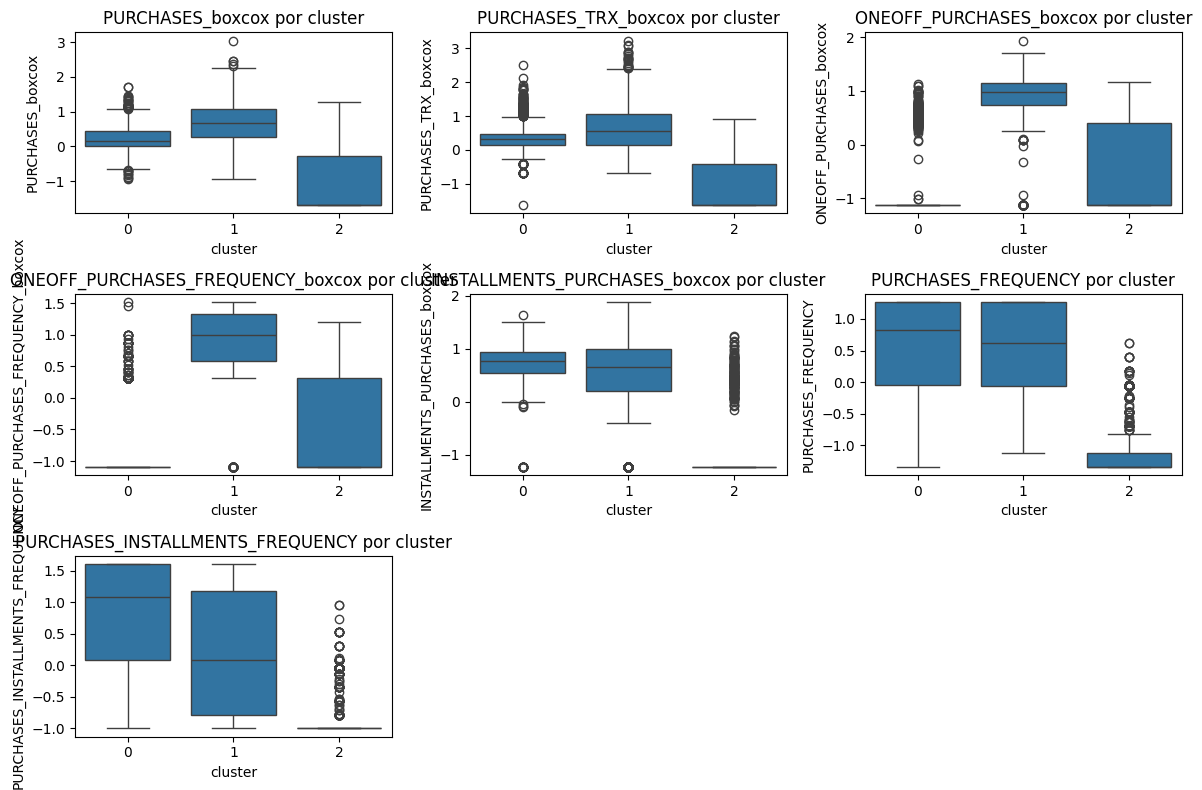

In [ ]:
# ver cómo difieren las variables de 'compra' en cada cluster
plt.figure(figsize=(12, 8))
for i, var in enumerate(compra_vars):
    plt.subplot(3, 3, i+1)  # 2 filas, 2 columnas
    sns.boxplot(x='cluster', y=var, data=df_clustering)
    plt.title(f"{var} por cluster")
plt.tight_layout()
plt.show()

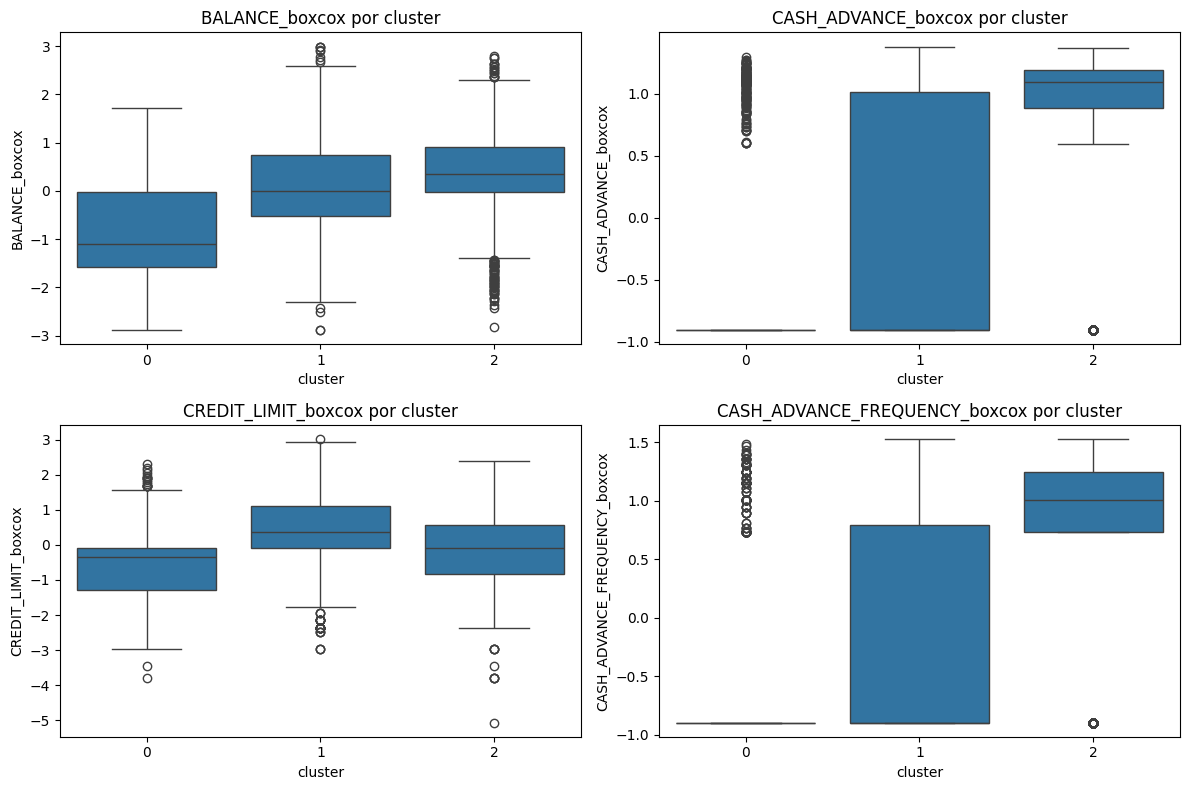

In [ ]:
# ver cómo difieren las variables de 'credito' en cada cluster
plt.figure(figsize=(12, 8))
for i, var in enumerate(credito_vars):
    plt.subplot(2, 2, i+1)  # 2 filas, 2 columnas
    sns.boxplot(x='cluster', y=var, data=df_clustering)
    plt.title(f"{var} por cluster")
plt.tight_layout()
plt.show()

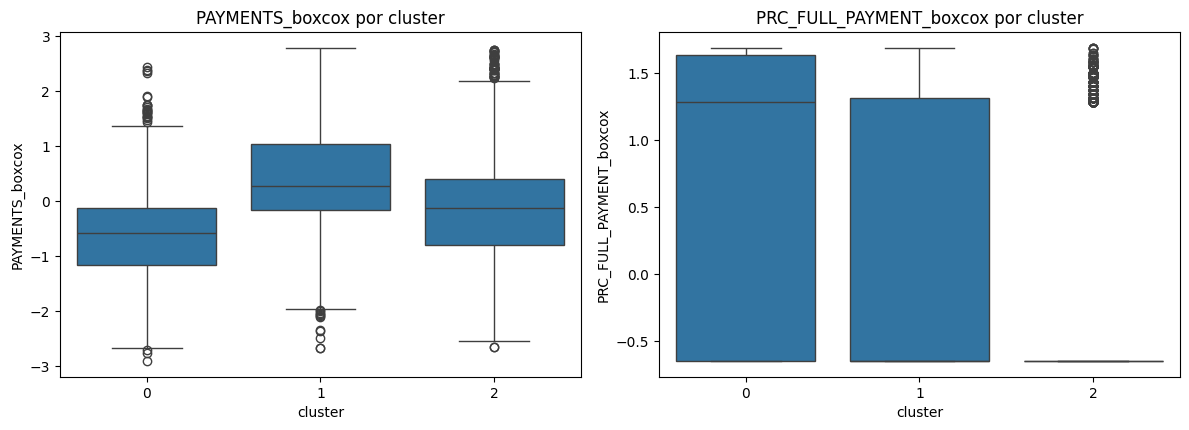

In [ ]:
# ver cómo difieren las variables de 'pago' en cada cluster
plt.figure(figsize=(12, 8))
for i, var in enumerate(pago_vars):
    plt.subplot(2, 2, i+1)  # 2 filas, 2 columnas
    sns.boxplot(x='cluster', y=var, data=df_clustering)
    plt.title(f"{var} por cluster")
plt.tight_layout()
plt.show()

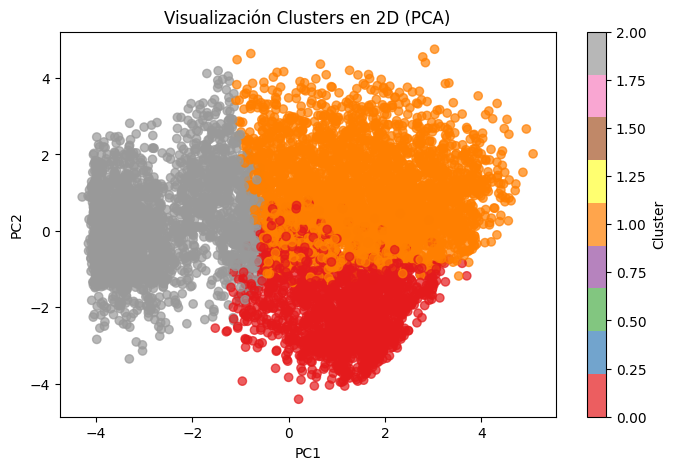

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)  # X son tus variables estandarizadas

plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df_clustering['cluster'], cmap='Set1', alpha=0.7)
plt.title('Visualización Clusters en 2D (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

<ipython-input-198-6a95fc8e77cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="cluster", data=df_clustering, palette=colors)
<ipython-input-198-6a95fc8e77cc>:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(y="cluster", data=df_clustering, palette=colors)


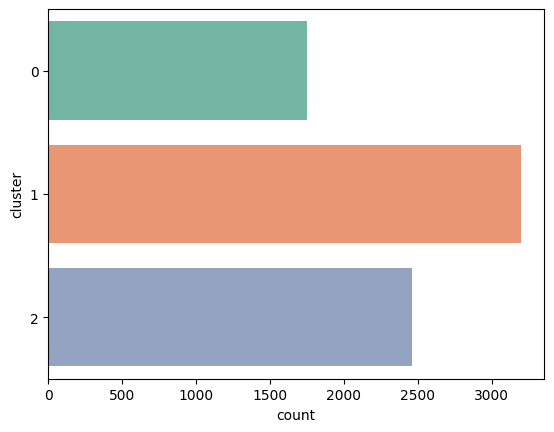

In [ ]:
colors = sns.color_palette("Set2", n_colors=5).as_hex()
fig, ax = plt.subplots()
sns.countplot(y="cluster", data=df_clustering, palette=colors)
ax.set_xlabel("count")
ax.set_ylabel("cluster")
plt.show()

1. **CLUSTER 0**
**a) Comportamiento de Compra:**
- PURCHASES_boxcox ≈ +0.22, PURCHASES_TRX_boxcox ≈ +0.36
  - Levemente por encima de la media en monto total de compras y número de transacciones.
- ONEOFF_PURCHASES_boxcox ≈ –0.80, ONEOFF_PURCHASES_FREQUENCY_boxcox ≈ –0.79
  - Por debajo de la media en compras puntuales (one-off).
- INSTALLMENTS_PURCHASES_boxcox ≈ +0.74
    - Muy por encima en compras a plazos.
- PURCHASES_FREQUENCY ≈ +0.62, PURCHASES_INSTALLMENTS_FREQUENCY ≈ +0.84
  - Alta frecuencia de compras y, sobre todo, frecuencia en plazos.

***Interpretación:*** Compran con relativa frecuencia, prefiriendo las compras a plazos más que las de un solo pago.

**b) Uso de Crédito:**
- BALANCE_boxcox ≈ –0.84, CASH_ADVANCE_boxcox ≈ –0.70, CASH_ADVANCE_FREQUENCY_boxcox ≈ –0.69
  - Tienen saldo (balance) y uso de efectivo por debajo de la media; no acumulan grandes deudas ni usan demasiado adelantos en efectivo.
- CREDIT_LIMIT_boxcox ≈ –0.49
  - Límite de crédito algo inferior a la media.

***Interpretación:*** Mantienen saldos bajos y no se endeudan en efectivo. Tampoco disponen de un crédito muy amplio, pero no parecen necesitarlo tanto.

**c) Comportamiento de Pago**
- PAYMENTS_boxcox ≈ –0.57
  - Pagan menos que la media en valor absoluto (coherente con que tampoco gastan tanto ni mantienen saldos grandes).
- PRC_FULL_PAYMENT_boxcox ≈ +0.49
  - Por encima de la media en el porcentaje de pago completo; es decir, tienden más a liquidar o casi liquidar sus deudas.

**Perfil de Cluster 0:**

- Moderado–Alto en compras, pero concentrado en pagos a plazos.
- Saldos bajos y menor uso del efectivo (cash advance).
- Buen porcentaje de pago: suelen cubrir más su saldo.
- Podrían ser clientes “disciplinados” que usan la tarjeta principalmente para compras fraccionadas, sin abusar del crédito y sin dejar grandes deudas.

**2. CLUSTER 1**

**a) Comportamiento de Compra**

- PURCHASES_boxcox ≈ +0.72, PURCHASES_TRX_boxcox ≈ +0.67
  - Por encima en monto total y número de transacciones.
- ONEOFF_PURCHASES_boxcox ≈ +0.90, ONEOFF_PURCHASES_FREQUENCY_boxcox ≈ +0.91
  - Muy por encima en compras de un solo pago (one-off) y su frecuencia.
- INSTALLMENTS_PURCHASES_boxcox ≈ +0.34, PURCHASES_FREQUENCY ≈ +0.51, PURCHASES_INSTALLMENTS_FREQUENCY ≈ +0.21
  - También positivos (aunque menos) en compras a plazos y frecuencia de uso global.

***Interpretación:*** Alto consumo en ambas modalidades (one-off y plazos), con cierta preferencia adicional por las compras de un solo pago. Tienden a usar la tarjeta con más asiduidad que la media.

**b) Uso de Crédito**

- BALANCE_boxcox ≈ +0.13
  - Ligeramente por encima del promedio en saldo.
- CASH_ADVANCE_boxcox ≈ –0.23, CASH_ADVANCE_FREQUENCY_boxcox ≈ –0.24
  - Por debajo en uso de efectivo, no suelen recurrir a adelantos.
- CREDIT_LIMIT_boxcox ≈ +0.35
  - Límite de crédito más alto que la media, acorde a su gasto.

***Interpretación:*** Tienen un límite de crédito relativamente amplio, gastan de forma significativa pero no usan cash advance. El saldo es algo por encima de la media (pero no extremo), lo que puede indicar que aprovechan los pagos parciales pero sin depender de adelantos en efectivo.

**c) Comportamiento de Pago**

- PAYMENTS_boxcox ≈ +0.41
  - Pagan por encima de la media en valor absoluto (monto de pagos).
- PRC_FULL_PAYMENT_boxcox ≈ +0.03
  - Muy cercano a la media (ligeramente positivo), sugiere que pagan una proporción algo mayor que el promedio, aunque no de forma destacada.

**Perfil de Cluster 1:**

- Altos consumidores, compras frecuentes (especialmente one-off) y límite de crédito superior a la media.
- No utilizan mucho el efectivo (cash advance).
- Pagan montos algo elevados (coherente con su mayor gasto), con un porcentaje de pago total cercano al promedio.
- Podrían ser clientes de ingresos medios/altos que compran bastante y pagan sin llevarse al extremo de saldar 100 %. Potencialmente rentables también si generan intereses.

3. **CLUSTER 2**

**a) Comportamiento de Compra**

- PURCHASES_boxcox ≈ –1.09, PURCHASES_TRX_boxcox ≈ –1.11, INSTALLMENTS_PURCHASES_boxcox ≈ –0.96, PURCHASES_FREQUENCY ≈ –1.10
  - Muy por debajo en monto total de compras, número de transacciones, compras a plazos y frecuencia de uso.
- ONEOFF_PURCHASES_boxcox ≈ –0.59, ONEOFF_PURCHASES_FREQUENCY_boxcox ≈ –0.62
  - También por debajo en compras puntuales y su frecuencia.

***Interpretación:*** Apenas realizan compras (sea de un pago o a plazos); son clientes de uso muy bajo de la tarjeta para consumo.

**b) Uso de Crédito**

- BALANCE_boxcox ≈ +0.43
  - Saldo algo por encima de la media. Sorprende si no compran mucho; podrían estar arrastrando deuda o usándola con otro fin.
- CASH_ADVANCE_boxcox ≈ +0.79, CASH_ADVANCE_FREQUENCY_boxcox ≈ +0.80
  - Uso del efectivo muy por encima de la media, tanto en cantidad como en frecuencia.
- CREDIT_LIMIT_boxcox ≈ –0.11
  - Límite de crédito ligeramente menor que la media.

***Interpretación:*** A pesar de no comprar casi nada, usan la tarjeta para cash advance y mantienen cierto saldo. Esto sugiere que tal vez no la usan para compras, sino como una fuente de efectivo.

**c) Comportamiento de Pago**

- PAYMENTS_boxcox ≈ –0.13
  - Pagan algo por debajo de la media (no muy lejos, pero negativo).
- PRC_FULL_PAYMENT_boxcox ≈ –0.39
  - Menos propensos a pagar la totalidad; probablemente arrastran deuda y pagan parcialmente.

**Perfil de Cluster 2:**

- Muy bajo en compras, tanto en monto como en frecuencia.
- Alto uso de efectivo (cash advance) y saldo superior a la media.
- Pagos moderadamente bajos y poco pago total.
- Podrían ser clientes que se endeudan con adelantos de efectivo y no liquidan su saldo, generando ingresos por intereses para la institución, pero también un cierto riesgo de impago si el saldo crece mucho.

**CONCLUSIÓN**

**a) Cluster 0:**

Compras moderadas (algo más orientadas a plazos), Bajo límite, bajo saldo, y no usan cash advance, Buenas prácticas de pago (pagan casi todo).

**b) Cluster 1:**

Consumidores altos en one-off, con límite de crédito superior,
No usan efectivo,
Pagan más en montos absolutos, con una proporción de pago apenas por encima de la media.

**c) Cluster 2:**

Compran muy poco pero tienen saldo elevado; se apoyan en cash advance y su frecuencia, Límite de crédito ligeramente por debajo de la media, Pago parcial (por debajo de la media en monto y porcentaje).

